In [2]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
import warnings 
import random
import pickle

In [3]:
import os
import sys
parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)

from SCBIRL_Global_PE.utils import loadJsonFile, loadTravelDataFromDicts

In [4]:
full_traj_path = parent_directory + '/data/all_traj.json'
all_chains = loadTravelDataFromDicts(loadJsonFile(full_traj_path))

In [5]:
def arrow_process(a, b, c, d, ratio=.1):
    mx, my = (a + c) / 2, (b + d) / 2
    dx, dy = c - a, d - b
    alpha = 1/2 - ratio
    a = mx - dx * alpha; b = my - dy * alpha
    c = mx + dx * alpha; d = my + dy * alpha
    return a, b, c, d

Serial: [30, 352, 162, 30]


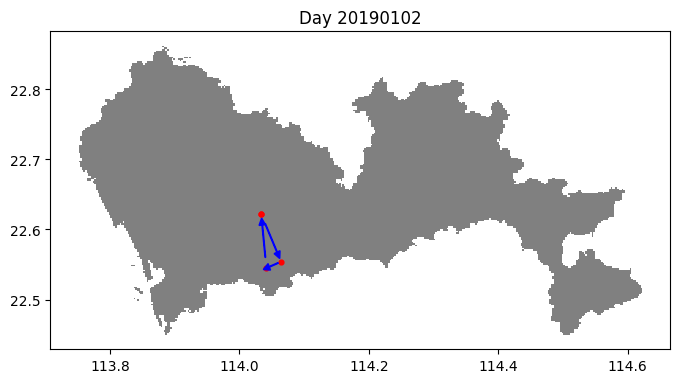

Serial: [30, 352, 162, 30]


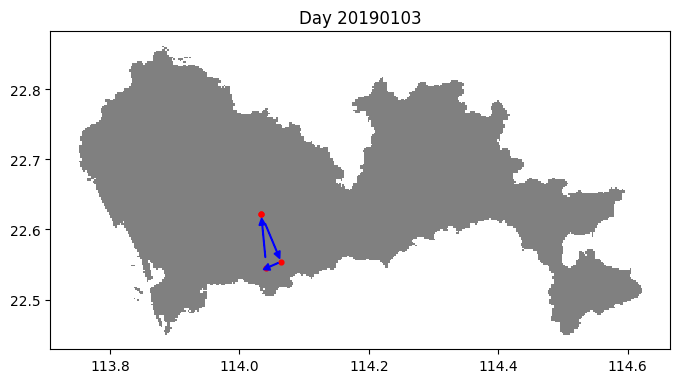

Serial: [30, 162, 30, 161, 241]


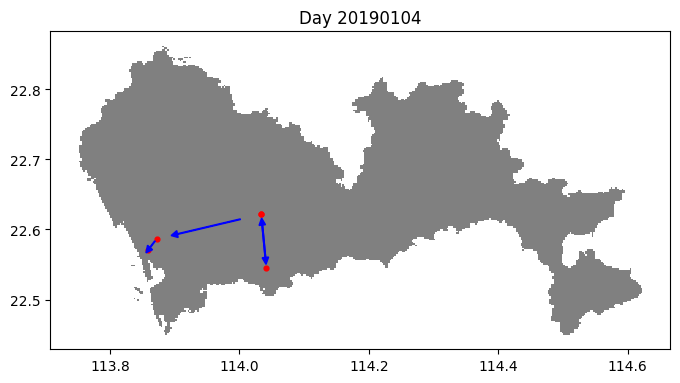

Serial: [241, 107, 30, 225, 87, 30]


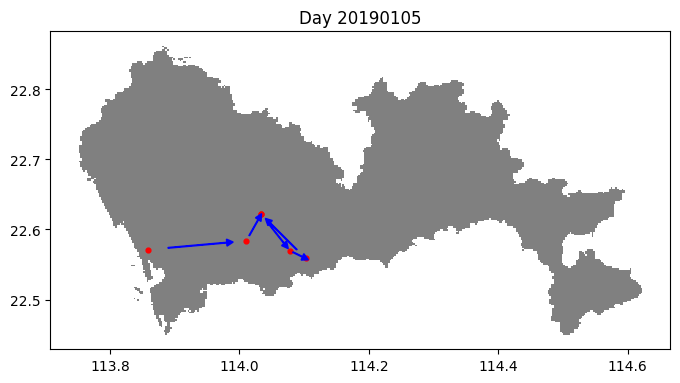

Serial: [30, 162, 30, 77, 30]


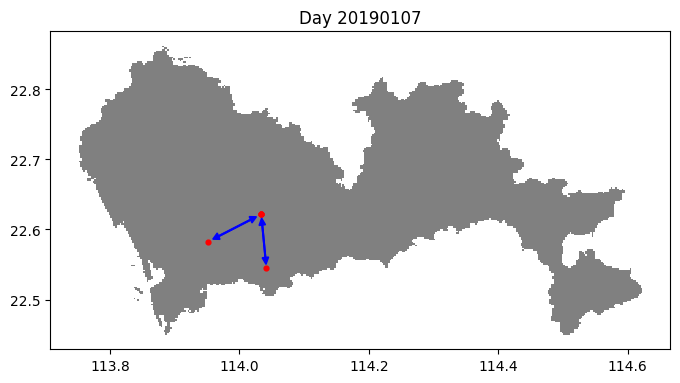

Serial: [30, 162, 30, 77]


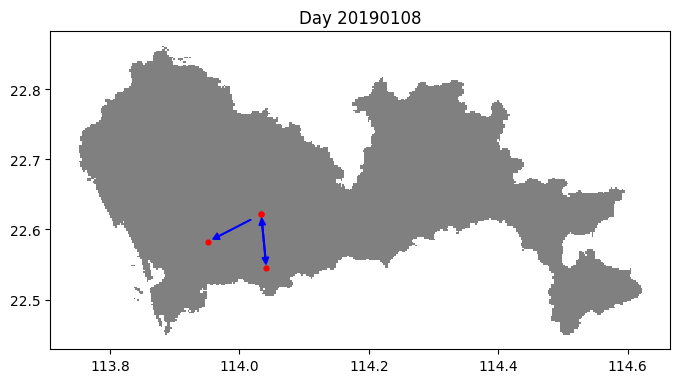

Serial: [77, 30, 352, 30]


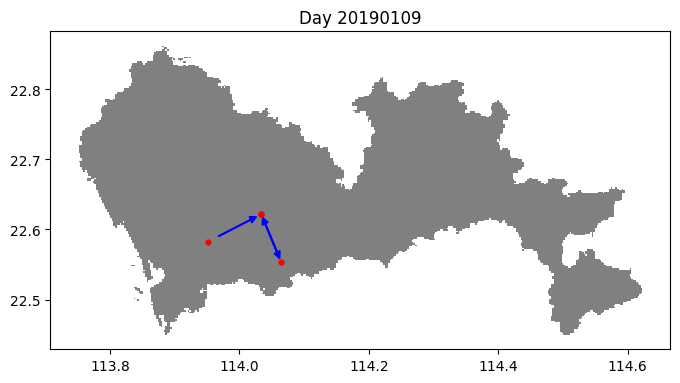

Serial: [30, 162, 31, 30]


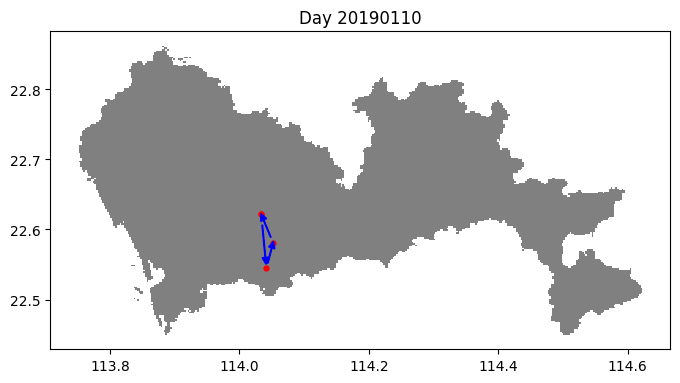

Serial: [30, 162, 30]


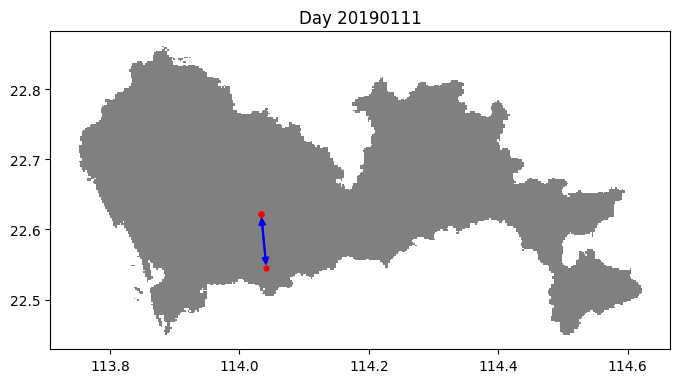

Serial: [30, 127, 30, 127, 188, 127, 30]


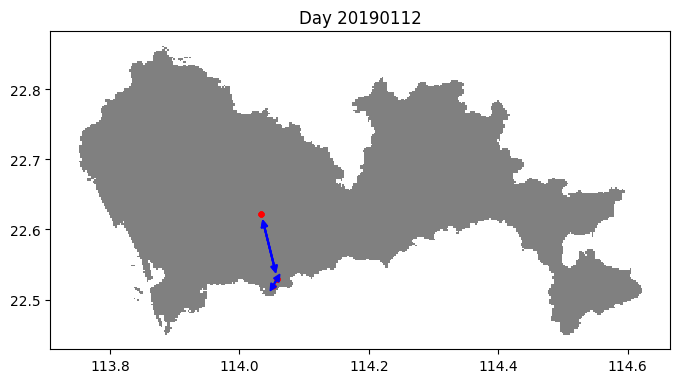

Serial: [30, 162, 30, 90, 30]


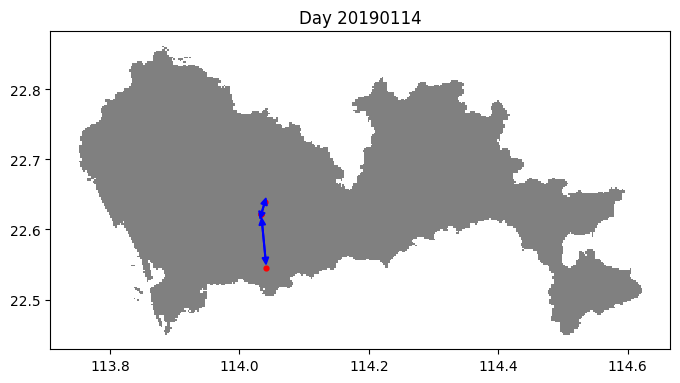

Serial: [30, 162, 31, 30]


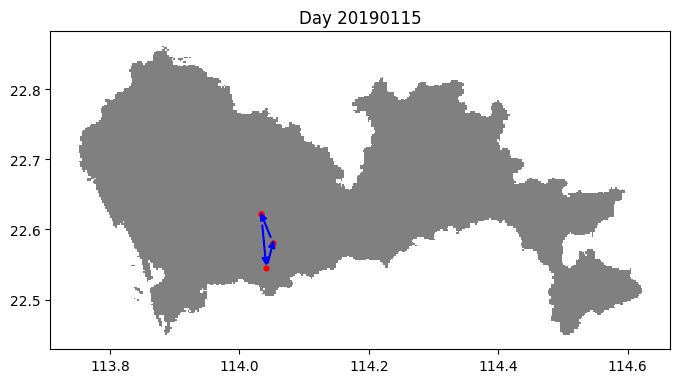

Serial: [30, 352, 162, 30]


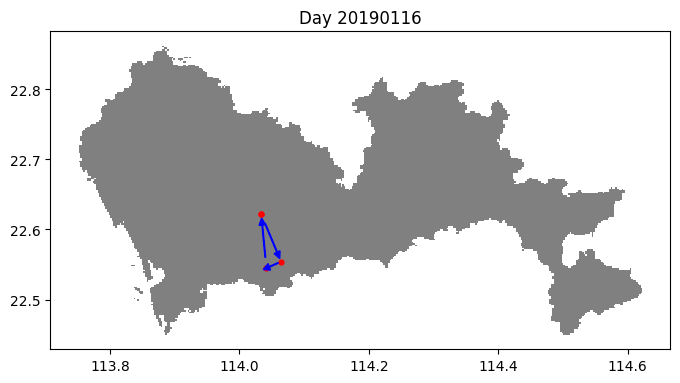

Serial: [30, 225, 30]


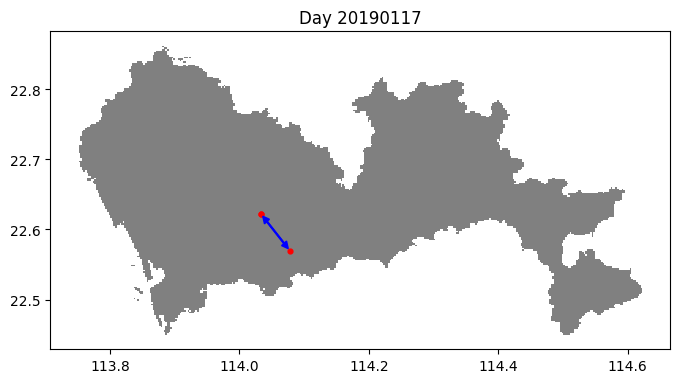

Serial: [30, 162, 30]


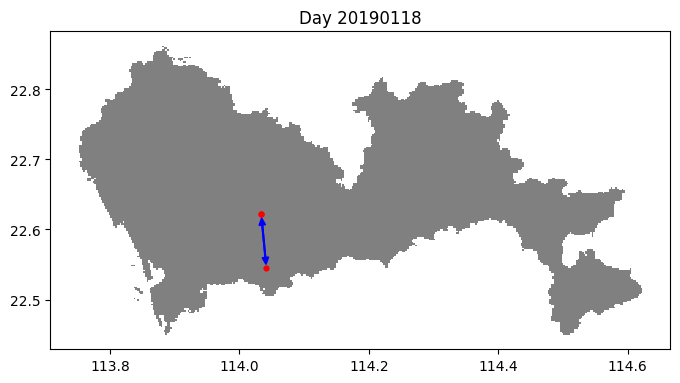

Serial: [30, 297, 30]


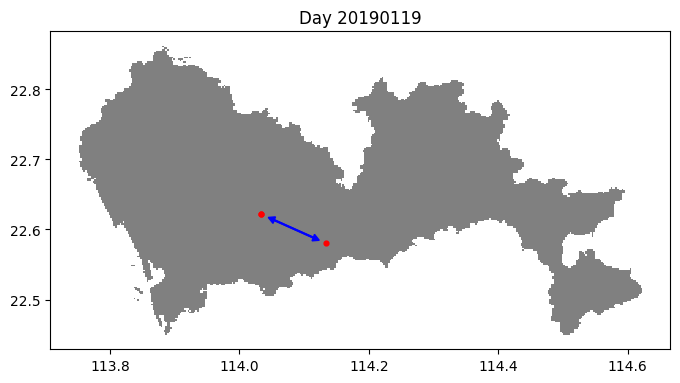

Serial: [30, 135, 30]


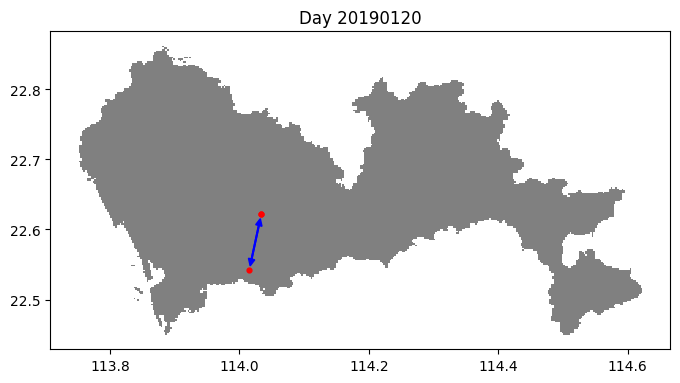

Serial: [30, 352, 30]


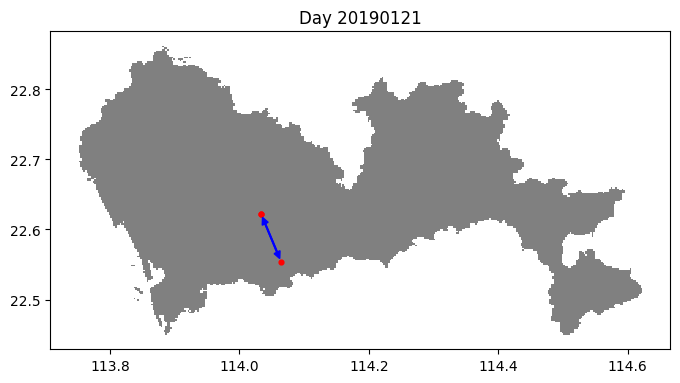

Serial: [30, 127, 30]


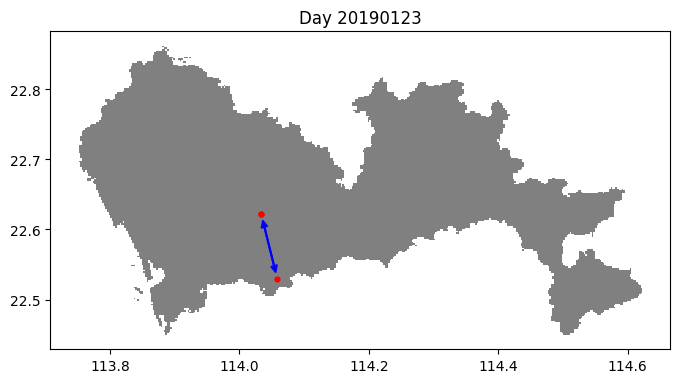

Serial: [30, 162, 30]


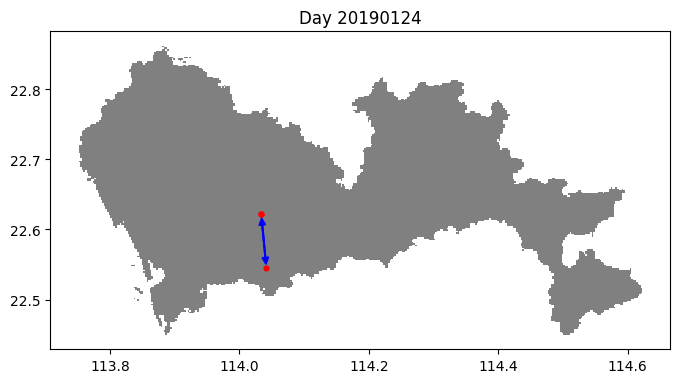

Serial: [30, 135, 31, 30]


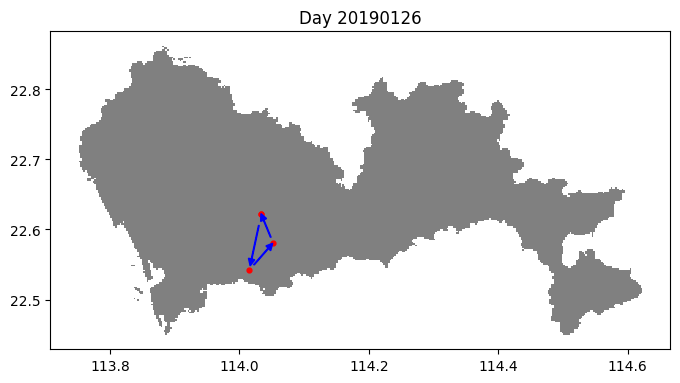

Serial: [30, 31, 30]


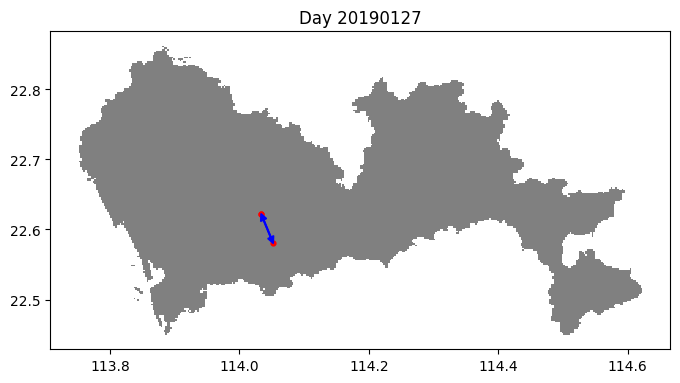

Serial: [30, 162, 30]


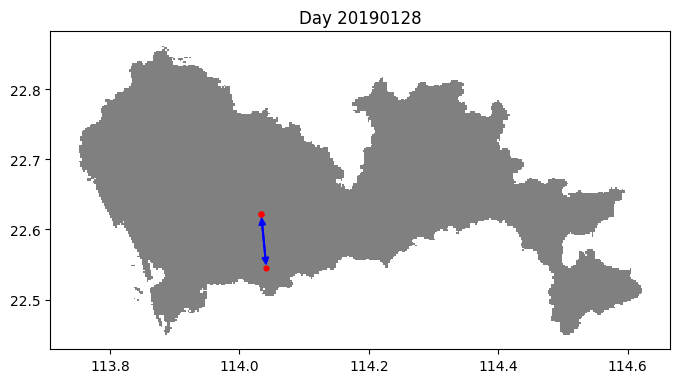

Serial: [30, 31, 30]


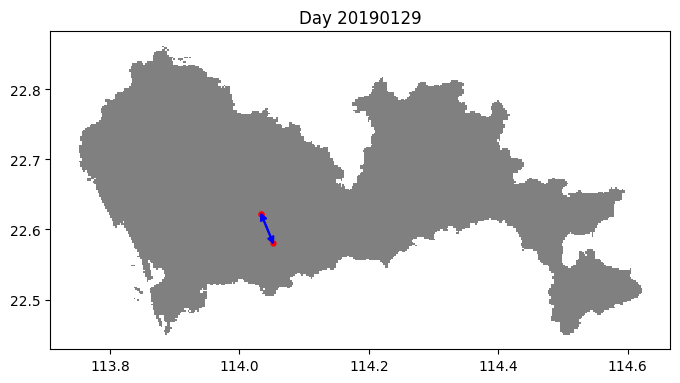

Serial: [30, 297, 129]


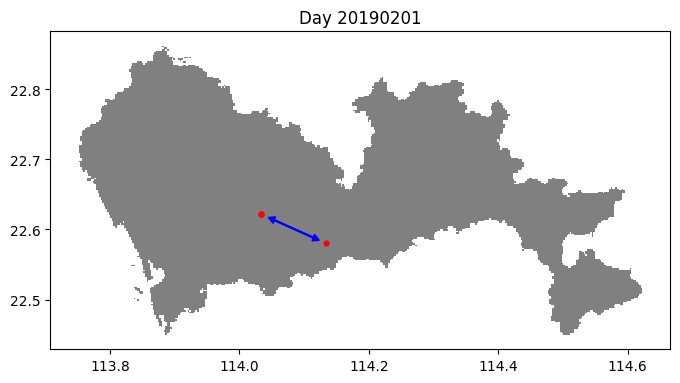

Serial: [129, 289, 319, 129]


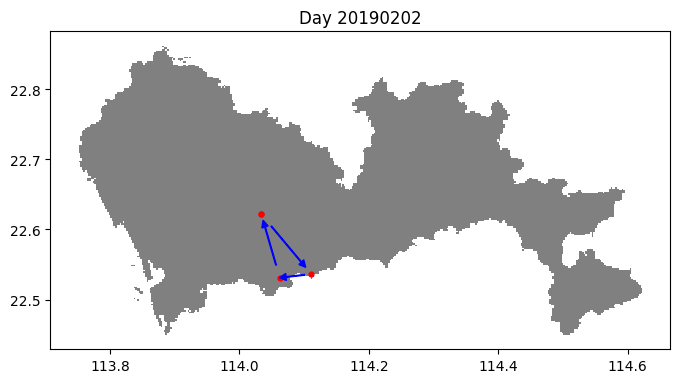

Serial: [129, 183, 129]


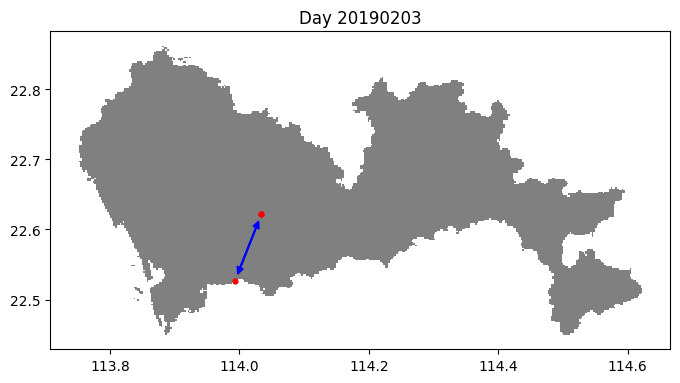

Serial: [129, 129]


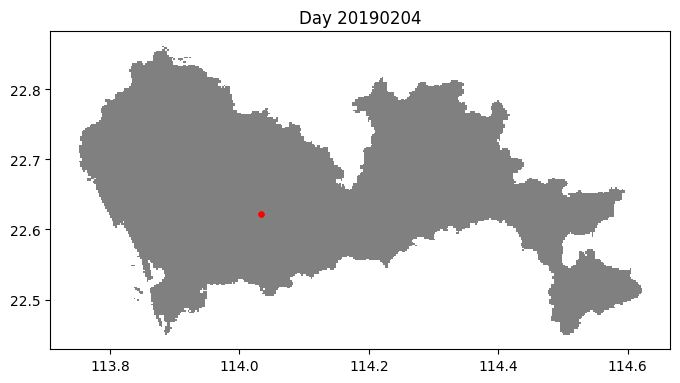

Serial: [129, 289, 129]


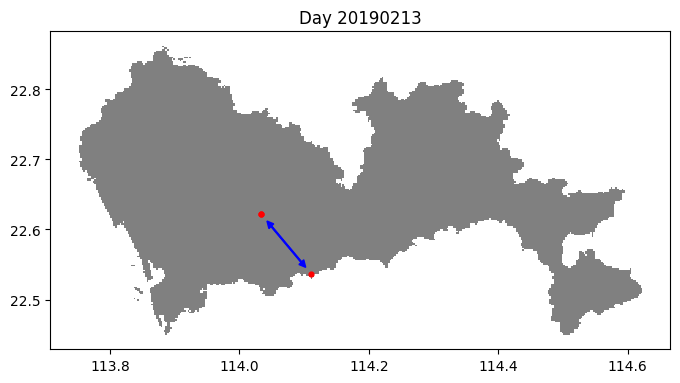

Serial: [129, 247, 129]


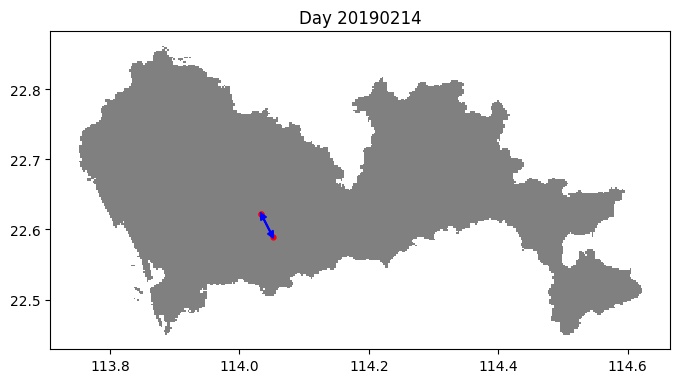

Serial: [129, 45, 129]


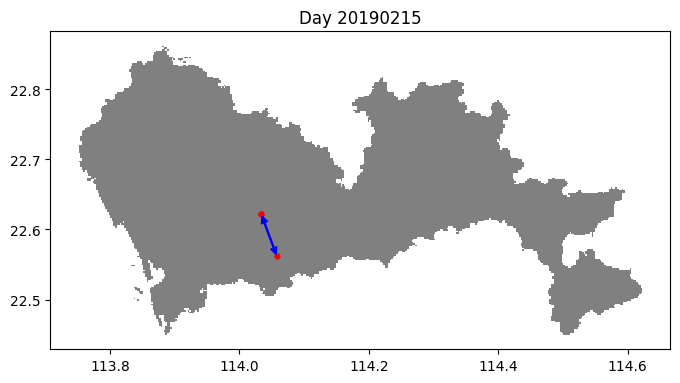

Serial: [129, 319, 129]


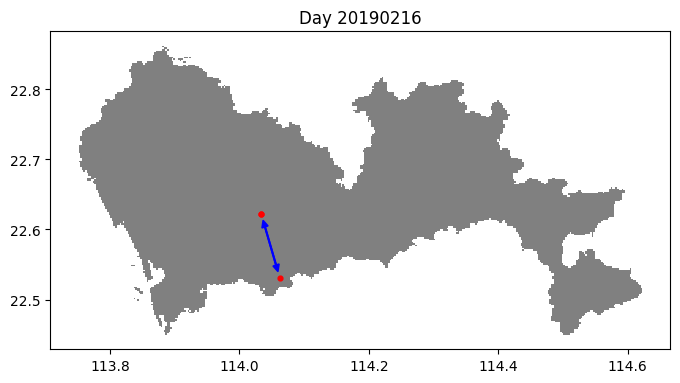

Serial: [129, 222, 247, 129]


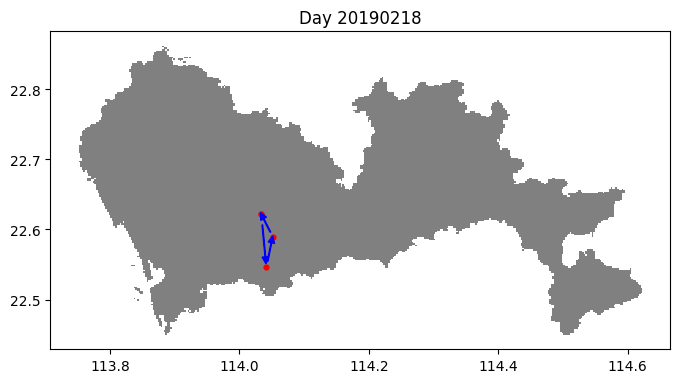

Serial: [129, 222, 129, 234, 129]


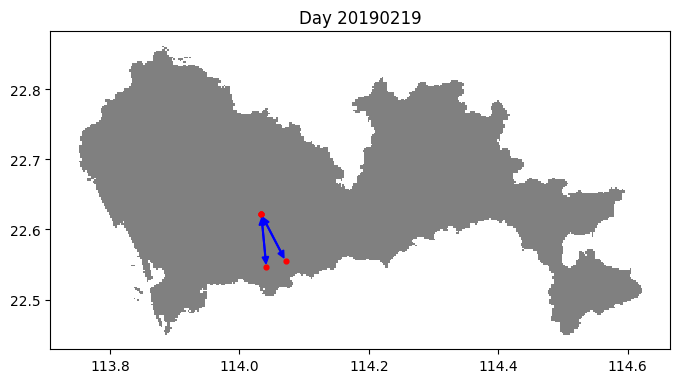

Serial: [129, 289, 129]


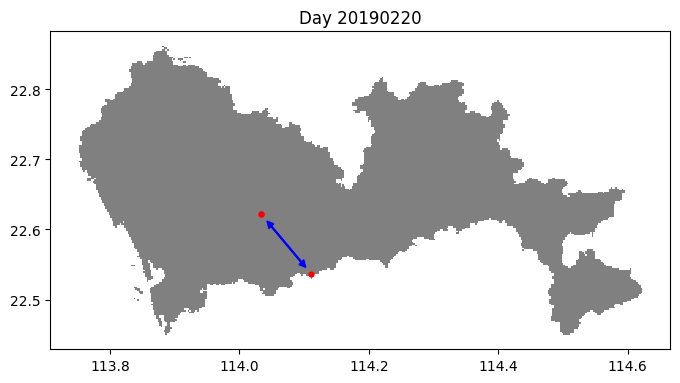

Serial: [129, 129]


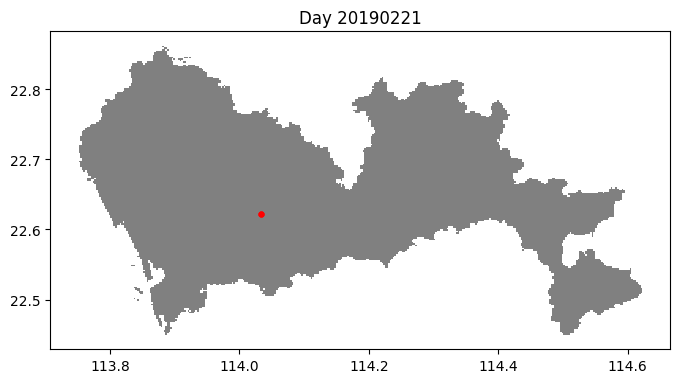

Serial: [129, 366, 129]


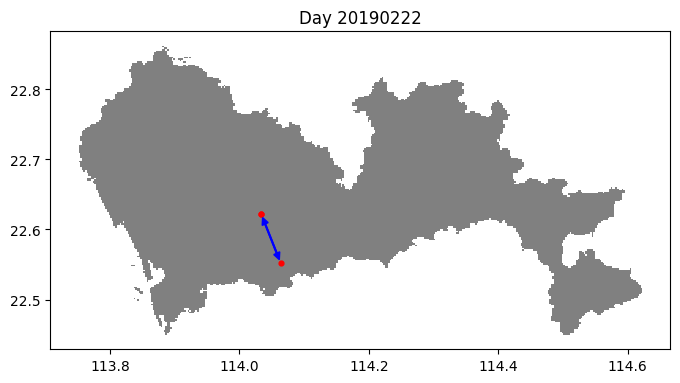

Serial: [129, 62, 130, 129]


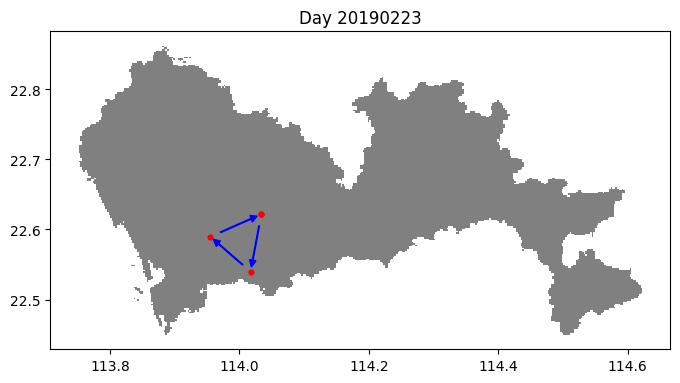

Serial: [129, 289, 129]


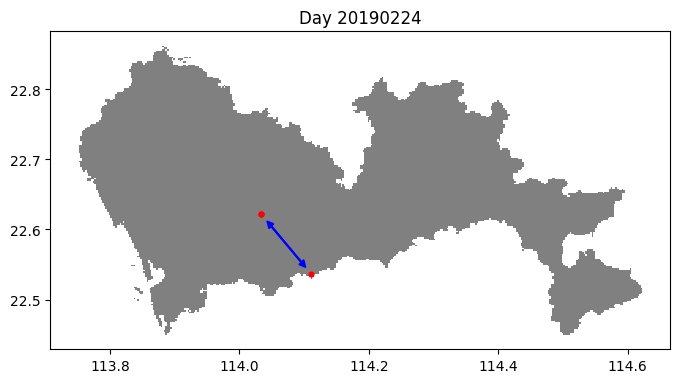

Serial: [129, 234, 129]


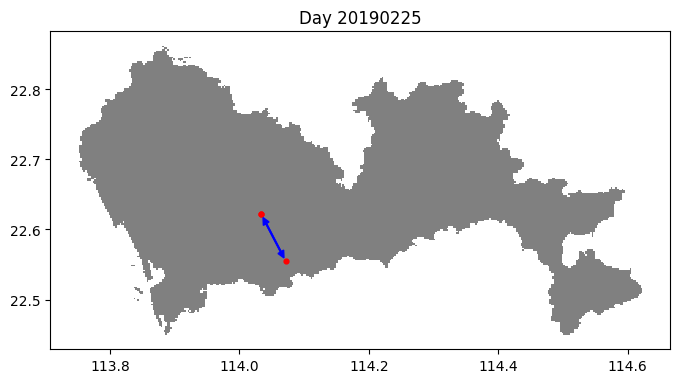

Serial: [129, 331, 129]


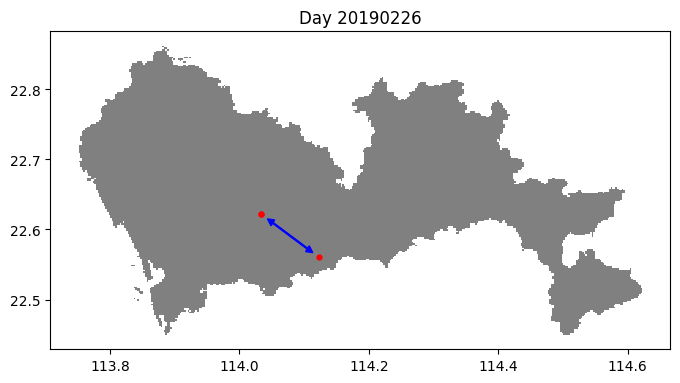

Serial: [129, 286, 319, 129]


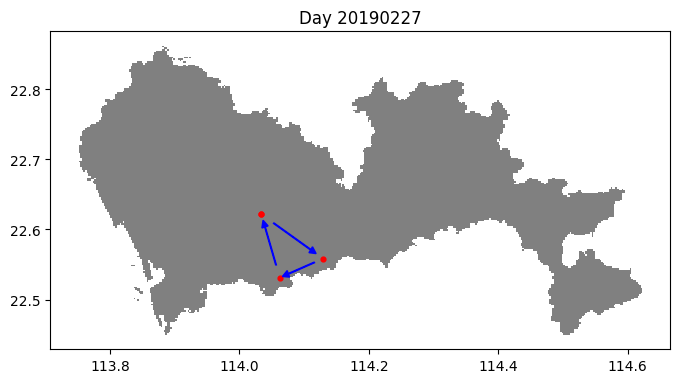

Serial: [129, 234, 286, 360, 129]


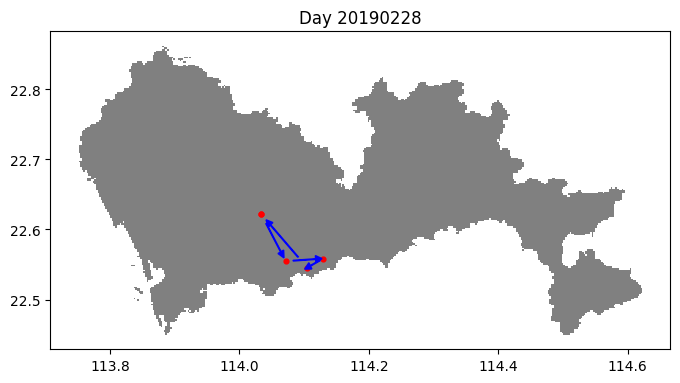

Serial: [129, 311, 218, 303, 347, 218]


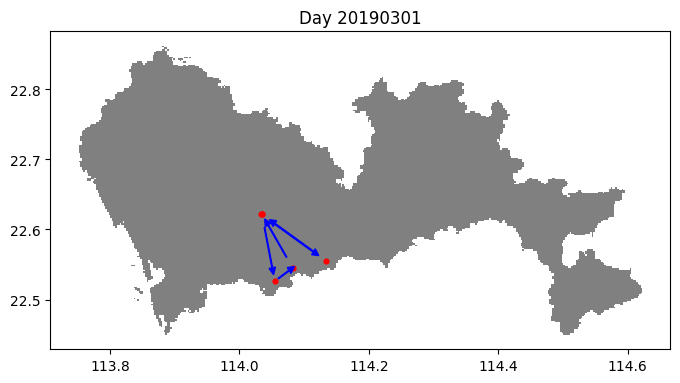

Serial: [218, 262, 95, 364, 303, 218]


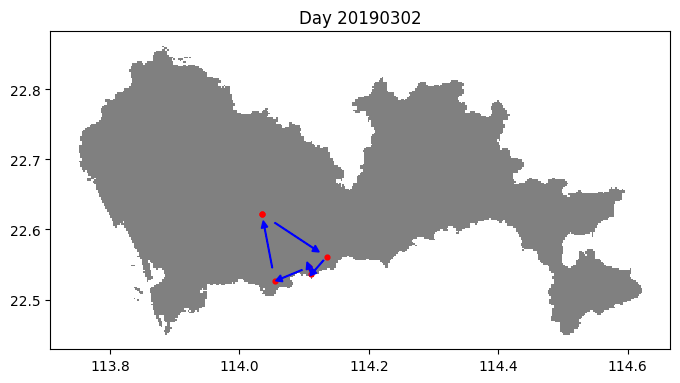

Serial: [218, 266, 364, 103, 17, 218]


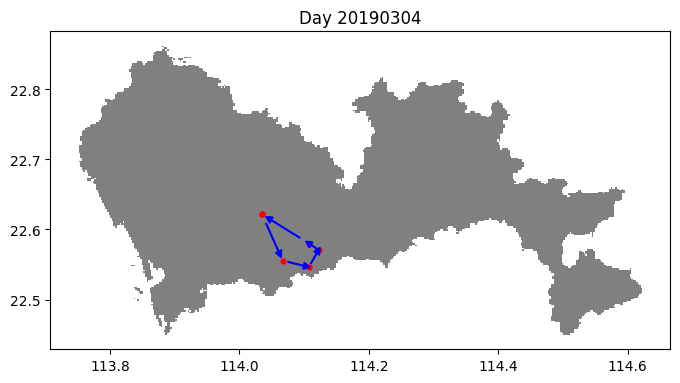

Serial: [218, 197, 218]


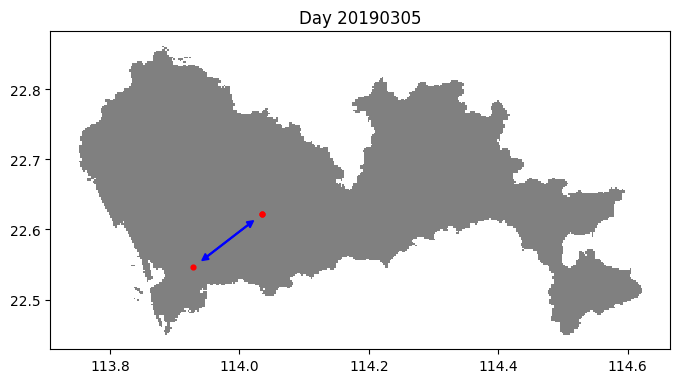

Serial: [218, 168, 218]


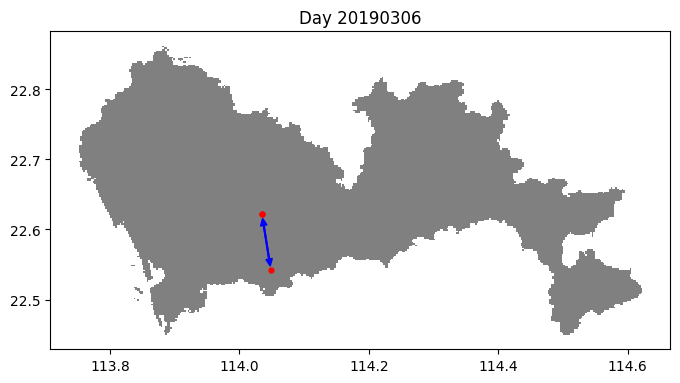

Serial: [218, 264, 1, 218]


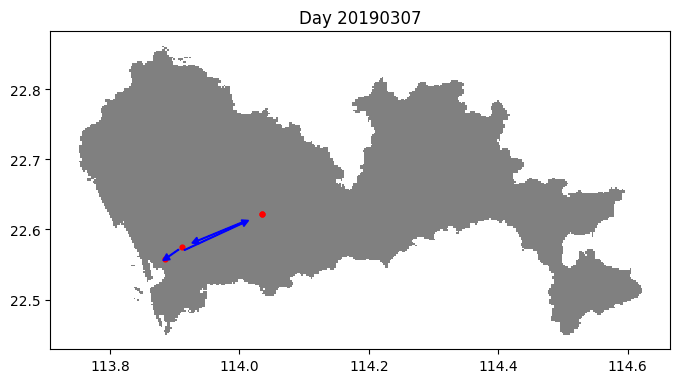

Serial: [218, 266, 347, 218]


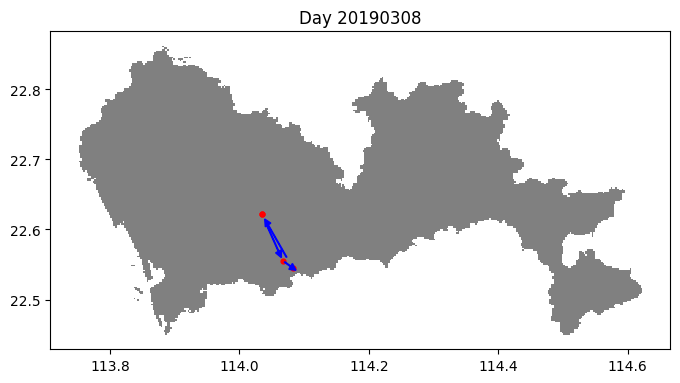

Serial: [218, 358, 347, 218]


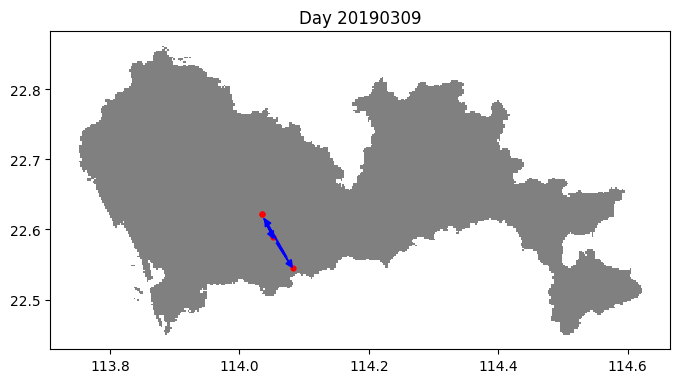

Serial: [218, 347, 218]


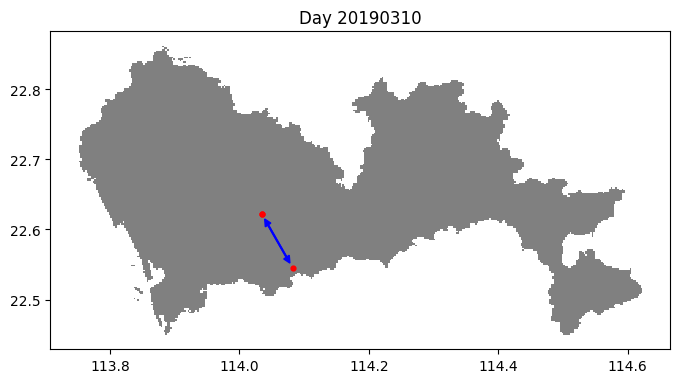

Serial: [218, 347, 218]


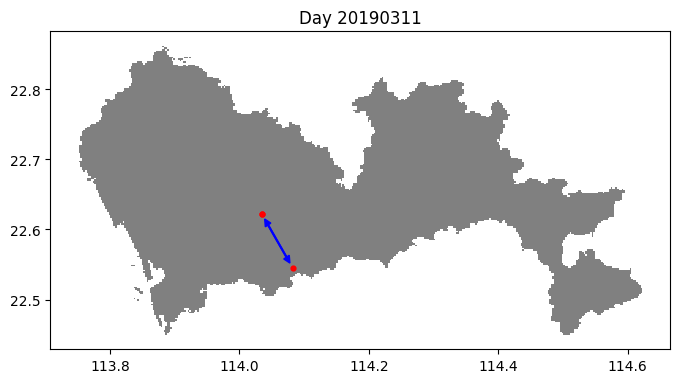

Serial: [218, 347, 218]


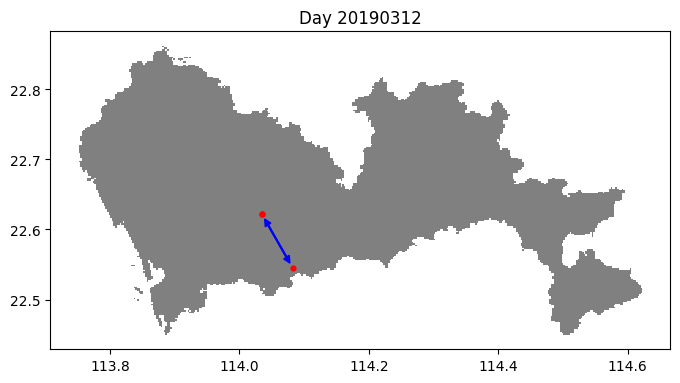

Serial: [218, 70, 236, 218]


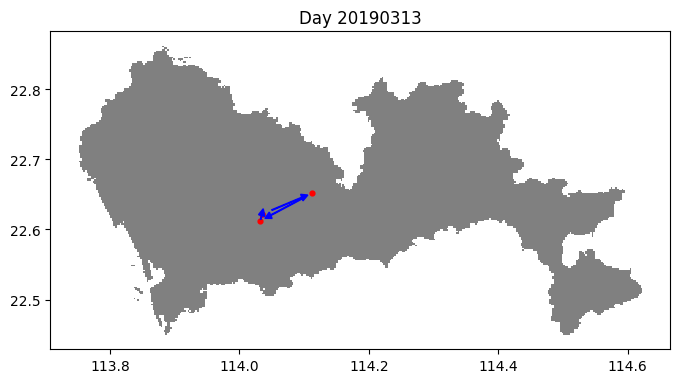

Serial: [218, 206, 206, 68, 170]


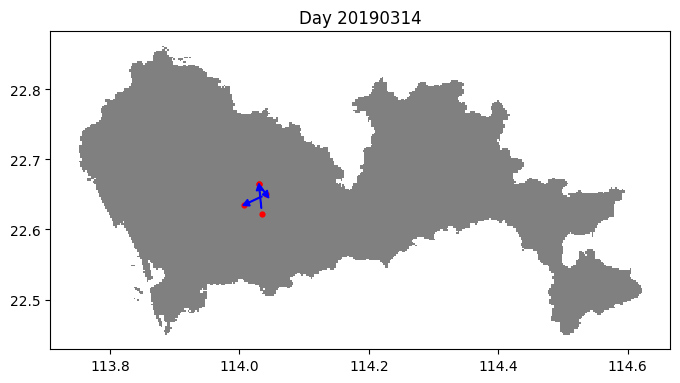

Serial: [170, 206, 246, 335, 218, 206]


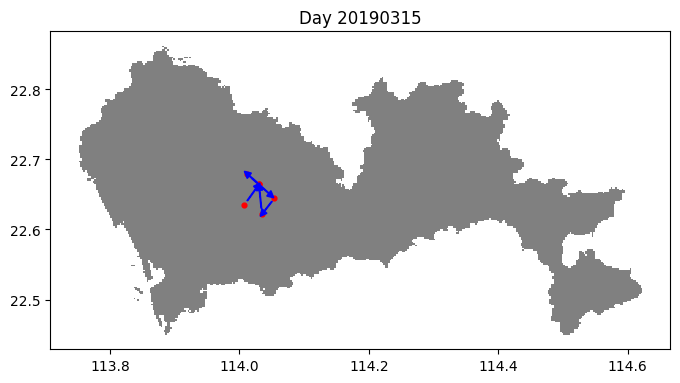

Serial: [206, 170, 218]


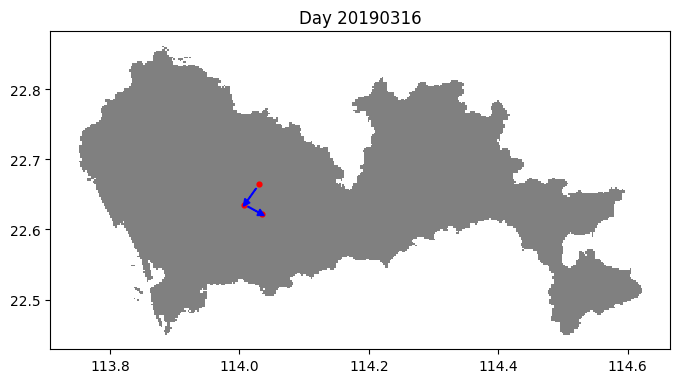

Serial: [218, 68, 218]


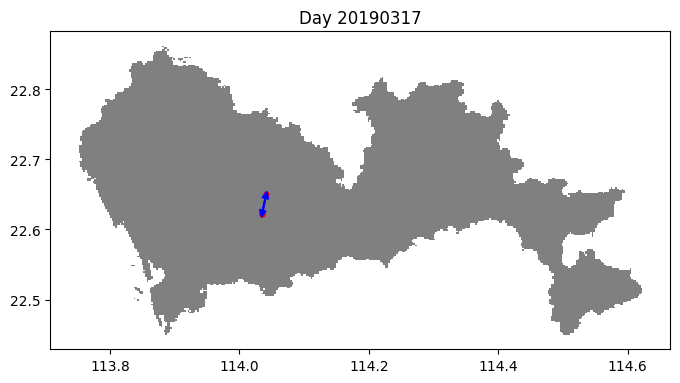

Serial: [218, 68, 218]


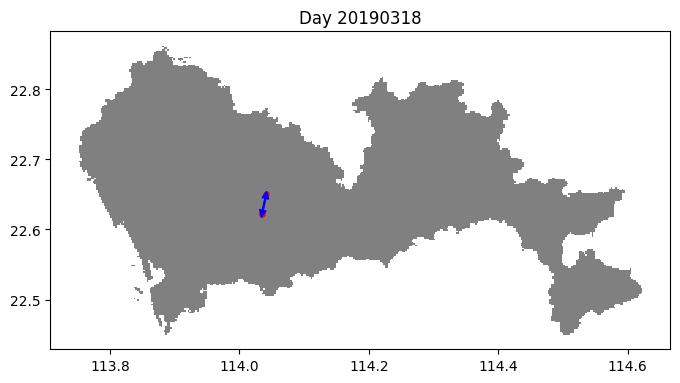

Serial: [218, 364, 236, 218]


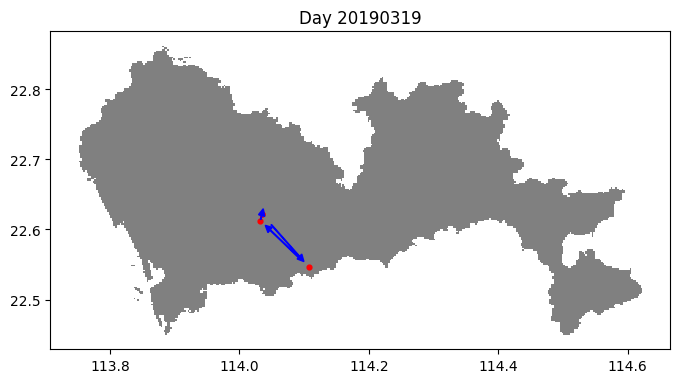

Serial: [218, 303, 347, 308, 218]


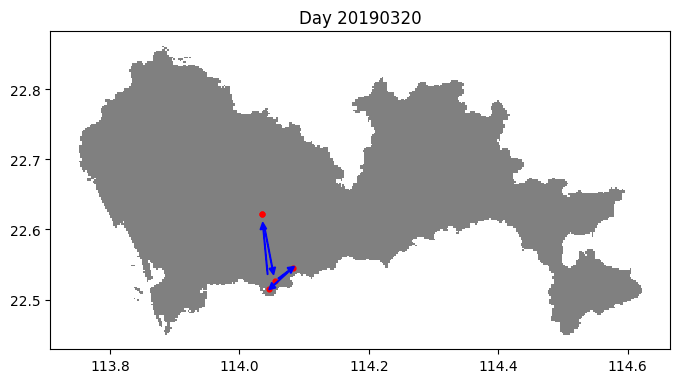

Serial: [218, 303, 308, 218, 236, 68, 218]


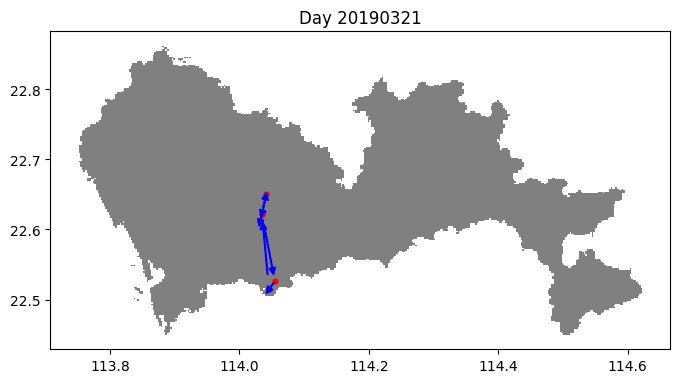

Serial: [218, 347, 68, 21, 218]


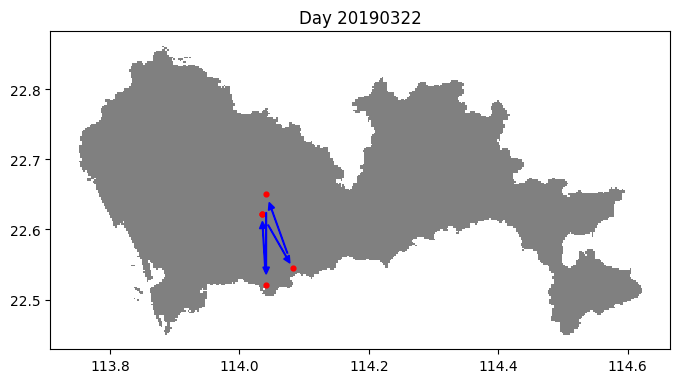

Serial: [218, 347, 364, 103, 218]


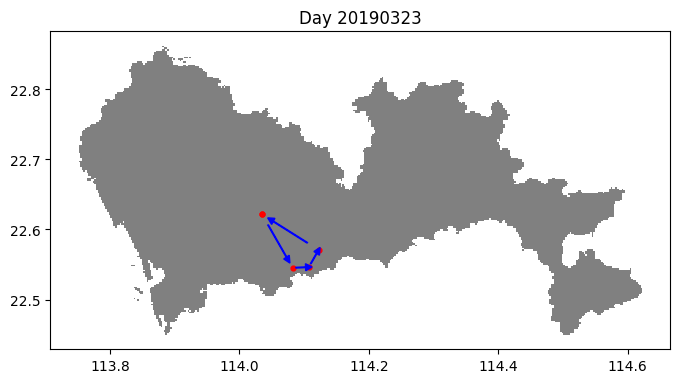

Serial: [218, 347, 140, 347, 103, 218]


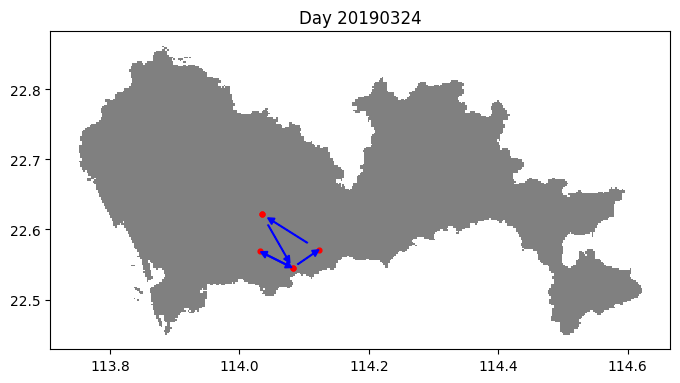

Serial: [218, 308, 347, 218]


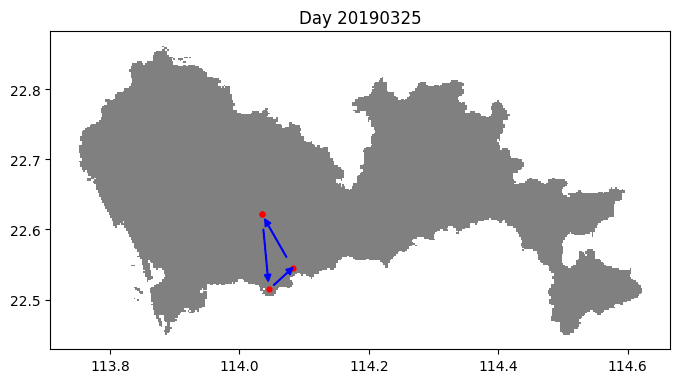

Serial: [218, 168, 308, 218, 116, 218]


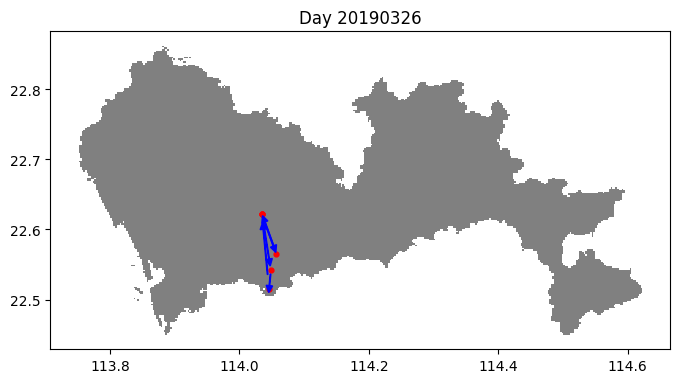

Serial: [218, 347, 194, 168, 140, 218]


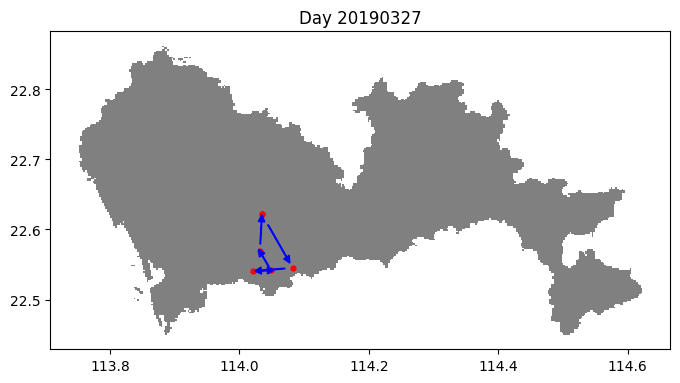

Serial: [218, 168, 218, 347, 283, 218]


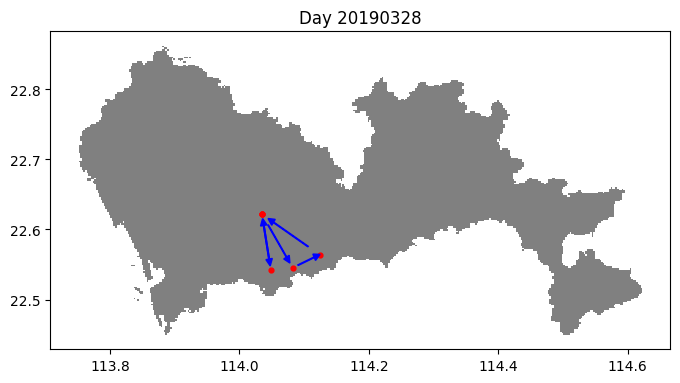

Serial: [218, 194, 220, 364, 218]


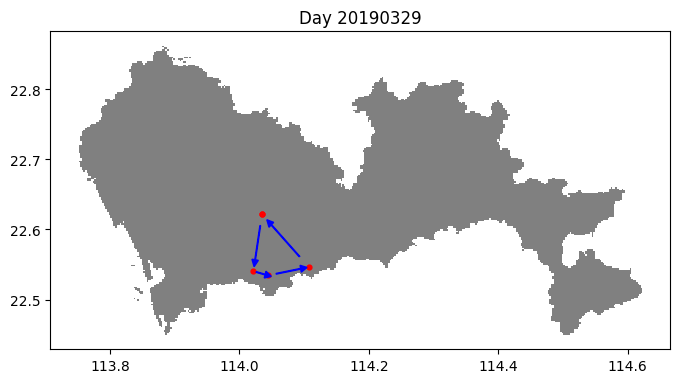

Serial: [218, 303, 347, 218]


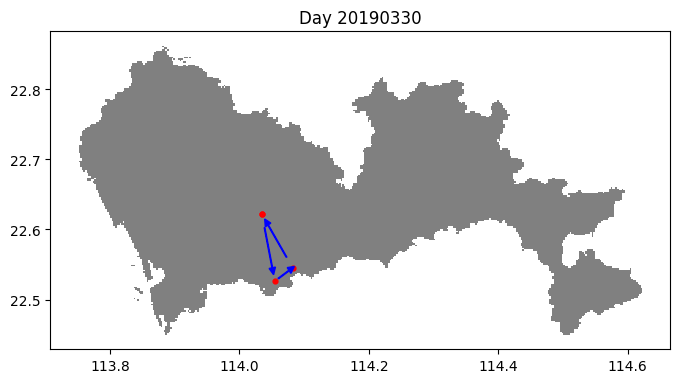

Serial: [218, 49, 242, 244, 49, 76, 92, 177]


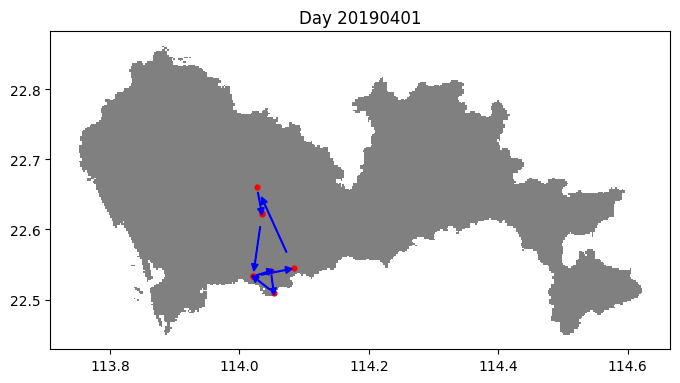

Serial: [177, 244, 93, 78, 259]


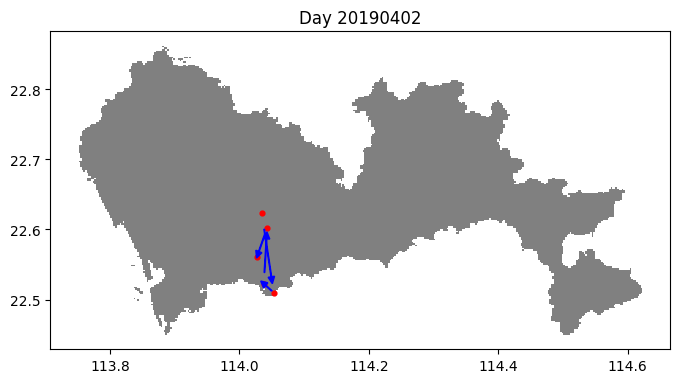

Serial: [259, 76, 177]


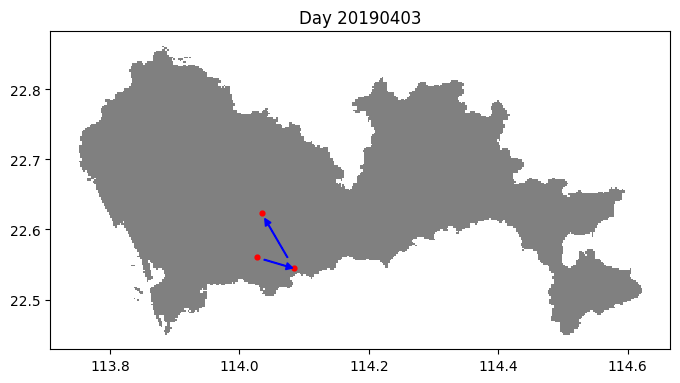

Serial: [177, 76, 151, 177]


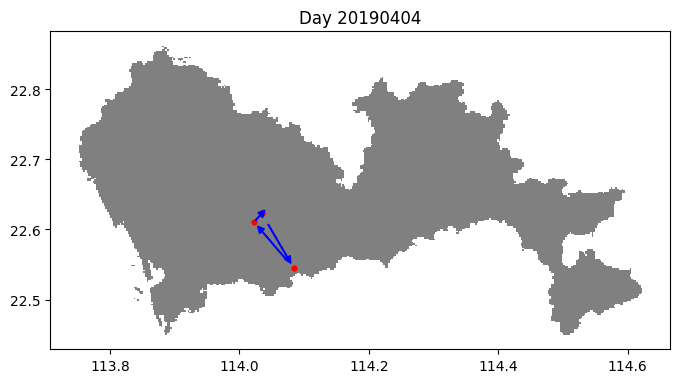

Serial: [177, 147, 177]


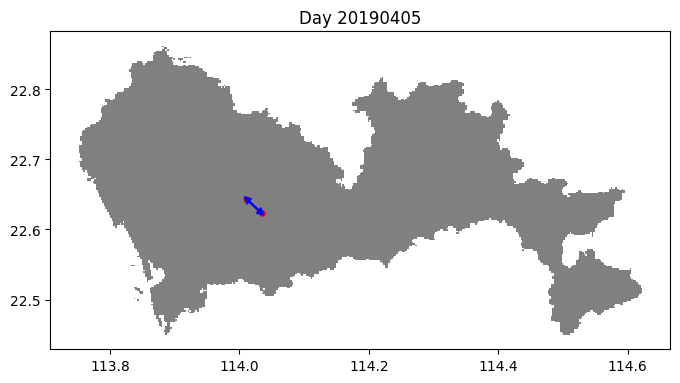

Serial: [177, 250, 177]


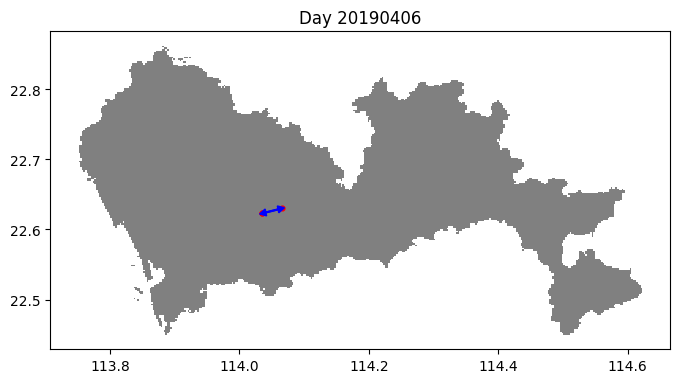

Serial: [177, 76, 167, 177]


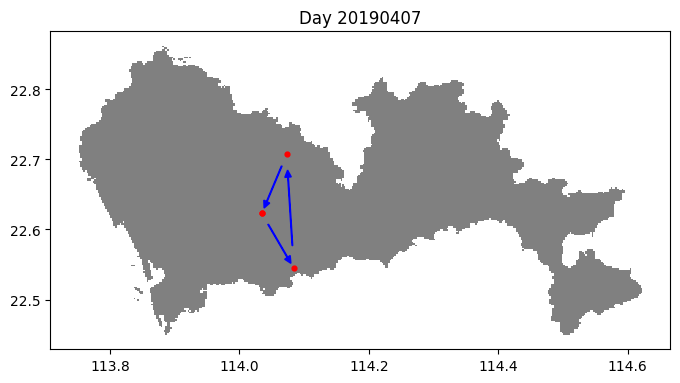

Serial: [177, 365, 272, 26, 177]


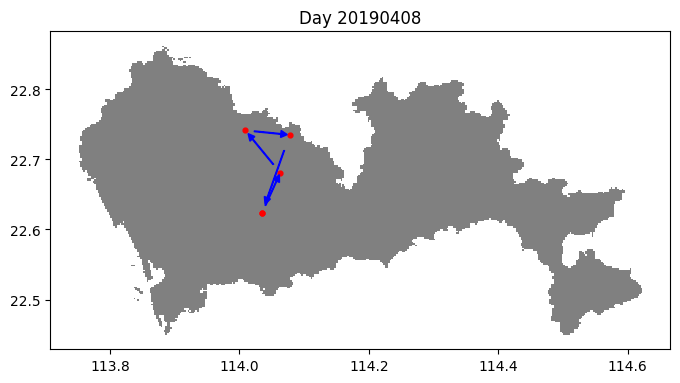

Serial: [177, 242, 76, 177]


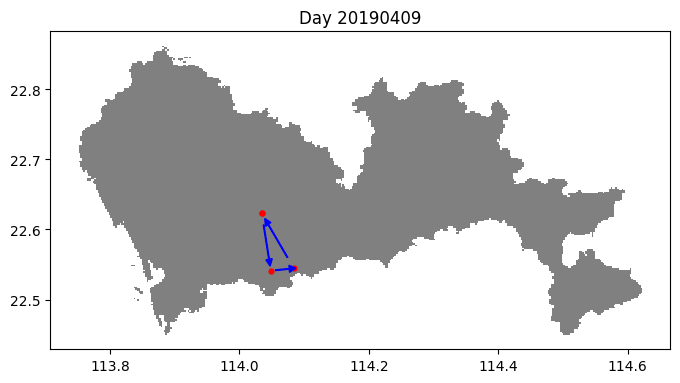

Serial: [177, 272, 326, 177]


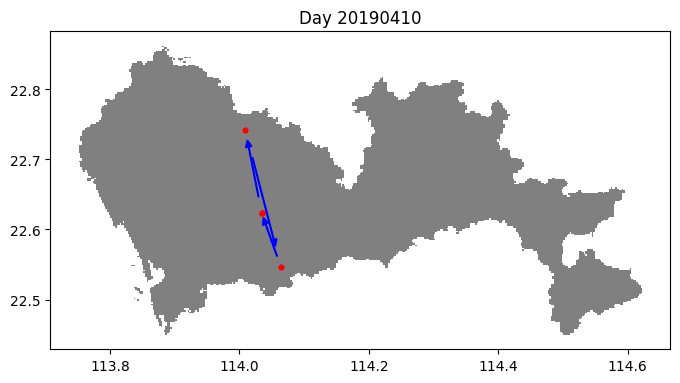

Serial: [177, 253, 177]


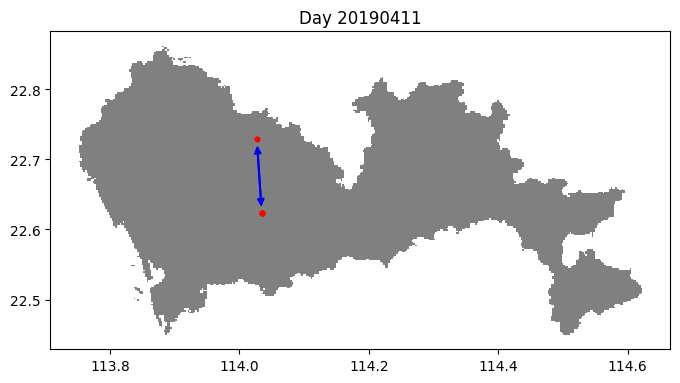

Serial: [177, 76, 177, 147, 177]


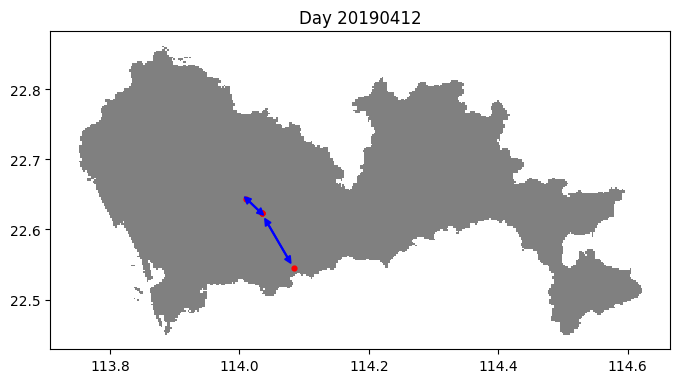

Serial: [177, 7, 177, 147]


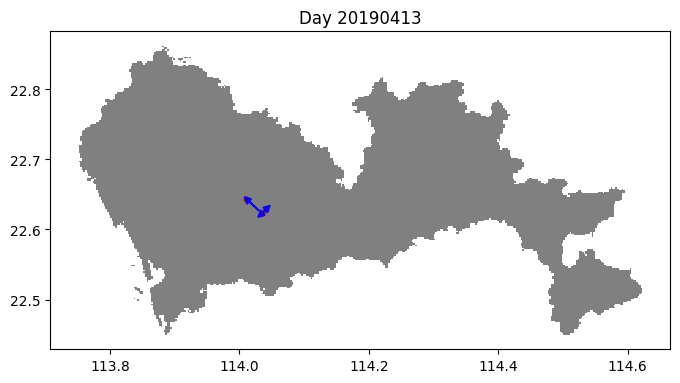

Serial: [147, 177, 76, 177, 122, 177]


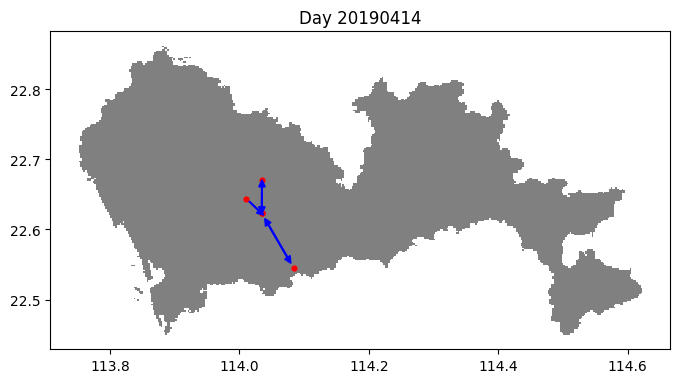

Serial: [177, 76, 92, 255, 177]


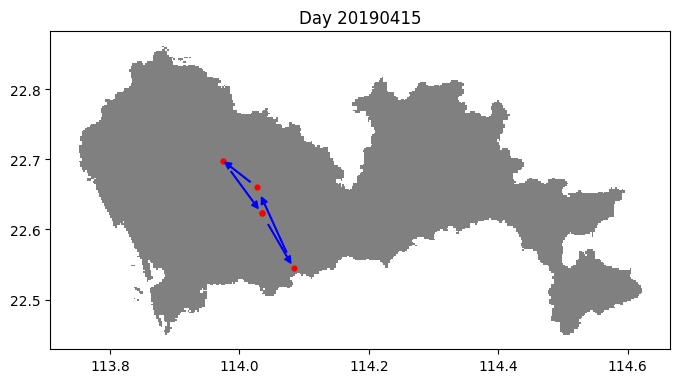

Serial: [177, 78, 76, 253, 192, 109, 177]


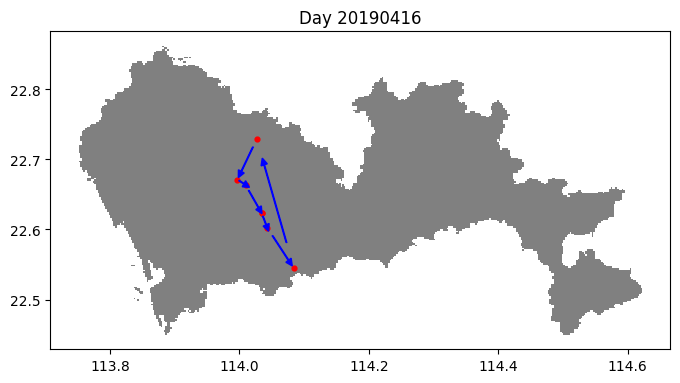

Serial: [177, 76, 350, 163, 177]


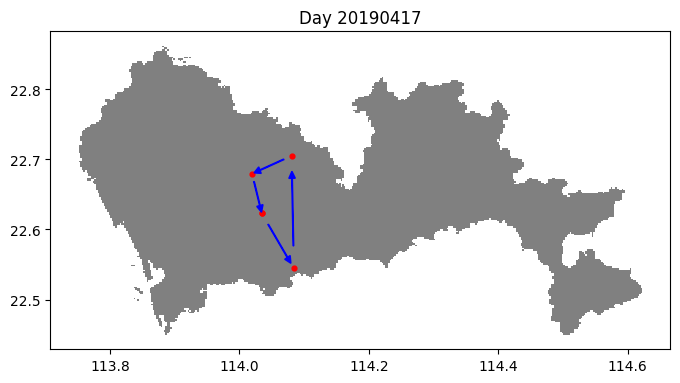

Serial: [177, 192, 76, 333, 362, 177]


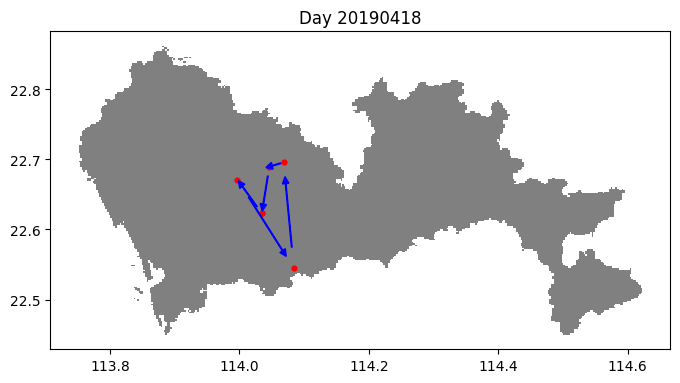

Serial: [177, 212, 253, 177]


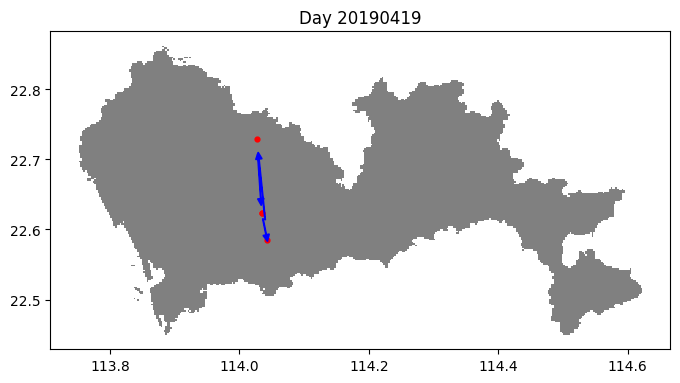

Serial: [177, 92, 147, 348, 147, 177]


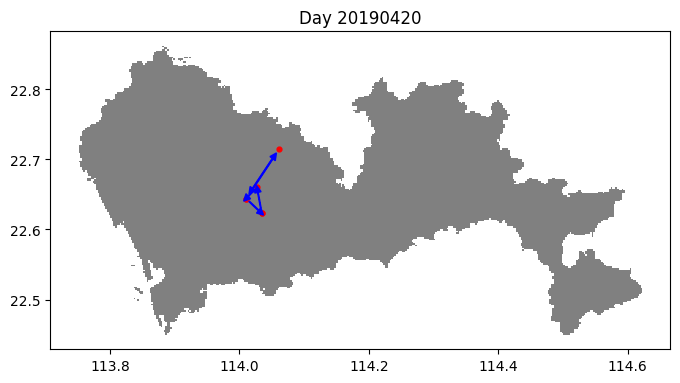

Serial: [177, 151, 177]


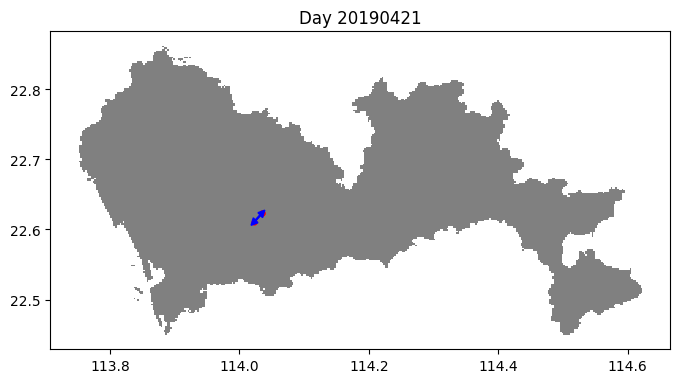

Serial: [177, 245, 177, 151, 348, 69, 177]


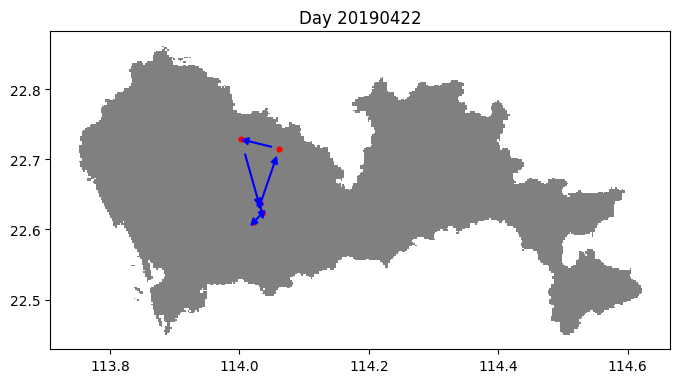

Serial: [177, 92, 147, 76, 177, 147, 177, 151]


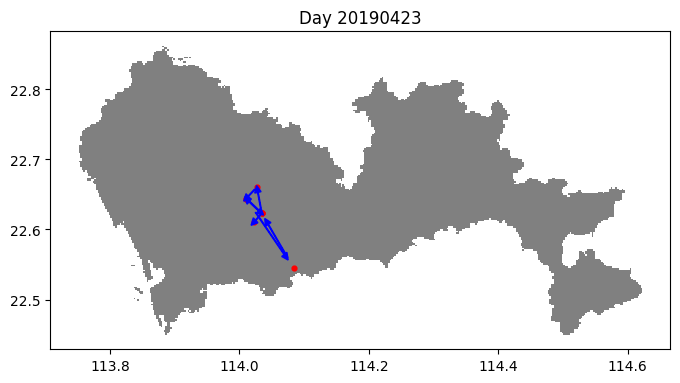

Serial: [151, 196, 269, 348, 177]


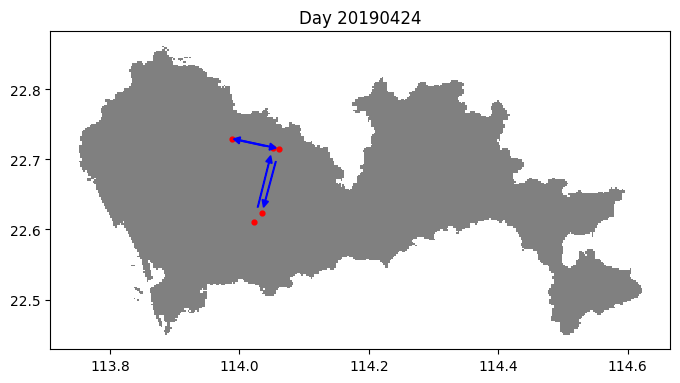

Serial: [177, 76, 163, 350, 167, 336, 147, 177, 306]


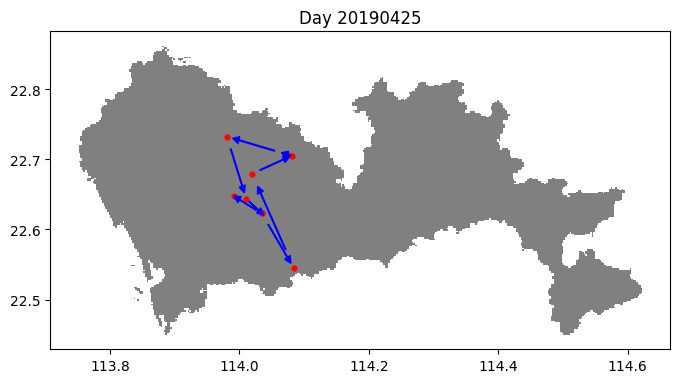

Serial: [306, 76, 177, 78, 177]


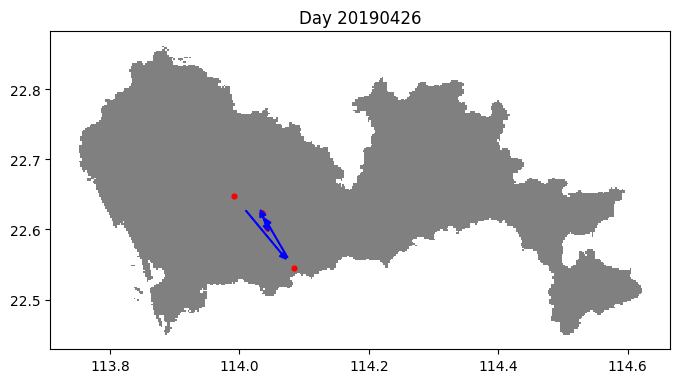

Serial: [177, 150, 348, 147, 210]


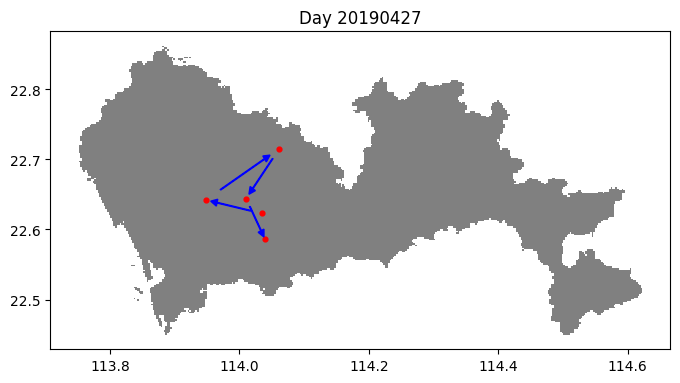

Serial: [210, 253, 348, 4, 167, 76, 306, 318]


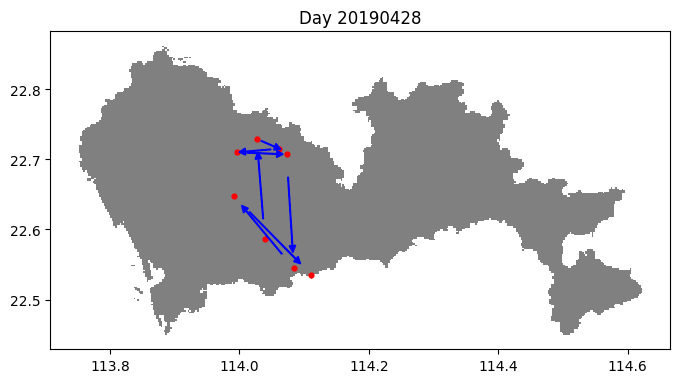

Serial: [318, 76, 177]


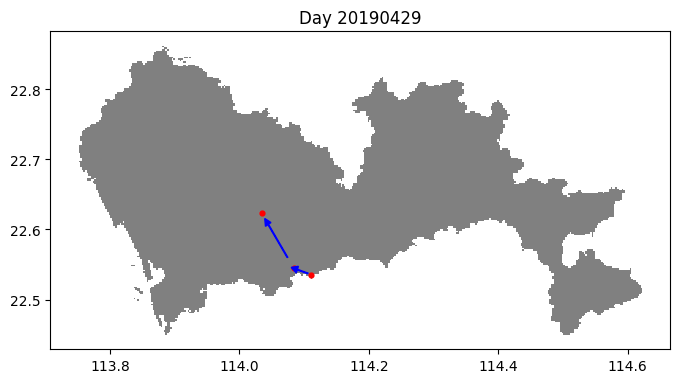

Serial: [177, 326, 76, 33, 177]


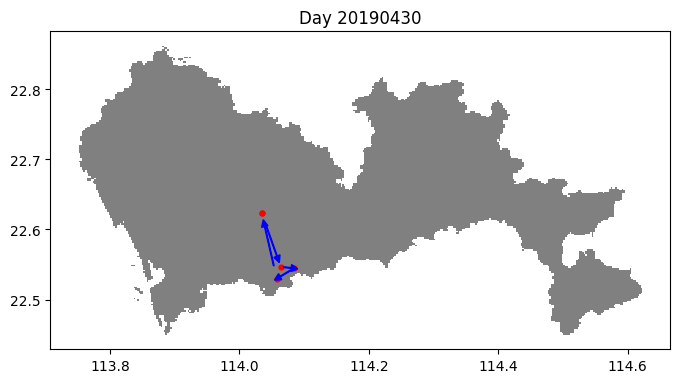

Serial: [177, 11, 145, 80, 48, 145]


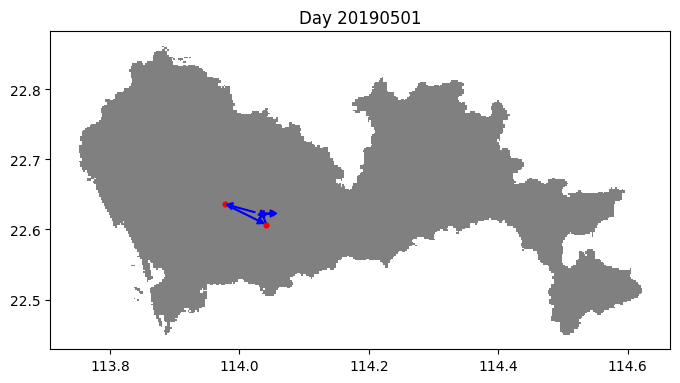

Serial: [145, 302, 74, 274, 214, 248, 145]


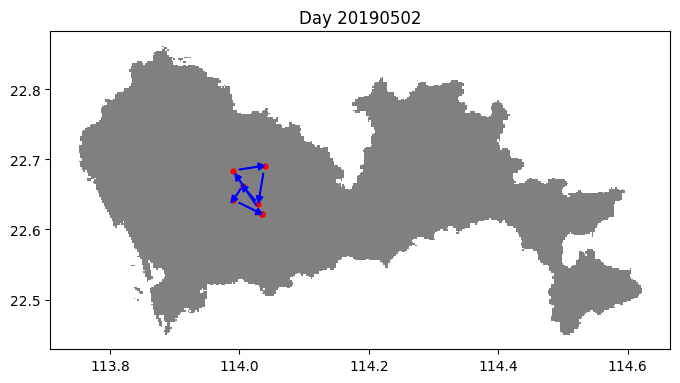

Serial: [145, 243, 137, 38, 145]


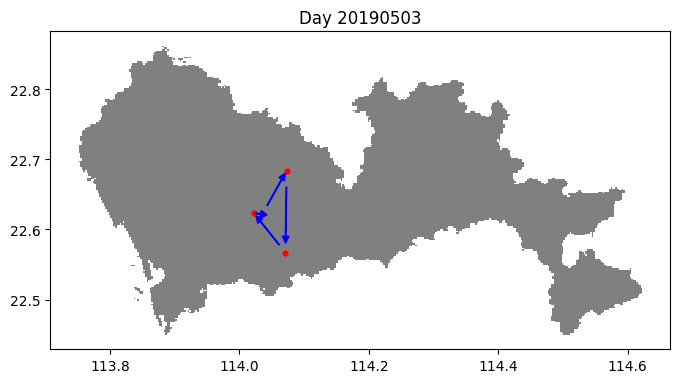

Serial: [145, 38, 145, 27]


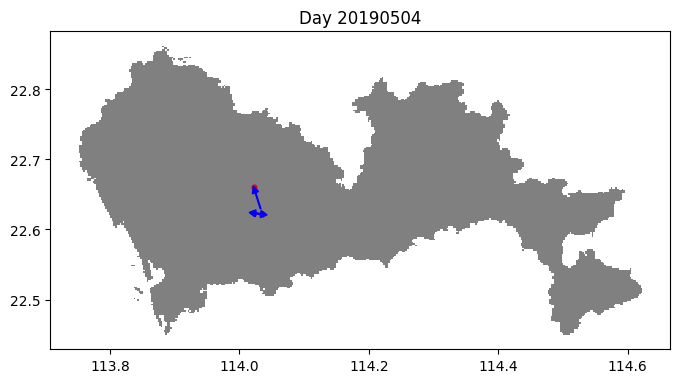

Serial: [27, 51, 285, 51, 145]


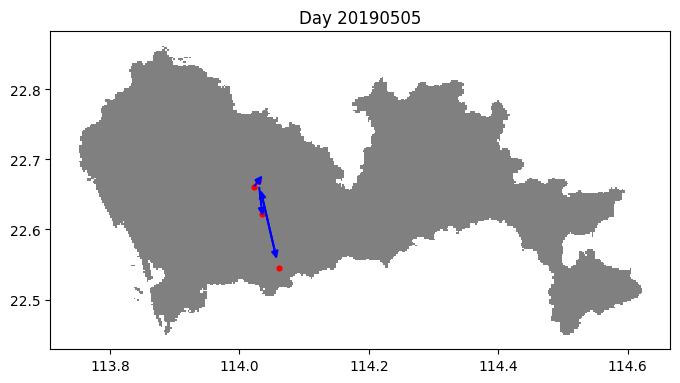

Serial: [145, 51, 38, 280, 175, 317, 9]


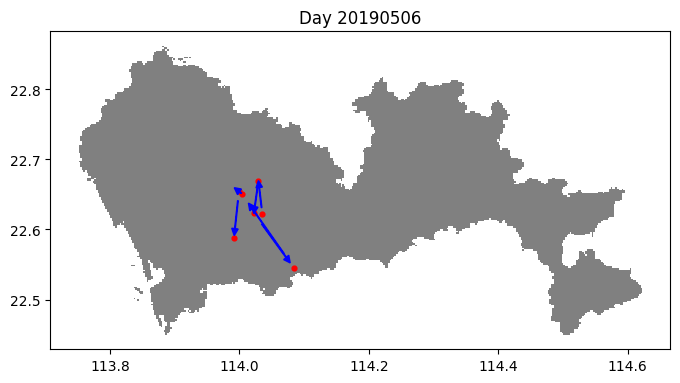

Serial: [9, 280, 145]


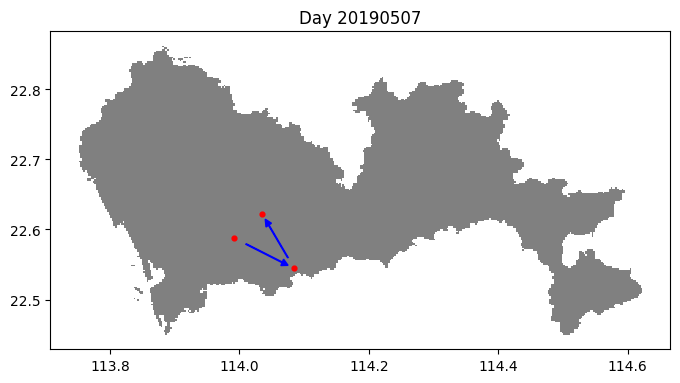

Serial: [145, 202, 145]


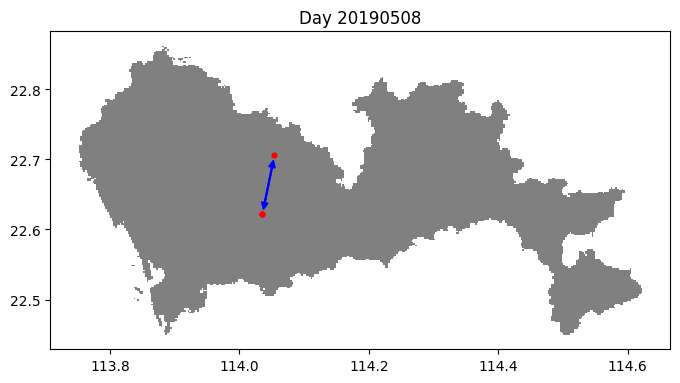

Serial: [145, 38, 280, 317, 48, 175]


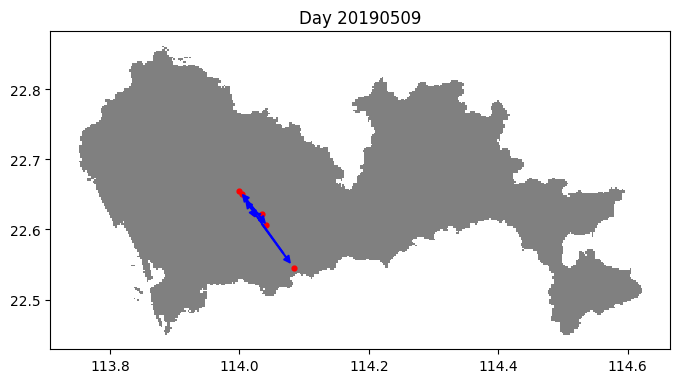

Serial: [175, 38, 145, 11, 145]


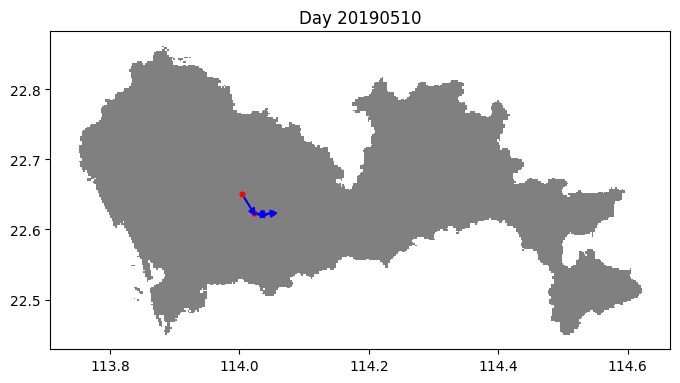

Serial: [145, 165, 99, 280, 145, 38]


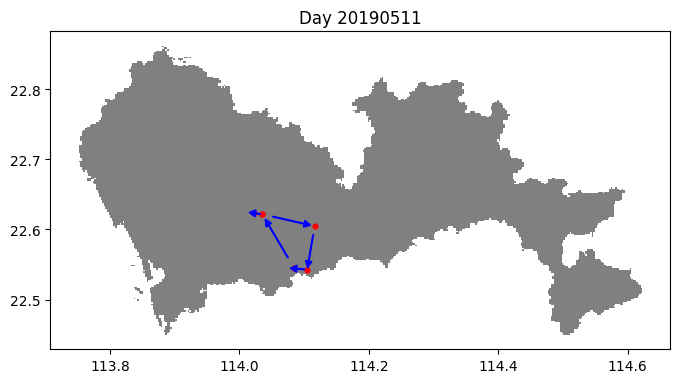

Serial: [38, 48, 317, 145]


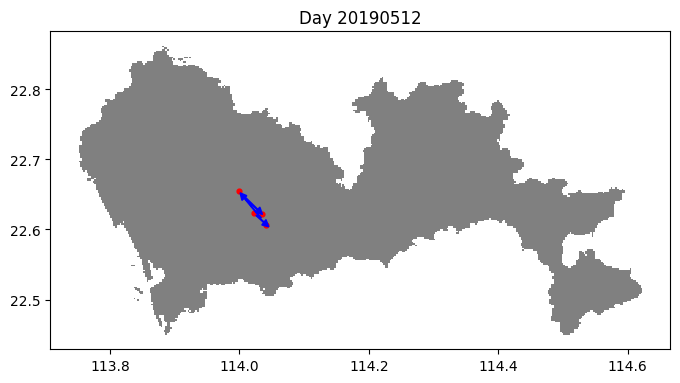

Serial: [145, 274, 145, 75, 279, 38, 145]


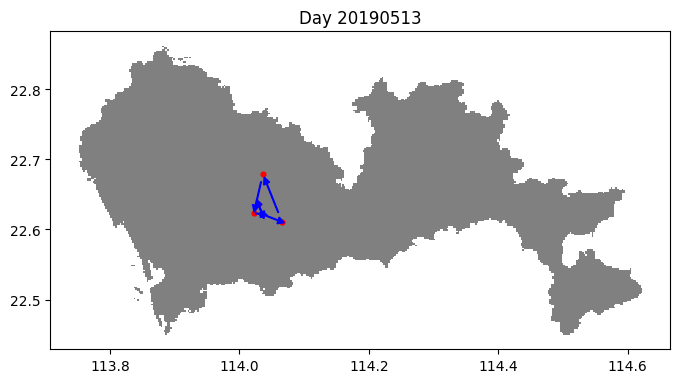

Serial: [145, 274, 280, 38, 145]


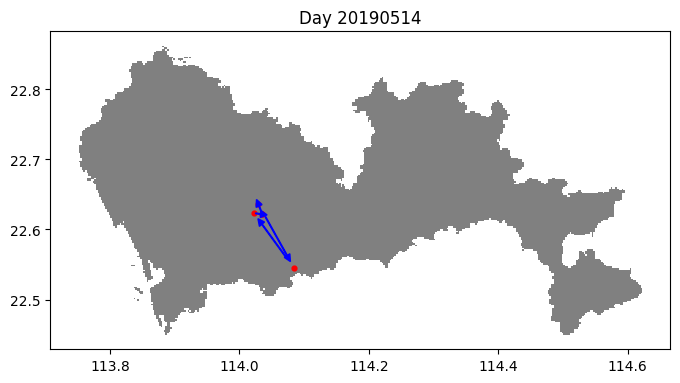

Serial: [145, 38, 317, 145]


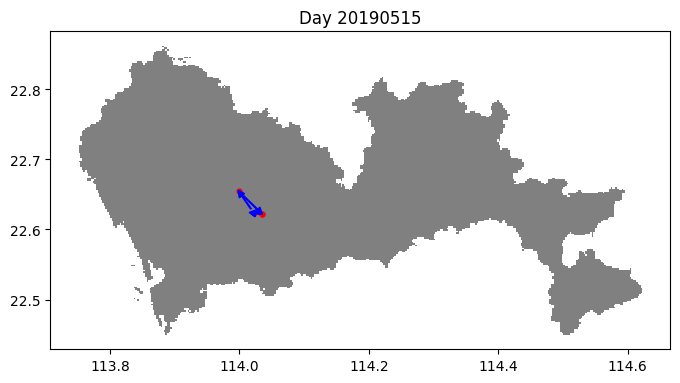

Serial: [145, 280, 145]


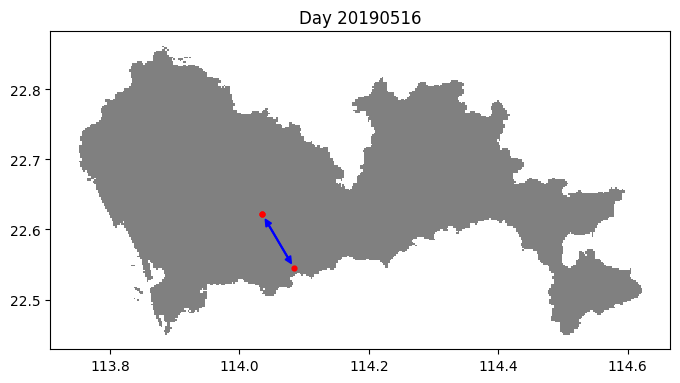

Serial: [145, 287, 355, 164, 38, 145]


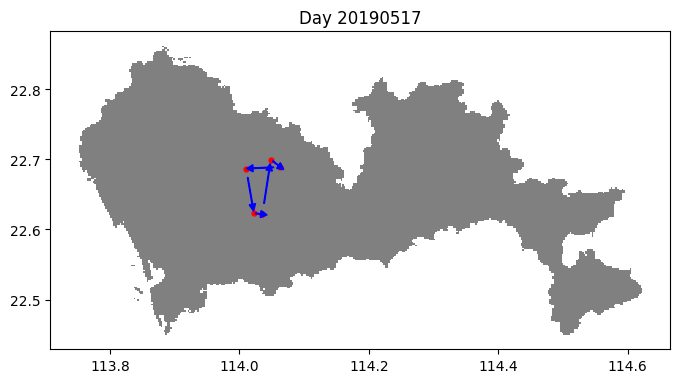

Serial: [145, 214, 145]


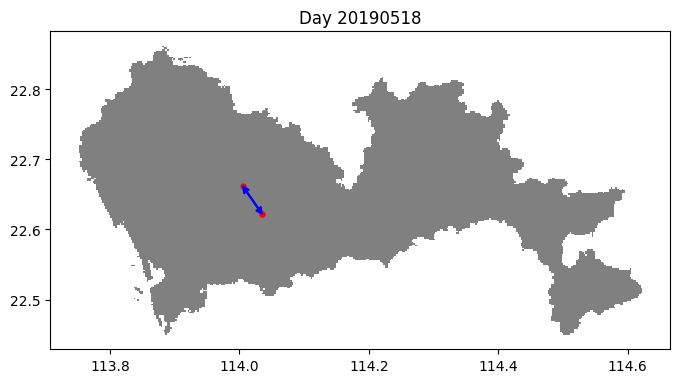

Serial: [145, 214, 145, 317, 214, 145]


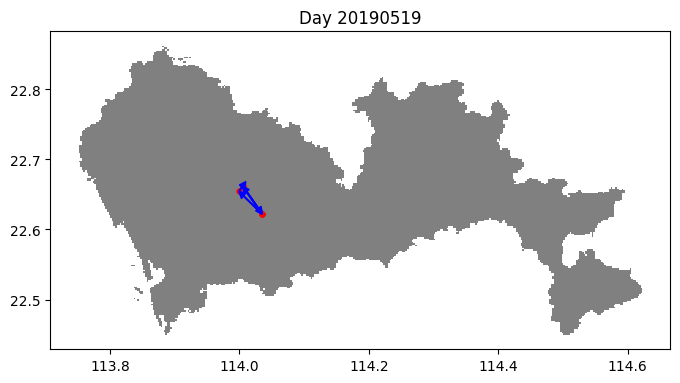

Serial: [145, 38, 274, 48, 145]


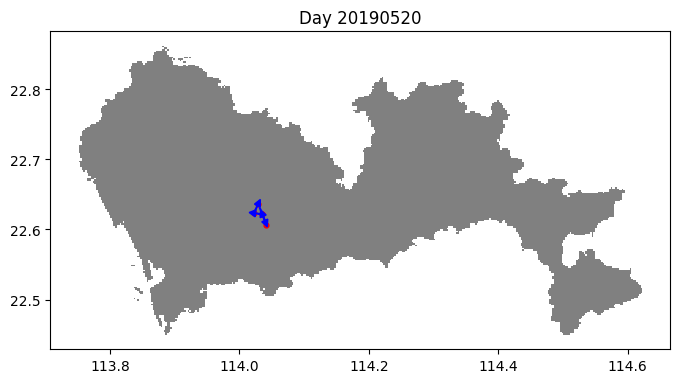

Serial: [145, 280, 359, 301, 287, 145]


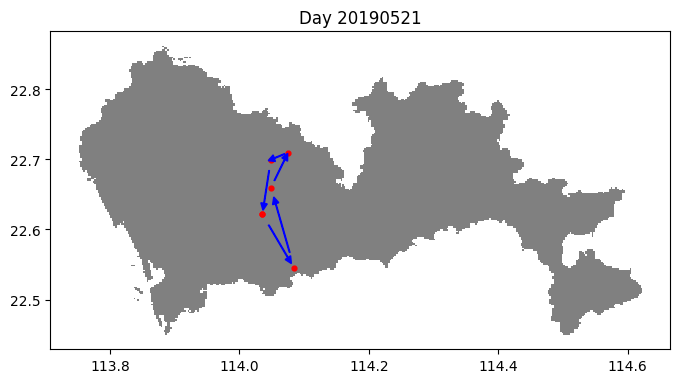

Serial: [145, 175, 145]


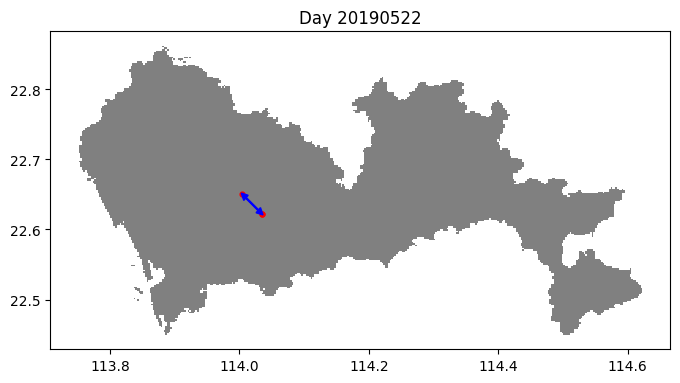

Serial: [145, 280, 145]


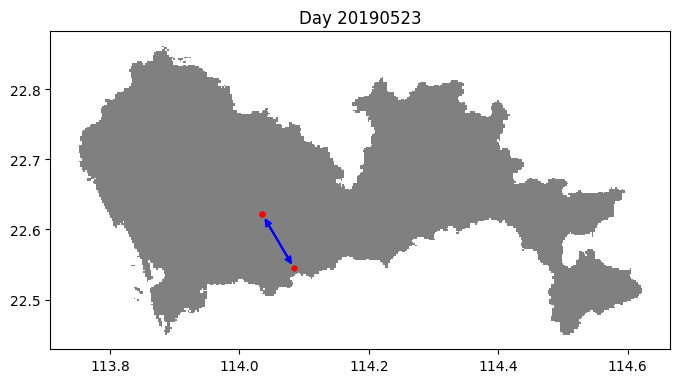

Serial: [145, 280, 48, 145, 117, 145]


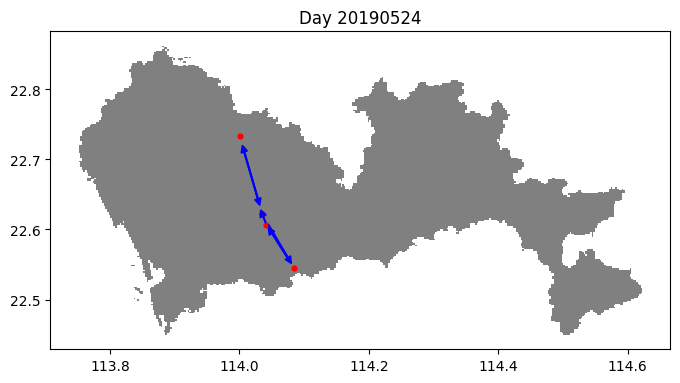

Serial: [145, 280, 202, 134, 249, 274, 38]


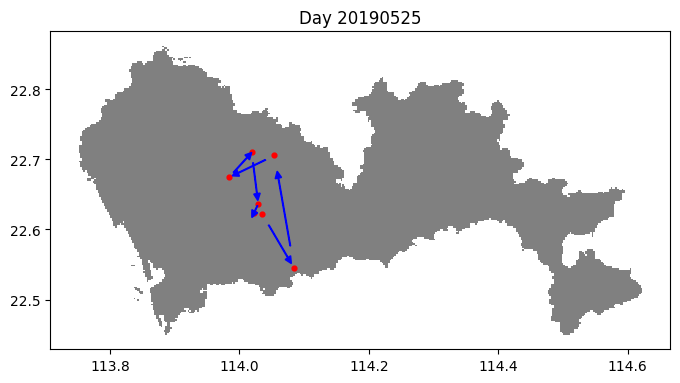

Serial: [38, 287, 280, 145, 355, 145]


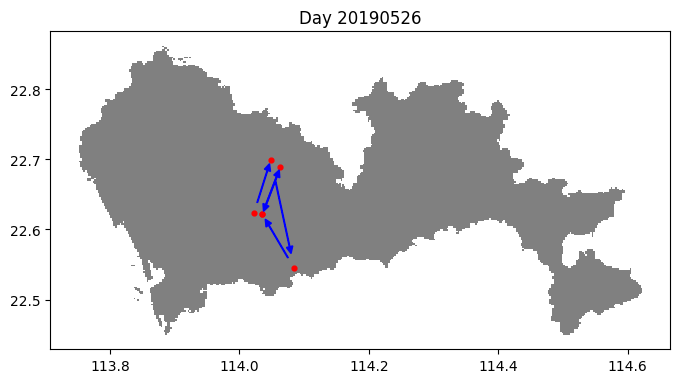

Serial: [145, 83, 202, 74, 145]


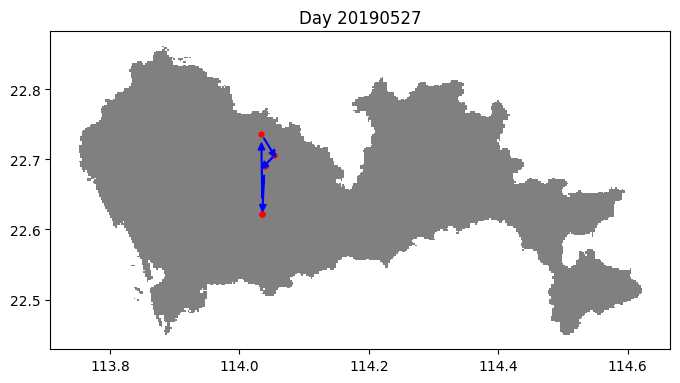

Serial: [145, 48, 287, 145]


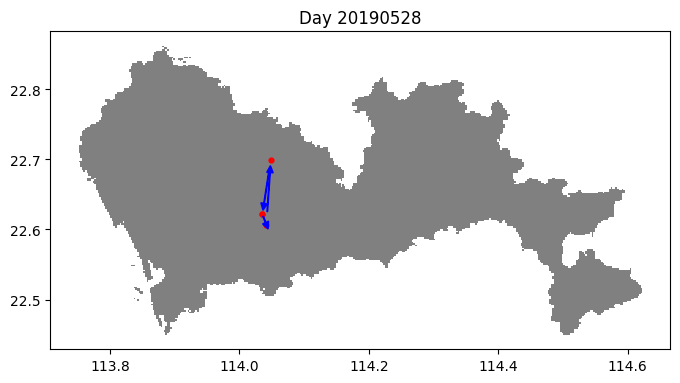

Serial: [145, 214, 280, 145, 287, 145]


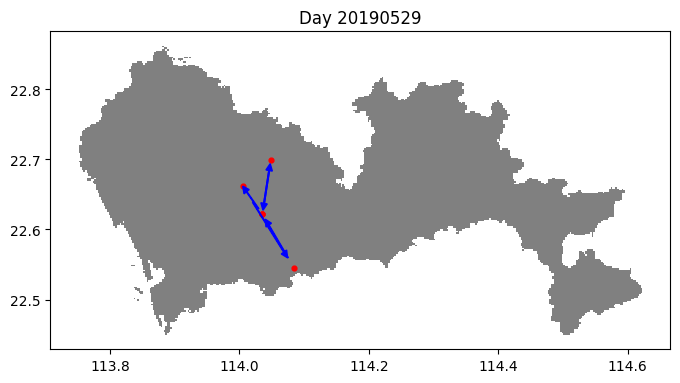

Serial: [145, 61, 280, 202, 86, 145]


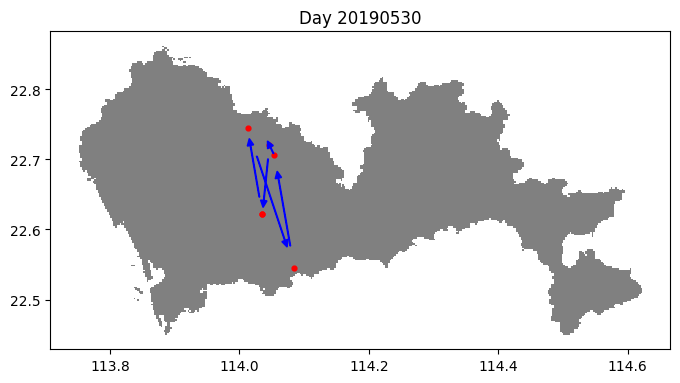

Serial: [145, 38, 86, 40, 280, 145]


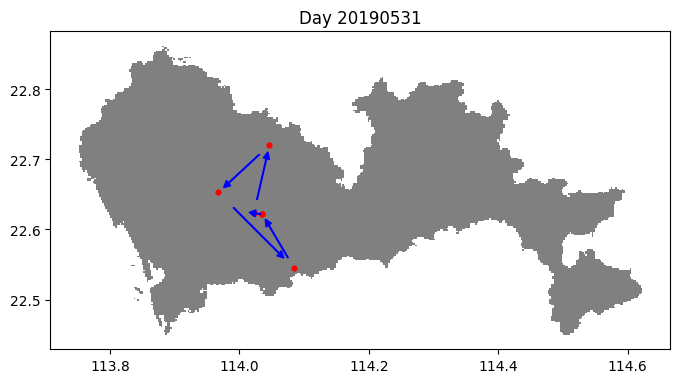

Serial: [145, 230, 181, 53]


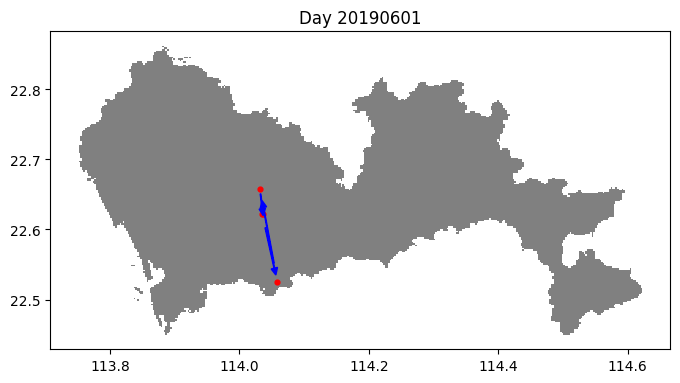

Serial: [53, 267, 63, 53, 296, 53]


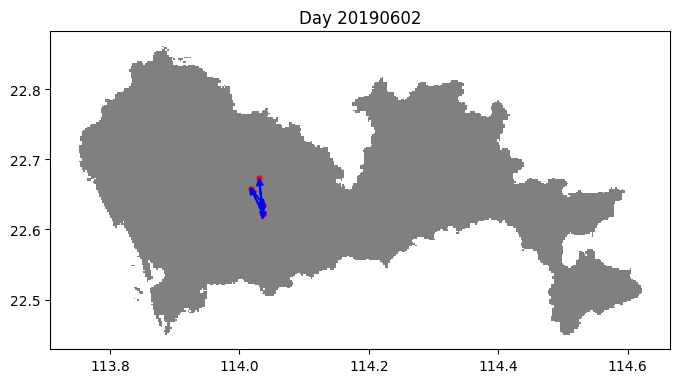

Serial: [53, 111, 121, 67, 181, 235, 53]


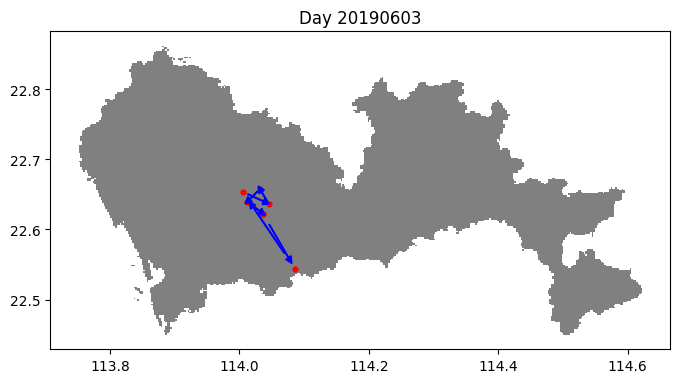

Serial: [53, 229, 53, 111, 67, 53]


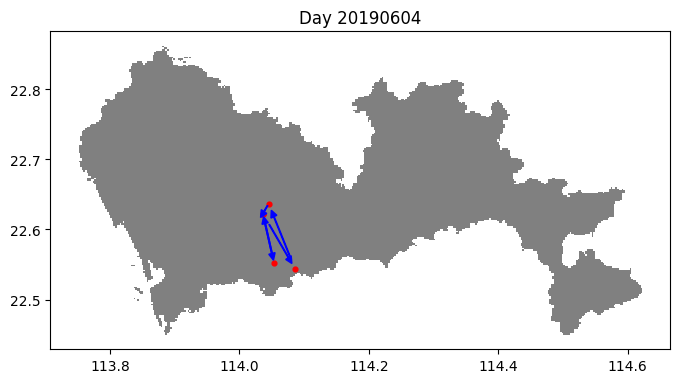

Serial: [53, 235, 53]


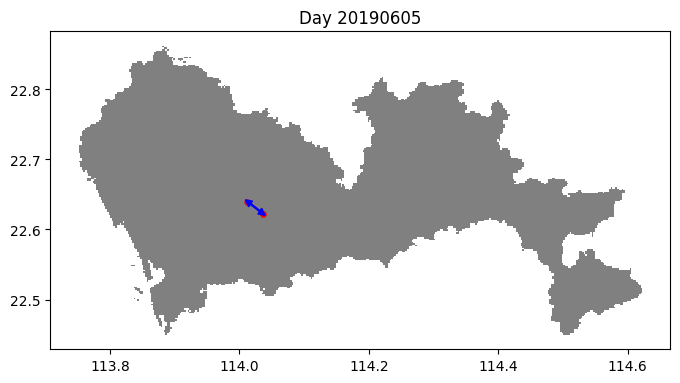

Serial: [53, 121, 63, 53, 132, 267, 295, 121, 132]


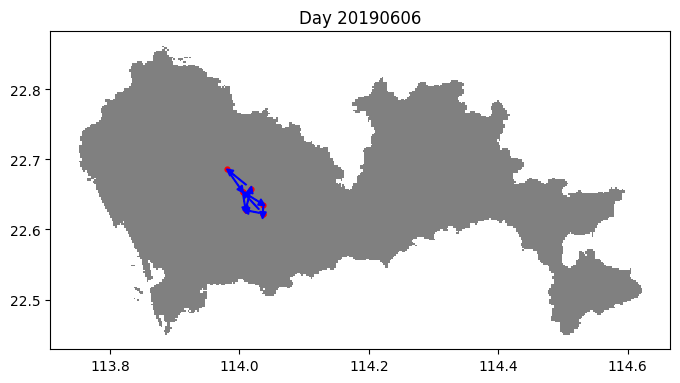

Serial: [132, 235, 12]


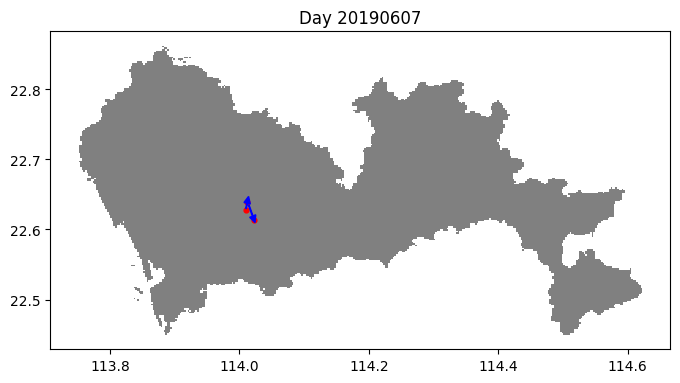

Serial: [12, 181, 119, 53]


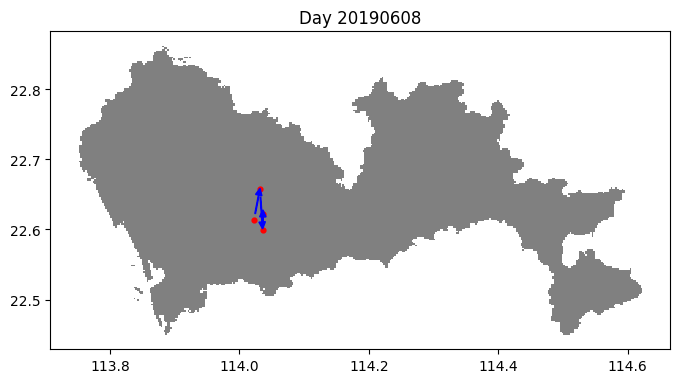

Serial: [53, 235, 239, 32, 235, 53]


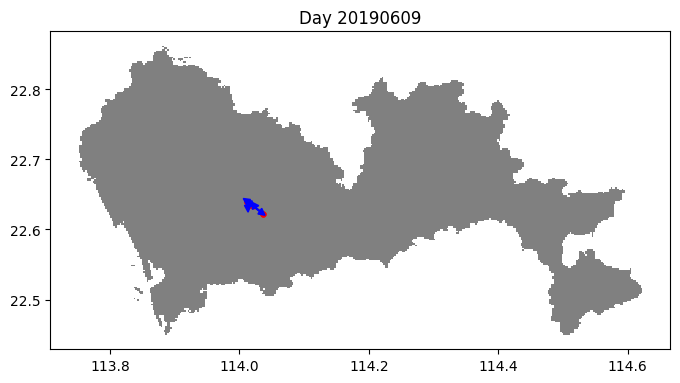

Serial: [53, 75, 111, 53]


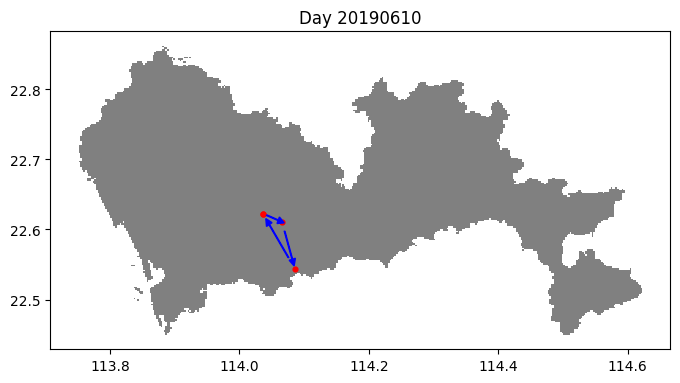

Serial: [53, 3, 53, 67, 119, 54, 53]


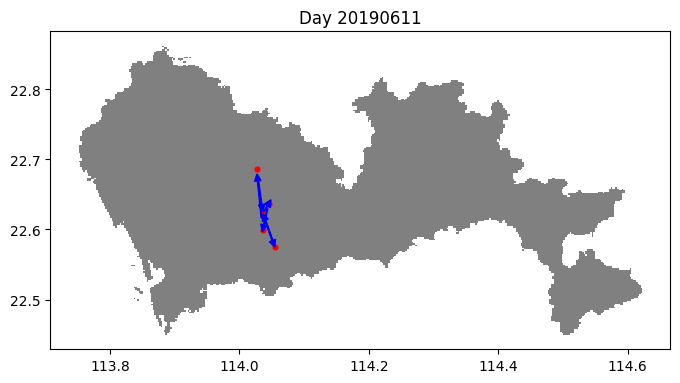

Serial: [53, 181, 111, 235]


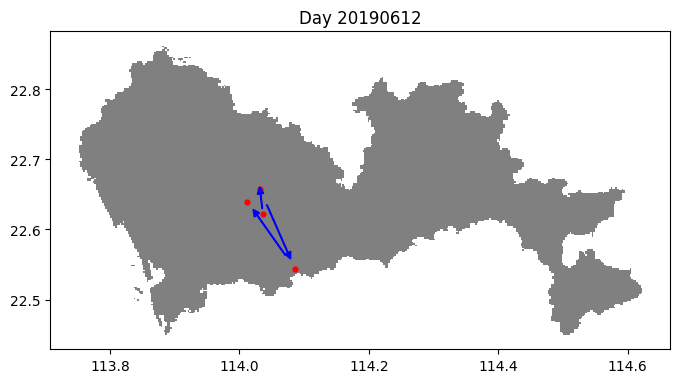

Serial: [235, 111, 189]


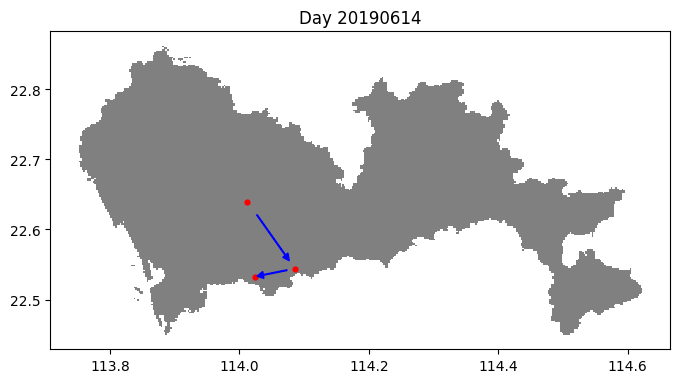

Serial: [189, 53, 3, 121, 53, 111, 119, 53, 75, 53]


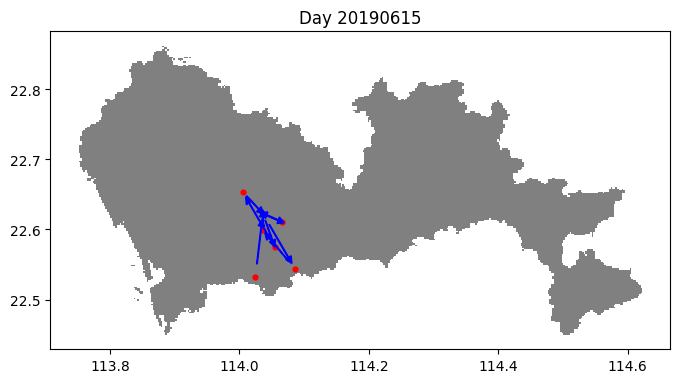

Serial: [53, 111, 53, 88, 239, 53]


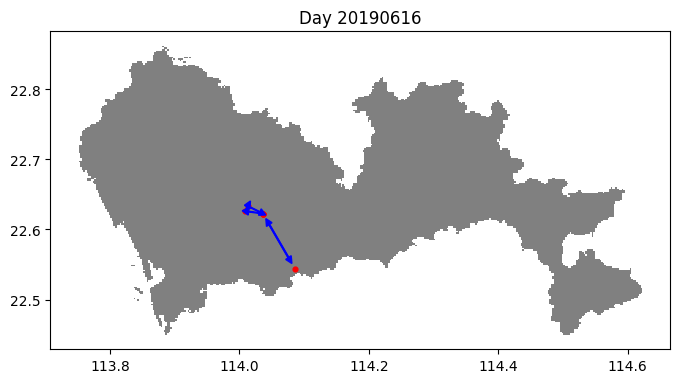

Serial: [53, 239, 12, 189, 111, 53, 181, 53]


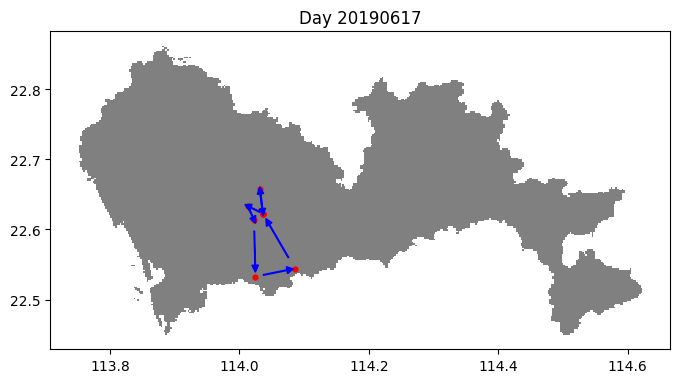

Serial: [53, 3, 12, 53, 158, 296, 53]


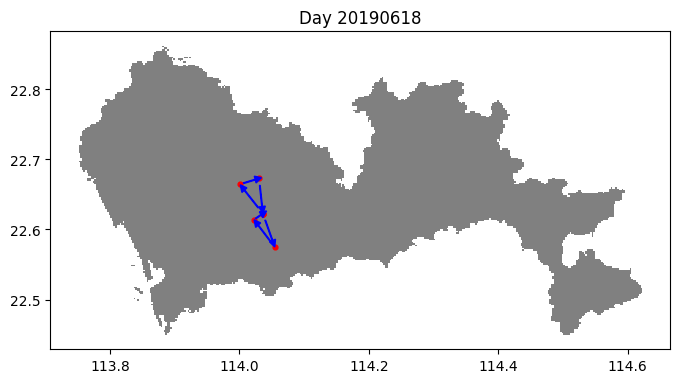

Serial: [53, 111, 32, 12, 53]


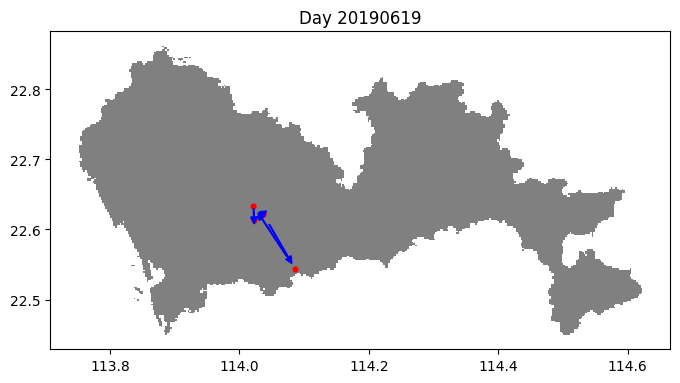

Serial: [53, 296, 53, 67, 53, 111]


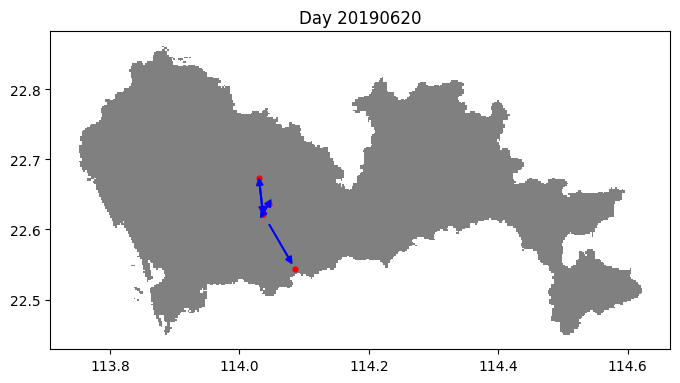

Serial: [111, 53]


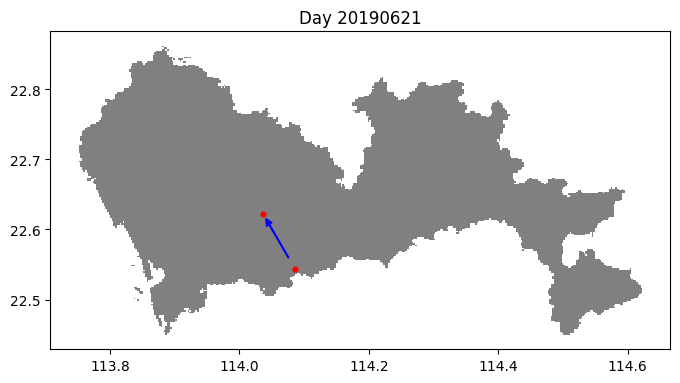

Serial: [53, 291, 53, 132, 53]


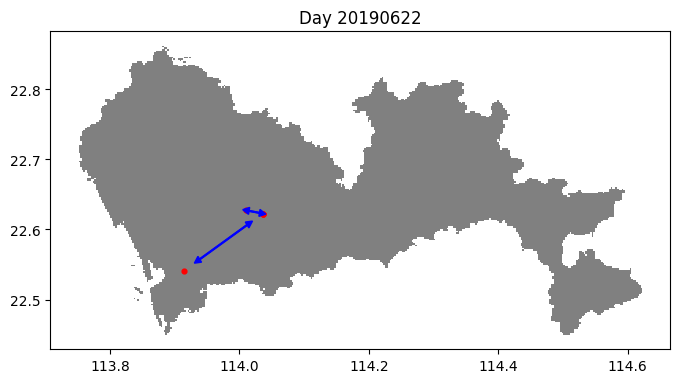

Serial: [53, 291, 53]


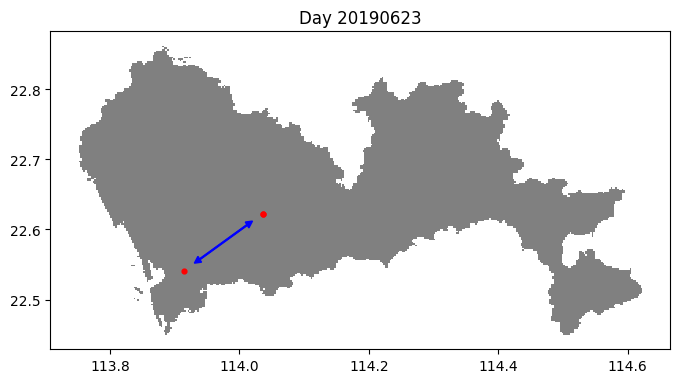

Serial: [53, 75, 158, 121, 159, 119]


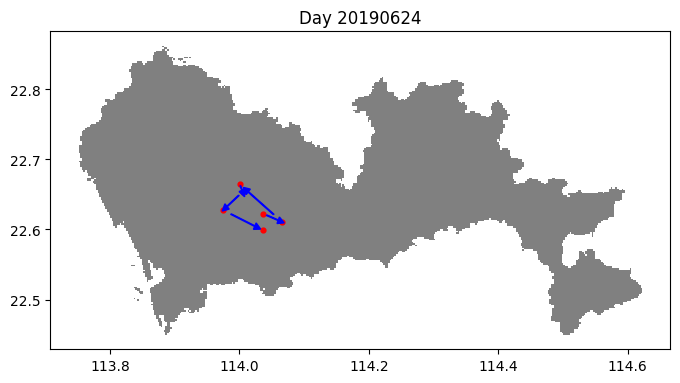

Serial: [119, 53, 64, 235, 53]


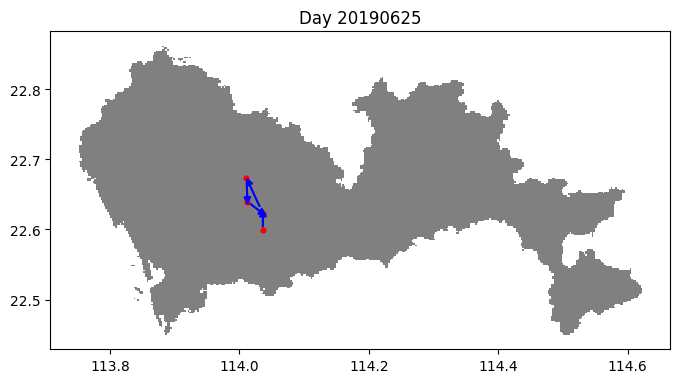

Serial: [53, 121, 53, 332, 57, 53]


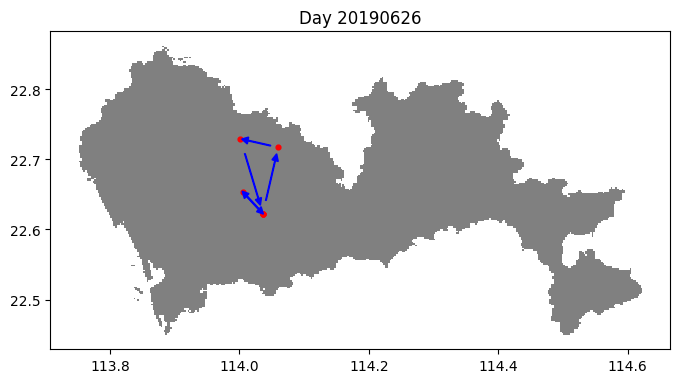

Serial: [53, 12, 111, 53, 332, 121, 53]


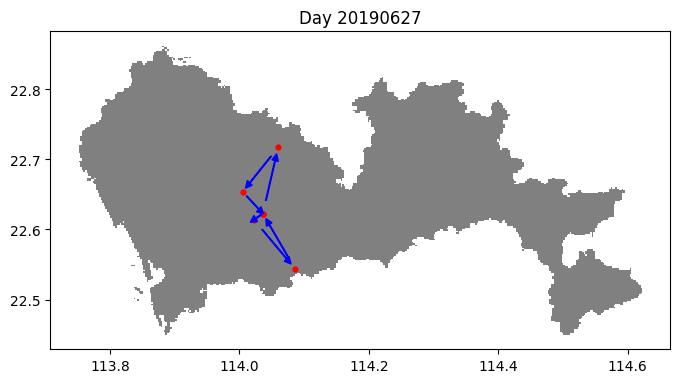

Serial: [53, 190, 111, 235, 354, 53, 239, 248, 235]


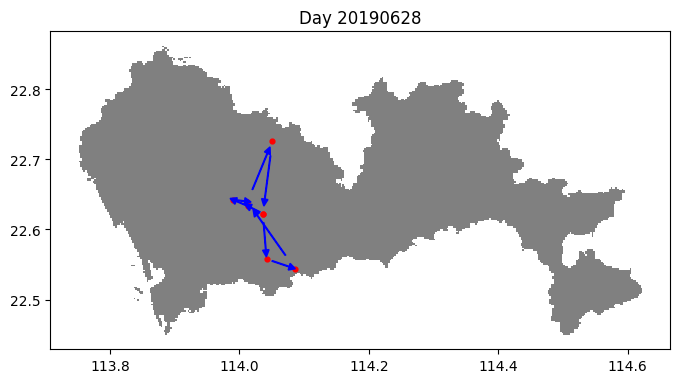

Serial: [235, 121, 53, 354, 53]


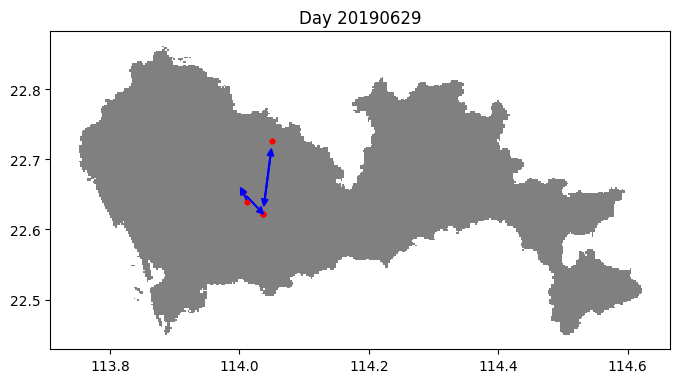

Serial: [53, 332, 8, 267, 235, 22, 53, 71]


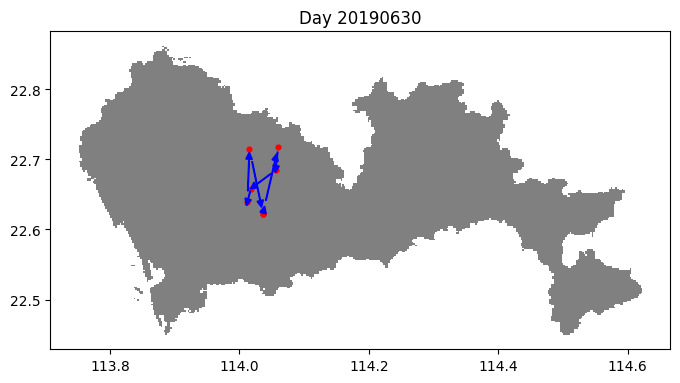

Serial: [71, 118, 71, 205]


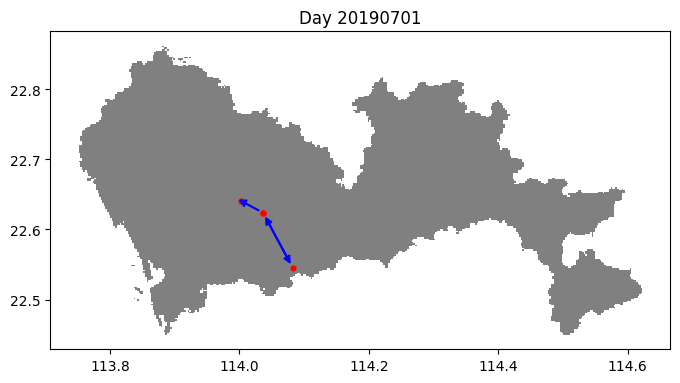

Serial: [205, 118, 340, 315, 101, 71, 91]


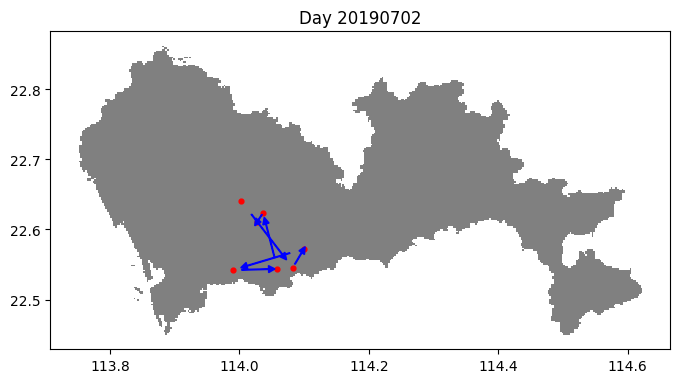

Serial: [91, 94, 36, 118, 316, 101, 71]


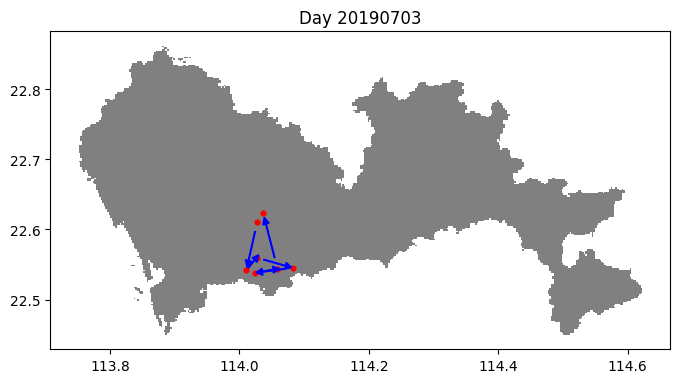

Serial: [71, 199, 71, 104, 101, 94, 71]


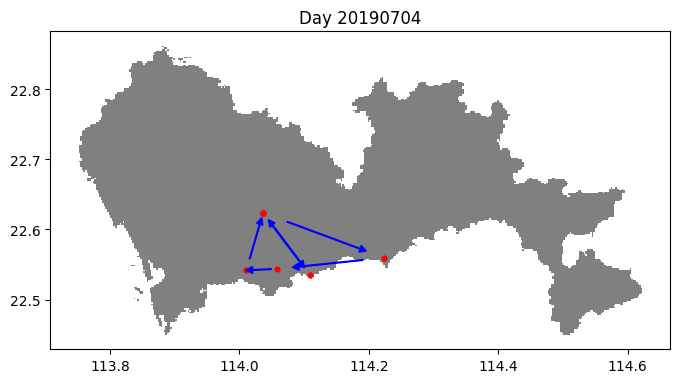

Serial: [71, 94, 118, 227, 131, 6, 71]


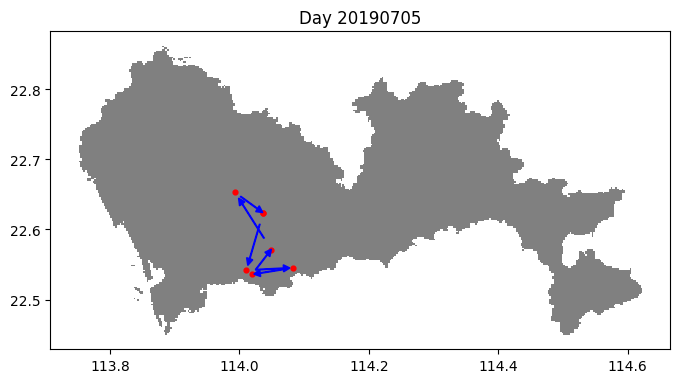

Serial: [71, 199, 71, 251, 199]


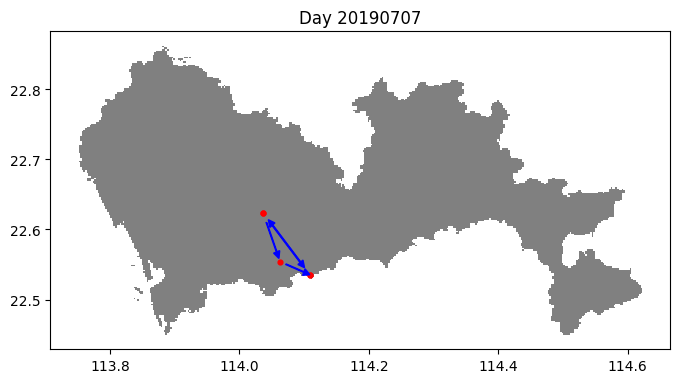

Serial: [199, 94, 118, 293, 322, 293, 199]


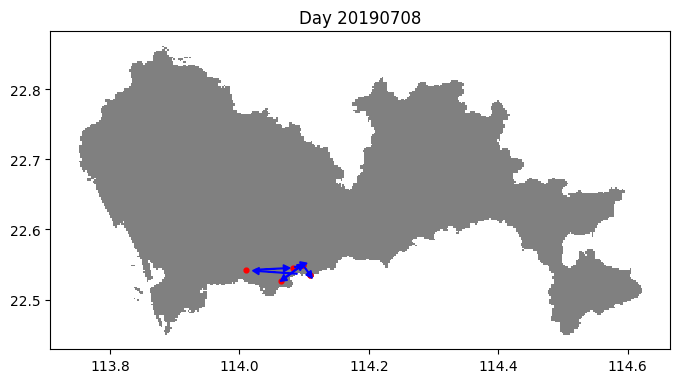

Serial: [199, 101, 118, 94, 293, 199]


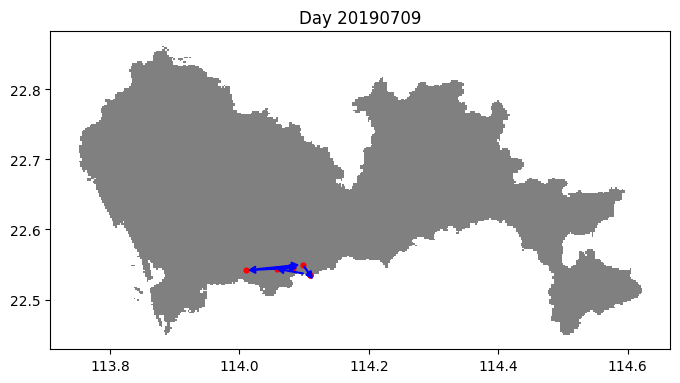

Serial: [199, 36, 288, 118, 199, 288, 199]


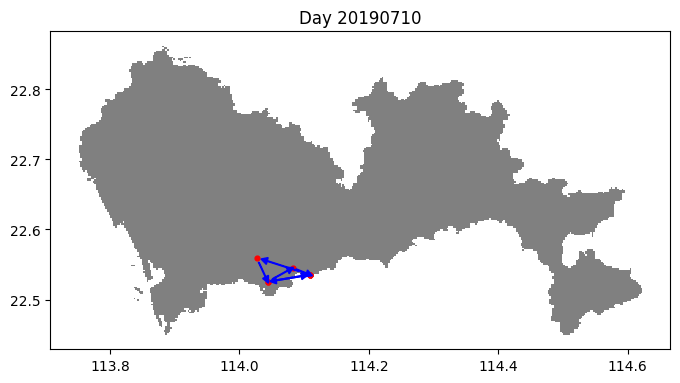

Serial: [199, 324, 118, 288, 72, 199]


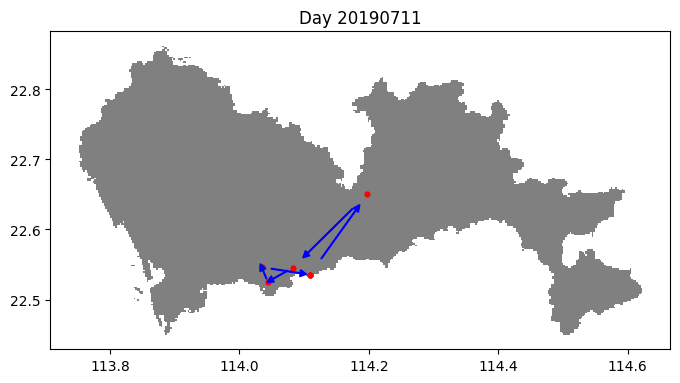

Serial: [199, 94, 251, 94, 118, 199]


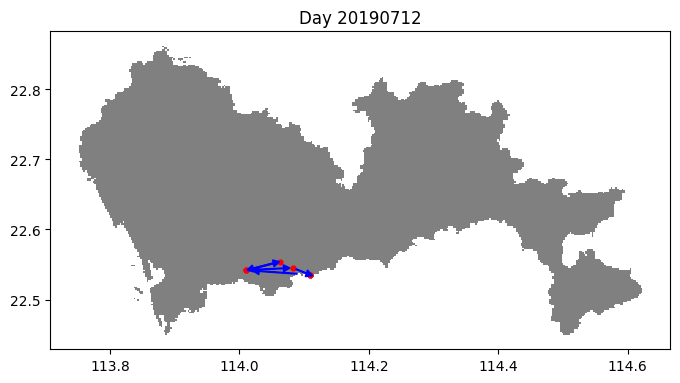

Serial: [199, 133, 324, 72, 118, 327, 101, 251, 36, 199]


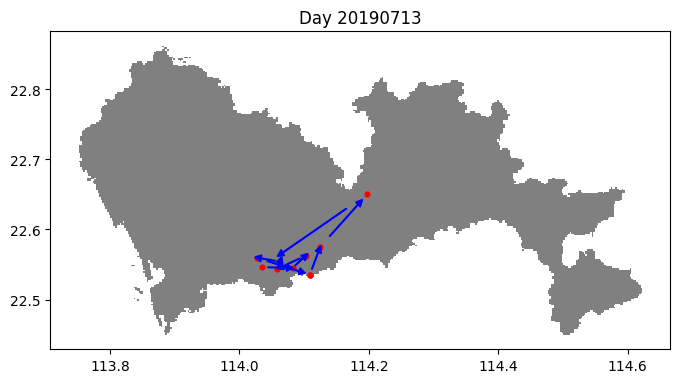

Serial: [199, 293, 118, 199, 72, 217, 199]


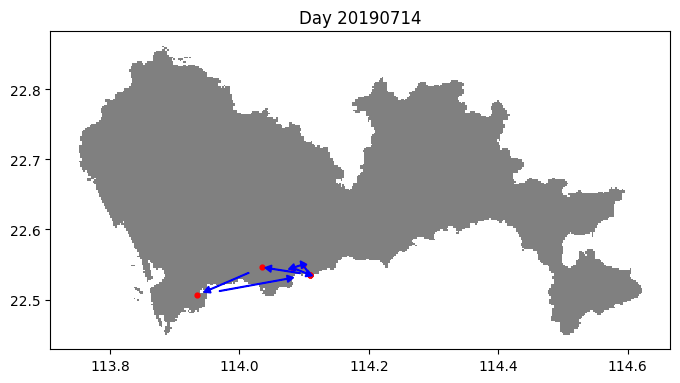

Serial: [199, 118, 72, 101, 118, 195, 118, 199]


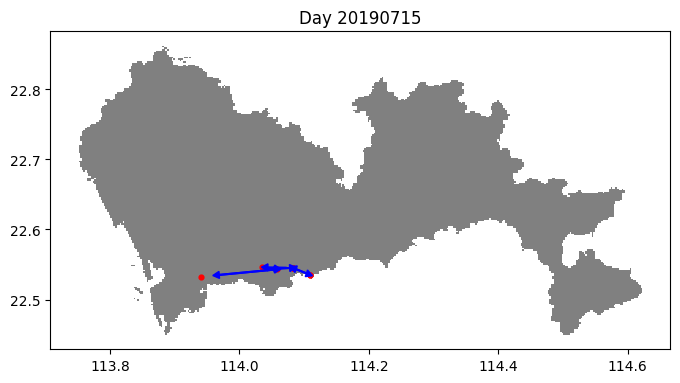

Serial: [199, 118, 327, 199, 257, 118, 199]


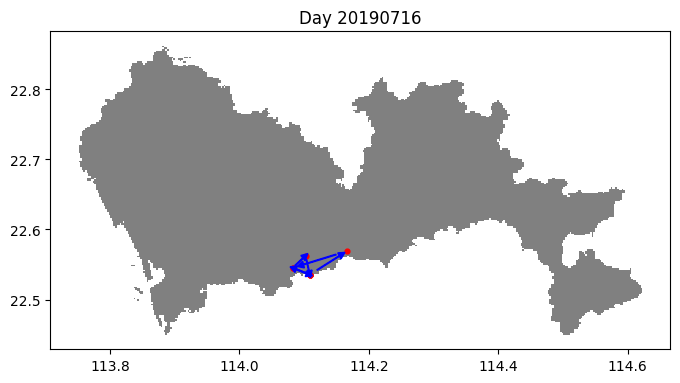

Serial: [199, 327, 199, 257, 199, 324, 72, 101, 199]


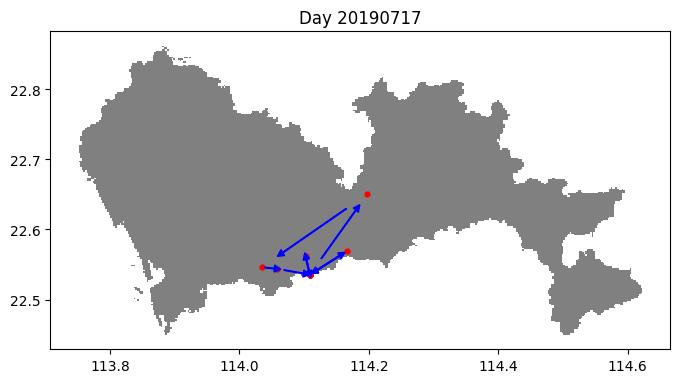

Serial: [199, 101, 315, 94, 36, 309, 131, 199]


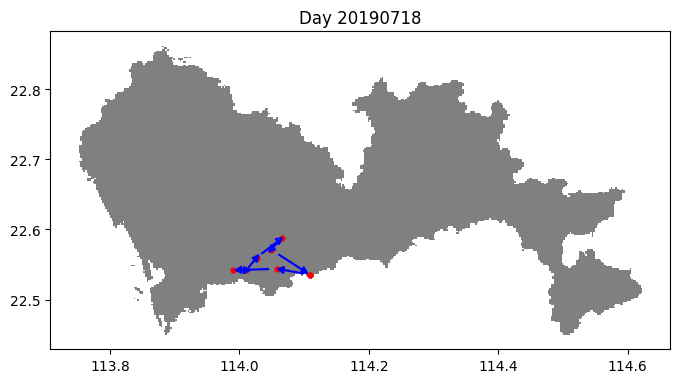

Serial: [199, 237, 118, 238, 288, 148, 288, 10, 139, 199]


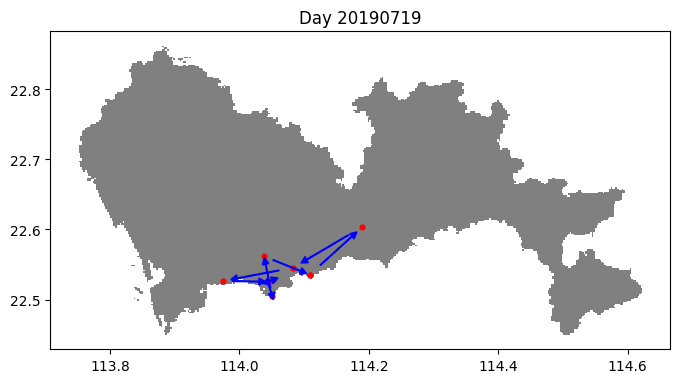

Serial: [199, 227, 118, 101, 72, 199]


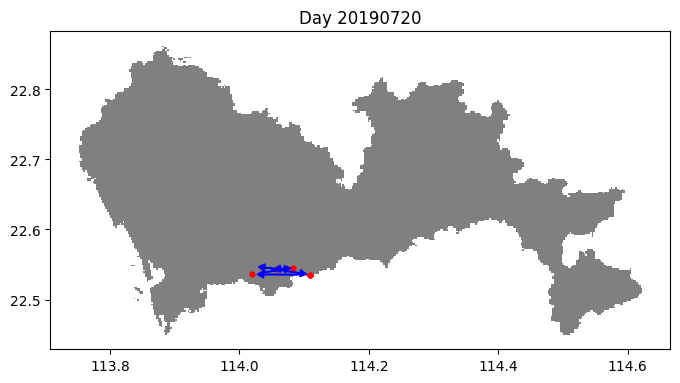

Serial: [199, 322, 316, 139, 118, 227, 199]


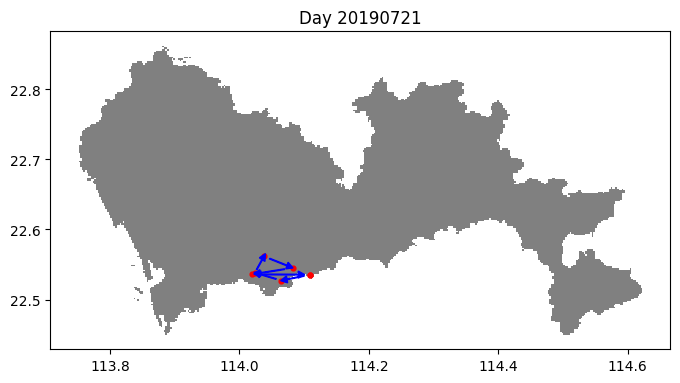

Serial: [199, 288, 118, 322, 209, 136, 199]


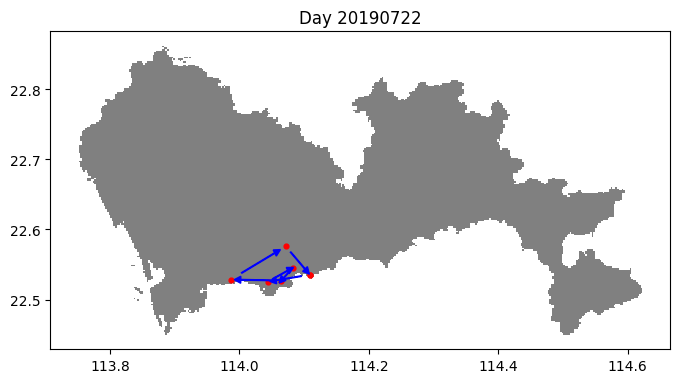

Serial: [199, 94, 227, 72, 118, 199, 288, 199]


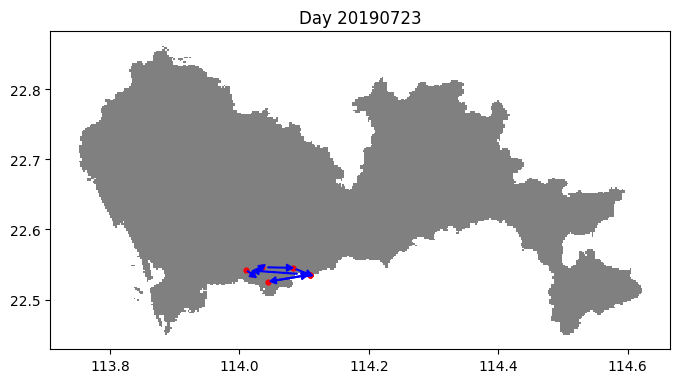

Serial: [199, 309, 118, 101, 94, 142, 199]


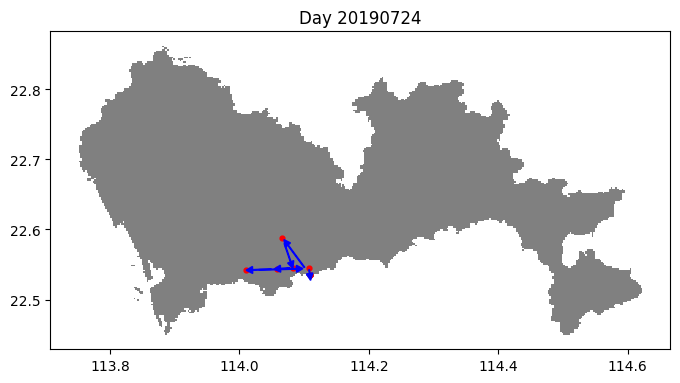

Serial: [199, 118, 94, 101, 275, 72, 101, 322, 199]


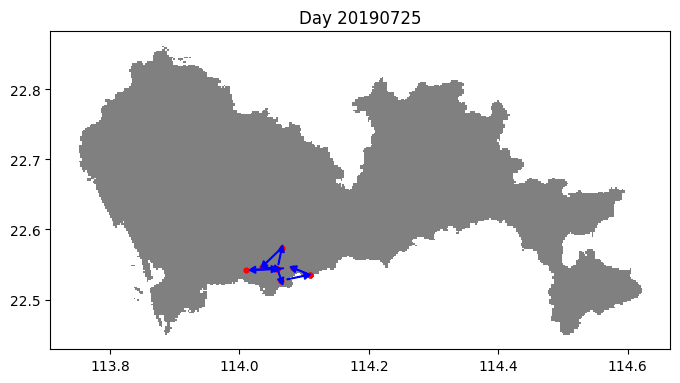

Serial: [199, 101, 118, 101, 118, 136, 209, 142, 199]


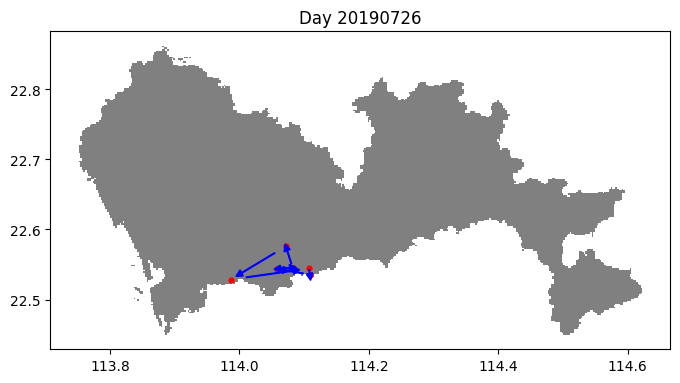

Serial: [199, 118, 227, 10, 139, 72, 199]


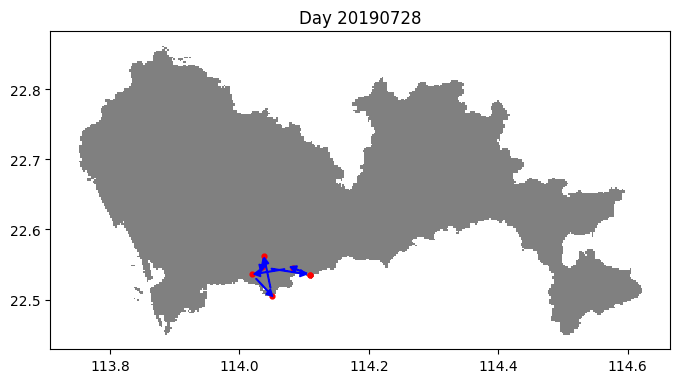

Serial: [199, 94, 276, 227, 94, 10, 199]


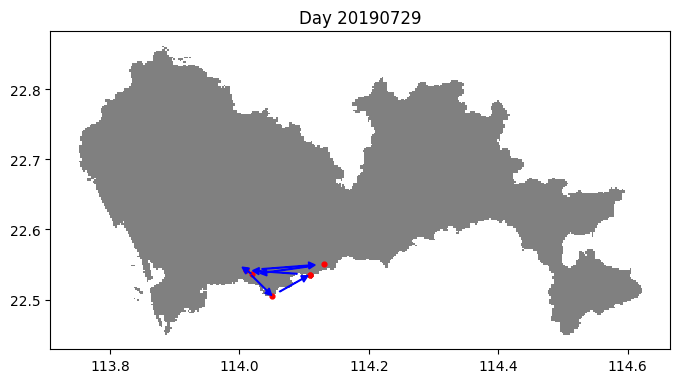

Serial: [199, 94, 288, 118, 94, 293, 199]


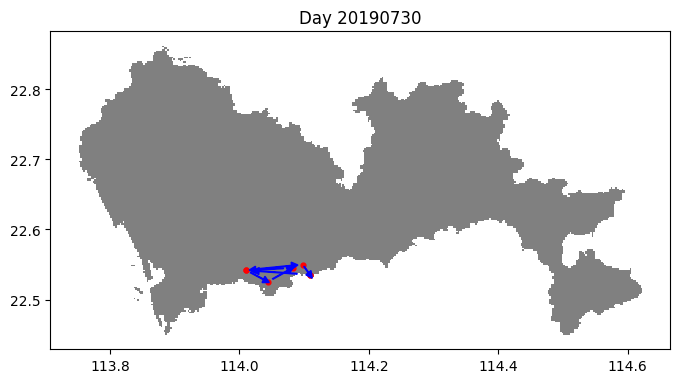

Serial: [199, 142, 133, 118, 131, 276, 199]


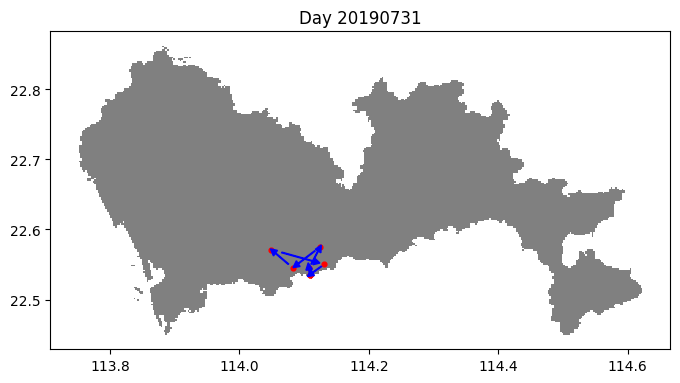

Serial: [199, 207, 186, 207, 176, 265, 278, 58, 128, 260, 260]


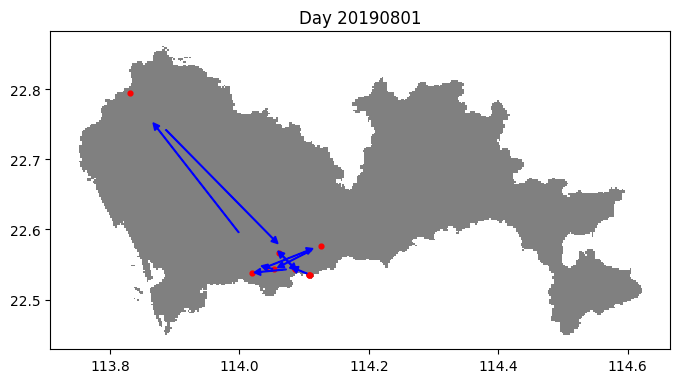

Serial: [260, 176, 207, 2, 270, 14]


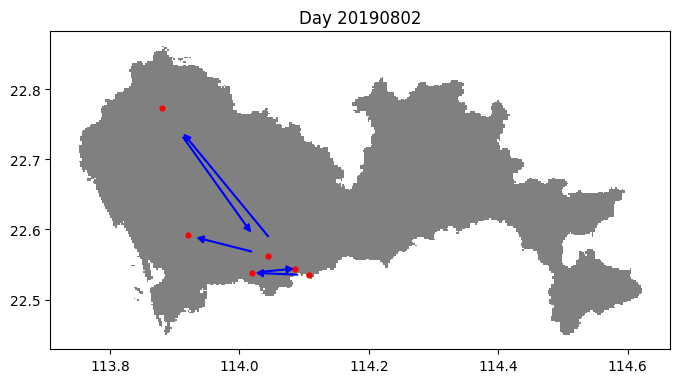

Serial: [14, 207, 254, 176, 39, 265, 260]


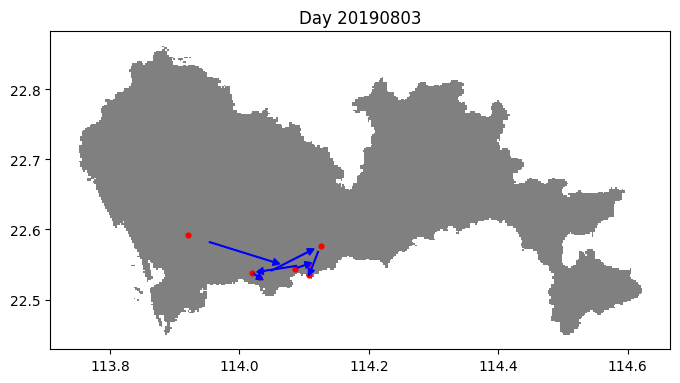

Serial: [260, 344, 260]


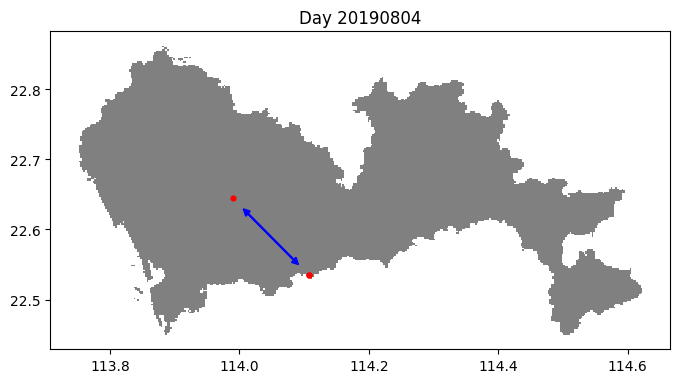

Serial: [260, 270, 123, 46, 207, 58, 240, 43, 46, 160, 58, 260]


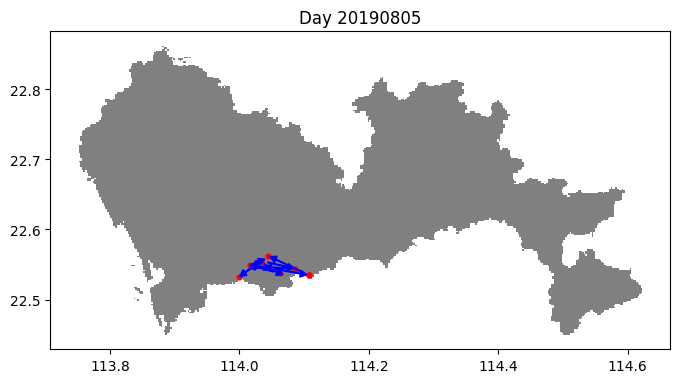

Serial: [260, 207, 278, 207, 254, 207, 370, 260]


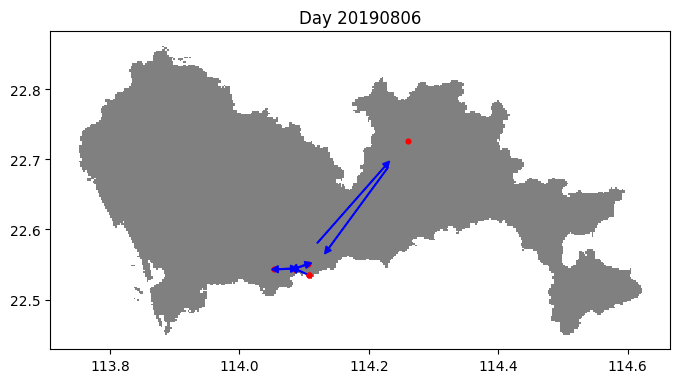

Serial: [260, 278, 240, 207, 254, 278, 176, 260]


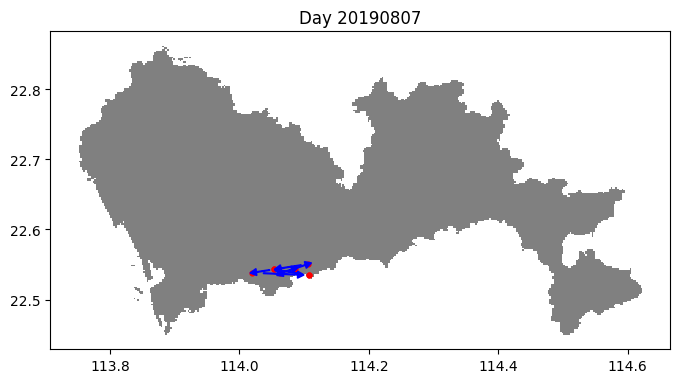

Serial: [260, 278, 207, 179, 260, 207, 260]


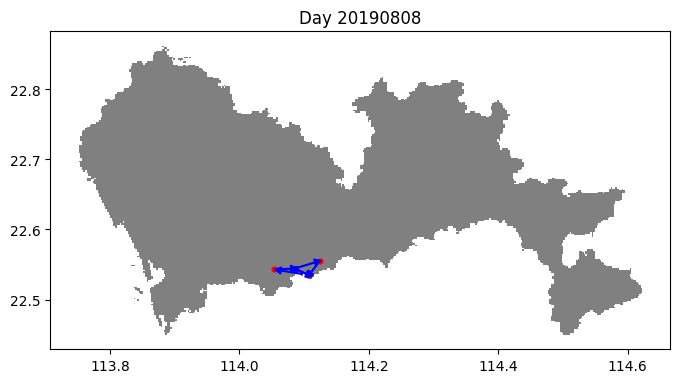

Serial: [260, 124, 39, 207, 260]


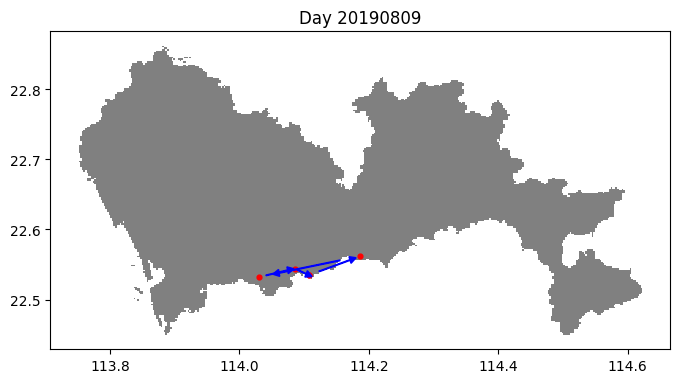

Serial: [260, 278, 270, 184, 270, 207, 260]


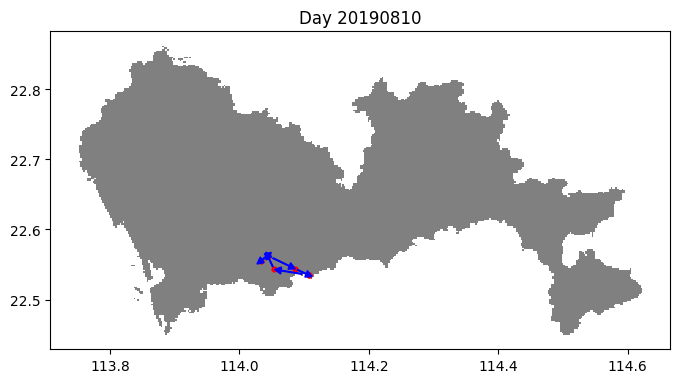

Serial: [260, 13, 367, 179, 307, 260, 39, 260]


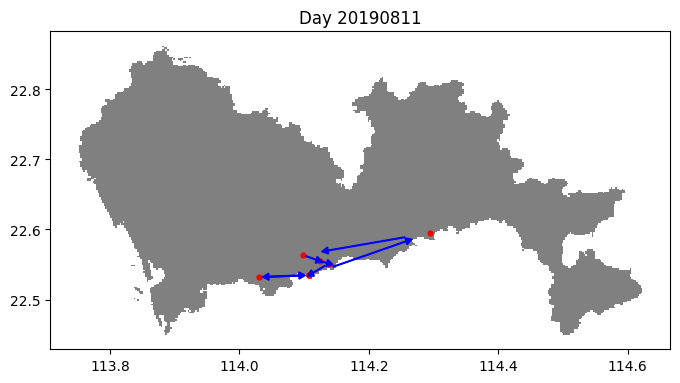

Serial: [260, 207, 176, 278, 207, 260]


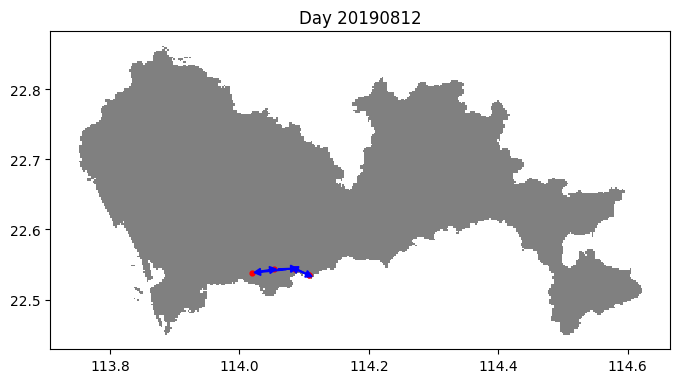

Serial: [260, 254, 278, 58, 278, 59, 207, 334, 260]


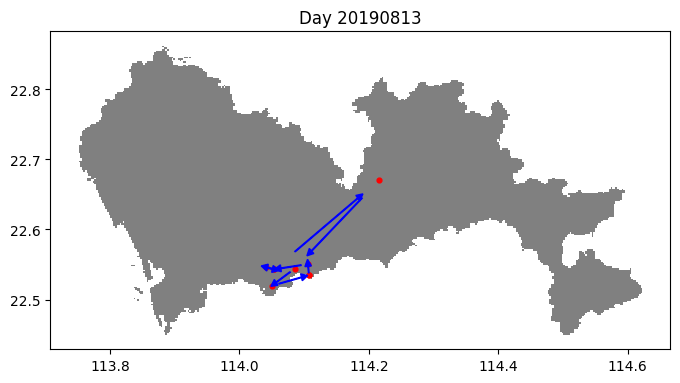

Serial: [260, 58, 16, 207, 252, 186, 369, 144, 207, 254, 260]


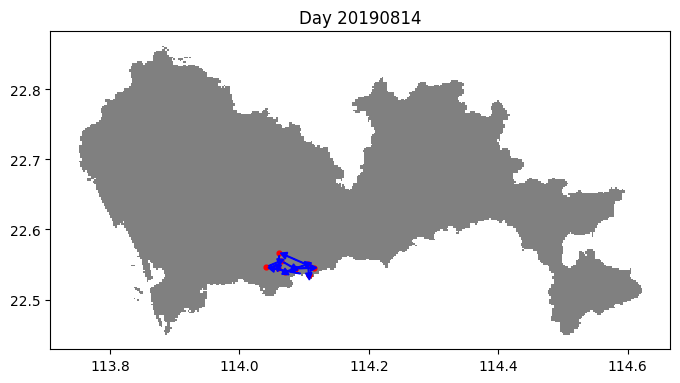

Serial: [260, 270, 16, 46, 207, 278, 270, 260]


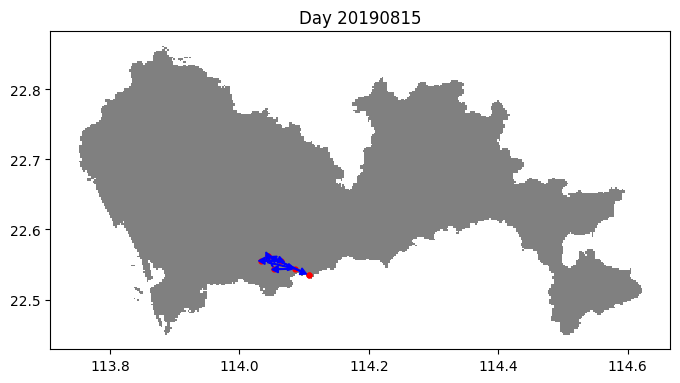

Serial: [260, 58, 144, 58, 191, 207, 186, 278, 176, 254, 260]


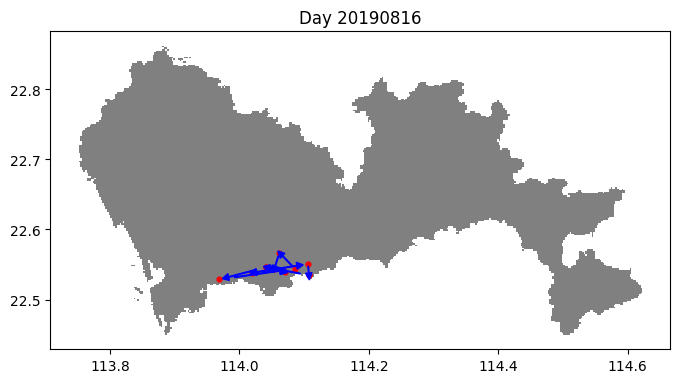

Serial: [260, 254, 260, 254]


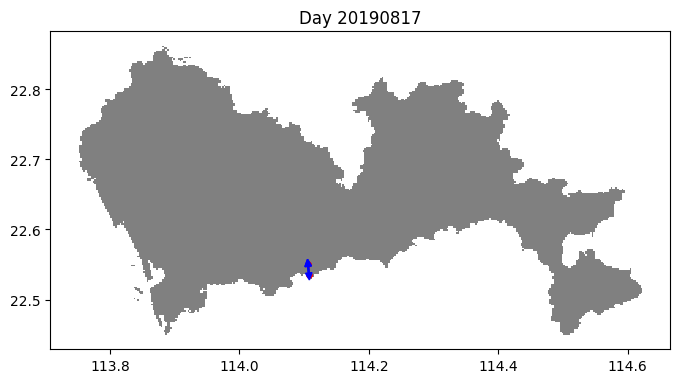

Serial: [254, 207, 307, 211, 278, 260]


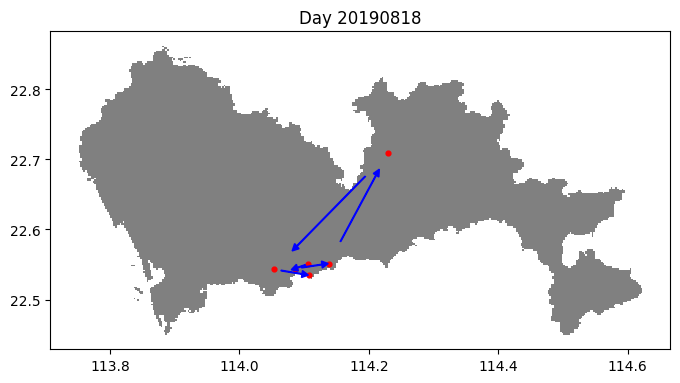

Serial: [260, 252, 369, 207, 367, 357, 123, 260]


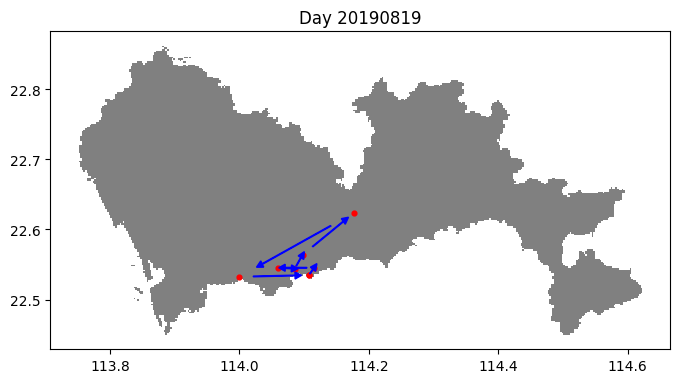

Serial: [260, 240, 207, 265, 260, 179, 260]


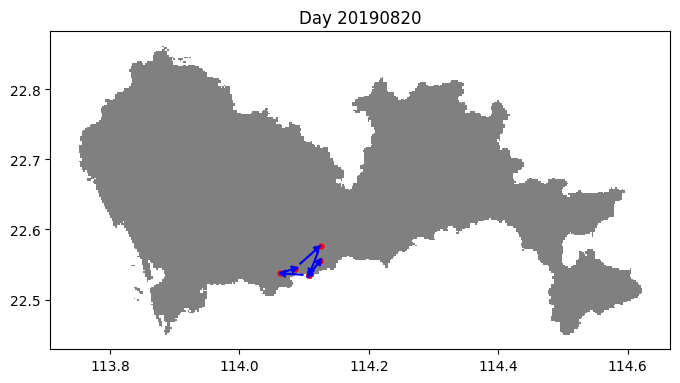

Serial: [260, 278, 260, 123, 254, 207, 369, 191, 260]


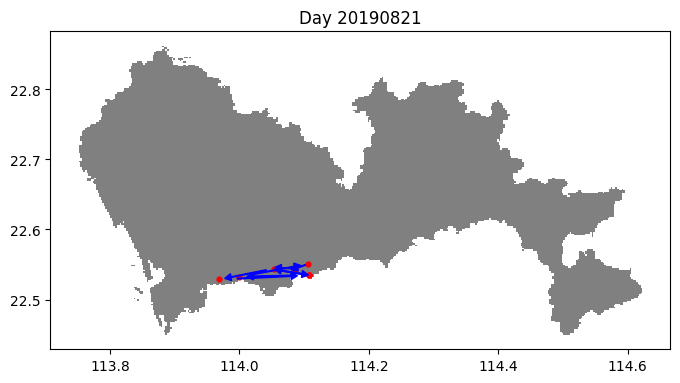

Serial: [260, 39, 278, 260, 179, 207, 367, 240, 260]


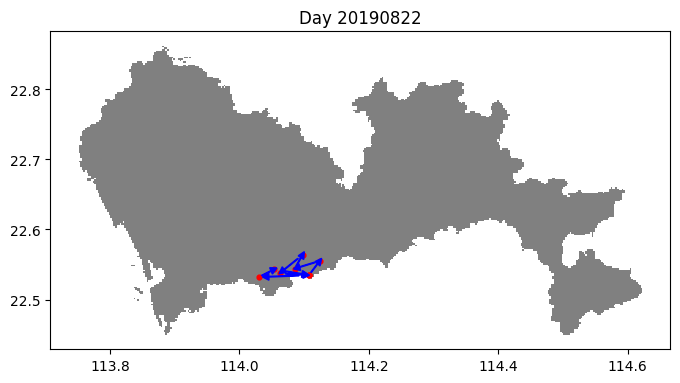

Serial: [260, 278, 207, 278, 23, 278, 260]


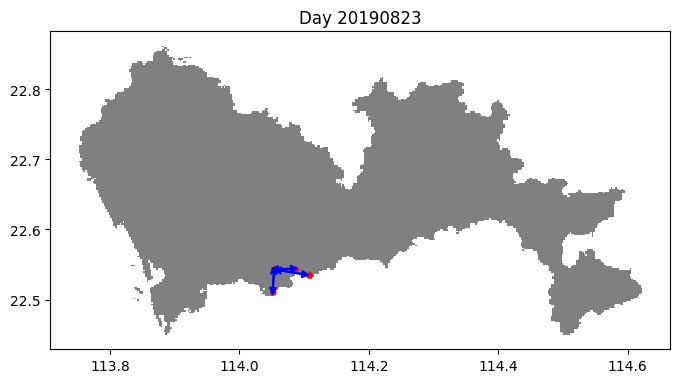

Serial: [260, 240, 23, 207, 13, 180, 260]


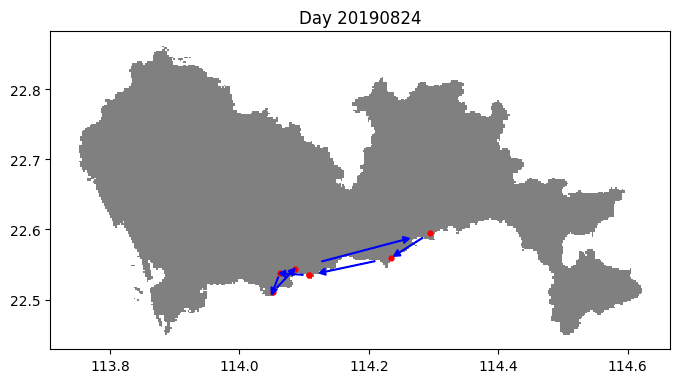

Serial: [260, 240, 270, 207, 278, 260]


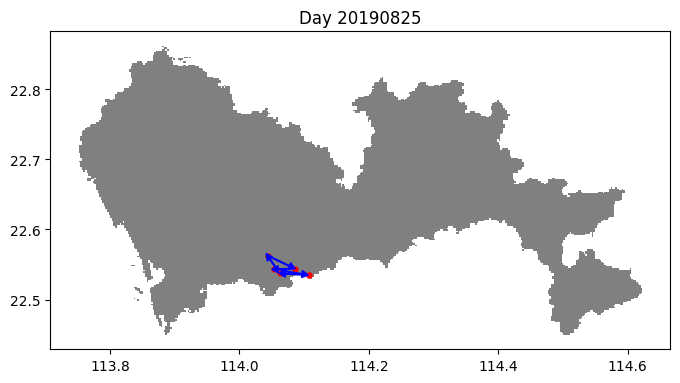

Serial: [260, 43, 207, 179, 270, 207, 260, 228, 260]


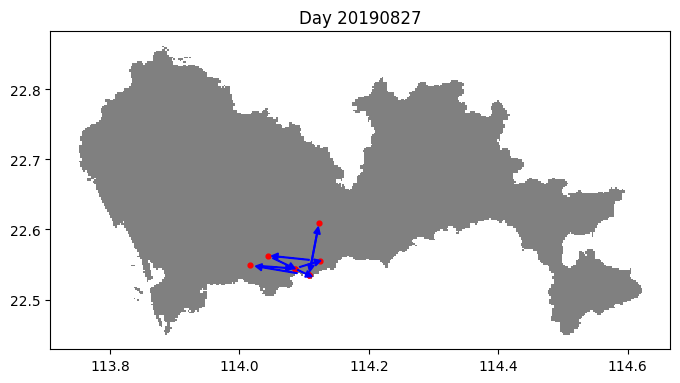

Serial: [260, 314, 260]


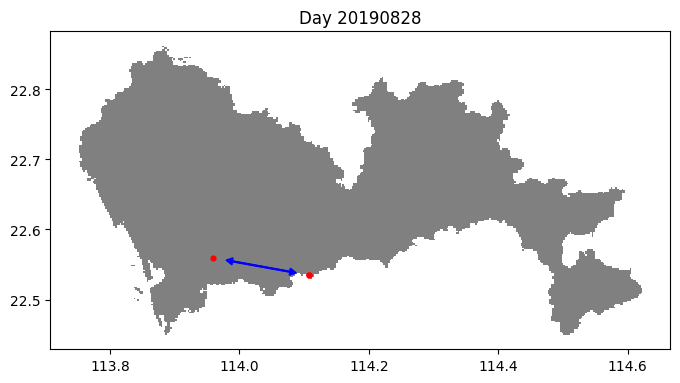

Serial: [260, 23, 207, 278, 337, 176, 278, 186, 260]


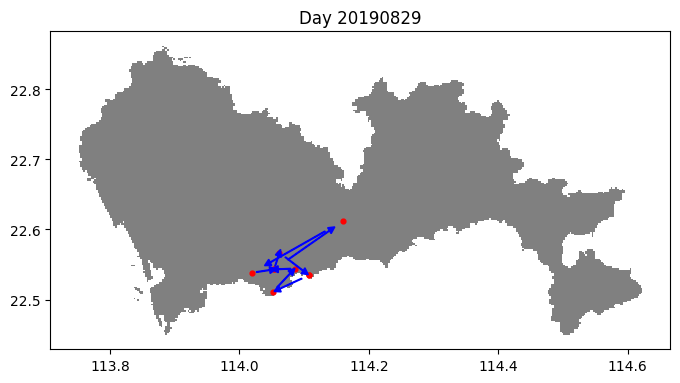

Serial: [260, 207, 369, 270, 184, 307, 367, 207, 260]


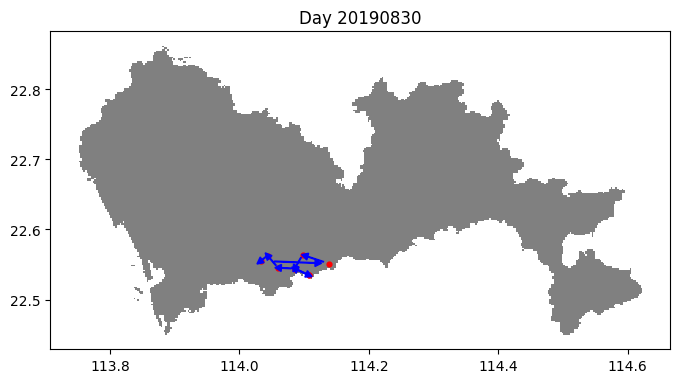

Serial: [260, 207, 254, 265, 207, 254, 260]


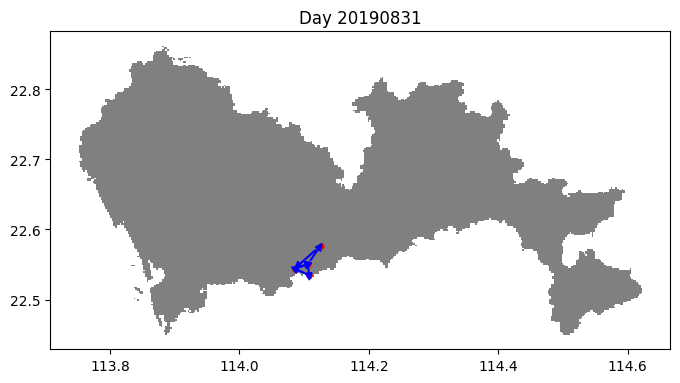

Serial: [260, 321, 157, 223, 108, 345, 108, 232]


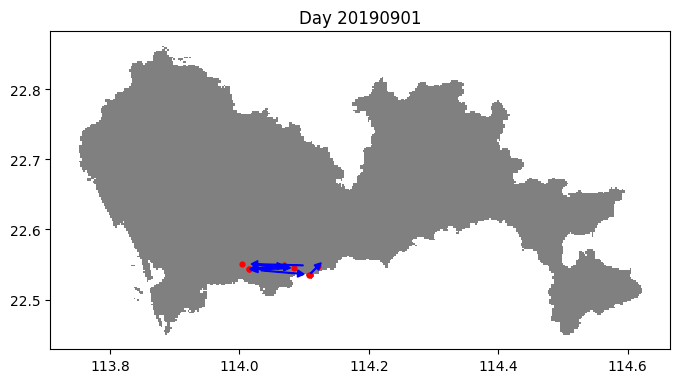

Serial: [232, 223, 232]


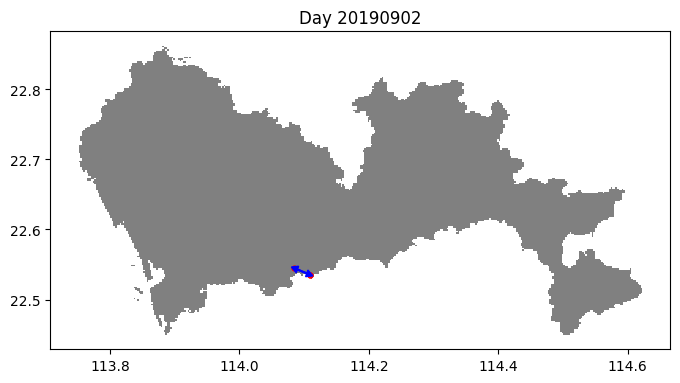

Serial: [232, 349, 82, 173, 223, 203, 232]


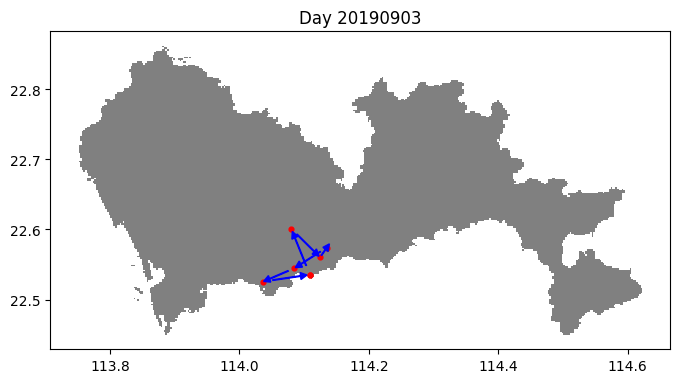

Serial: [232, 24, 108, 81, 338, 232, 223, 321, 232]


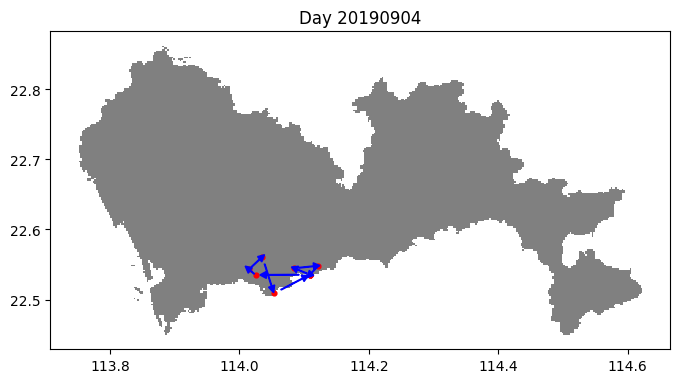

Serial: [232, 19, 345, 141, 0, 223, 232, 232]


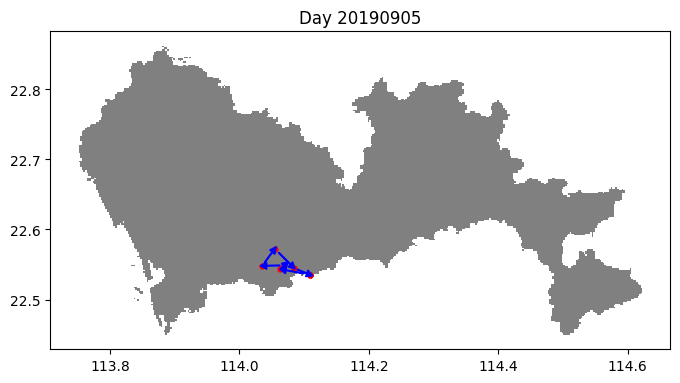

Serial: [232, 223, 50, 52, 223, 300, 223, 232]


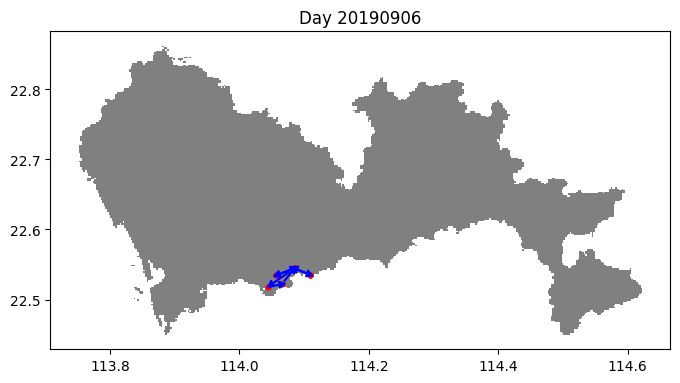

Serial: [232, 24, 232, 271, 223, 321]


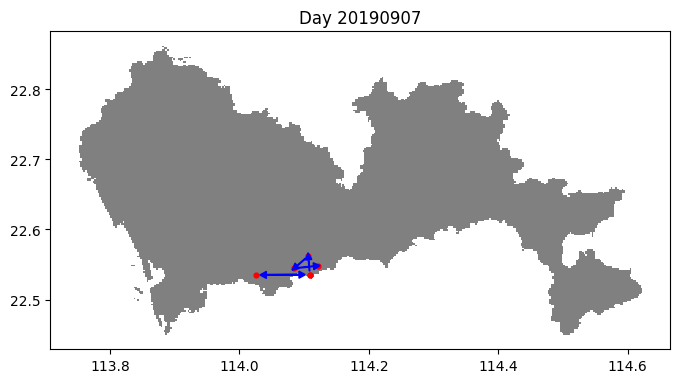

Serial: [321, 108, 345, 223, 157, 232]


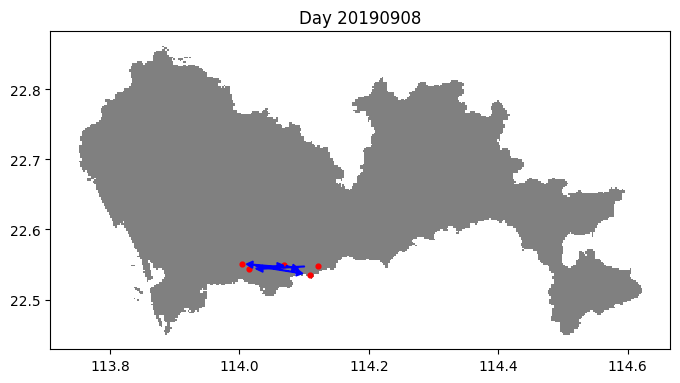

Serial: [232, 338, 0, 223, 19, 105, 232]


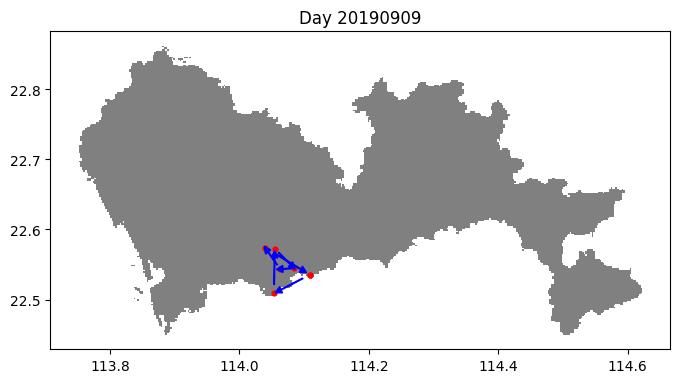

Serial: [232, 223, 300, 223, 325, 271, 141, 232]


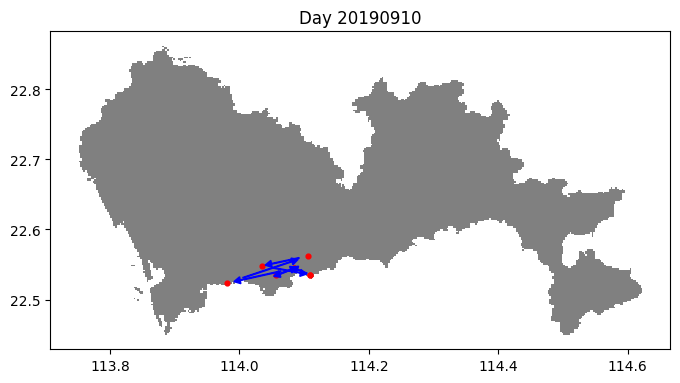

Serial: [232, 372, 24, 223, 232]


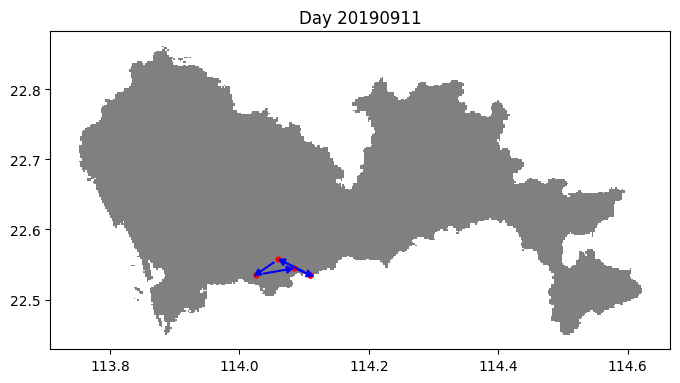

Serial: [232, 198, 173, 223, 282, 19, 141, 24, 232]


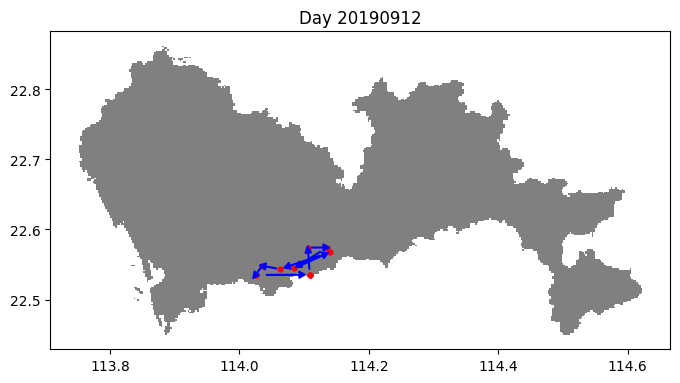

Serial: [232, 223, 50, 141, 321, 223, 300, 232]


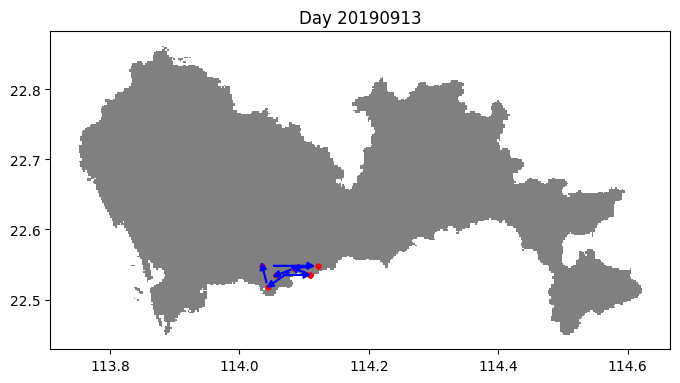

Serial: [232, 50, 223, 141, 282, 223, 232]


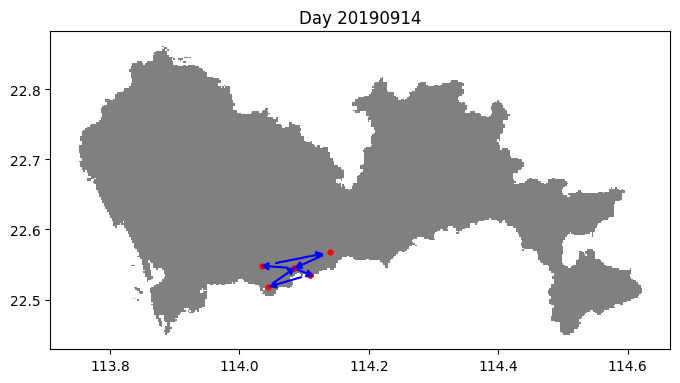

Serial: [232, 81, 271, 82, 273, 232]


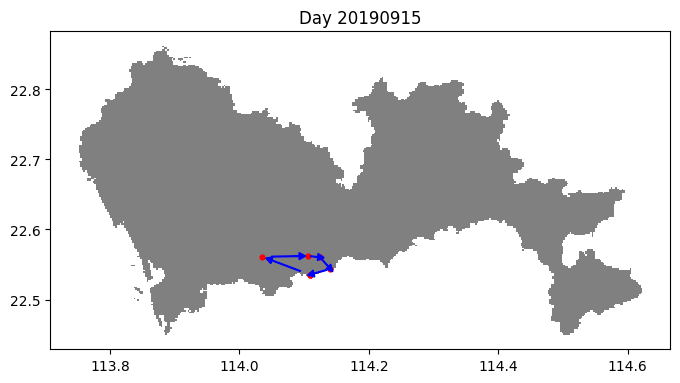

Serial: [232, 223, 44, 223, 24, 223, 338, 300, 232]


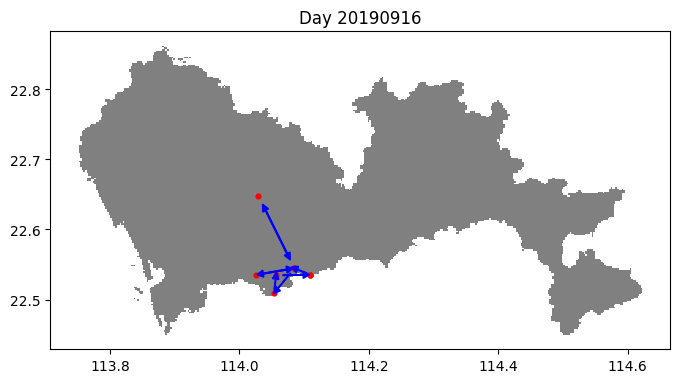

Serial: [232, 24, 203, 223, 141, 171, 282, 232]


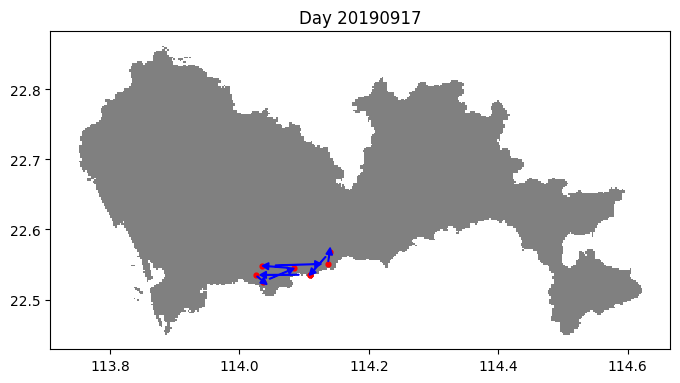

Serial: [232, 223, 19, 52, 300, 223, 232]


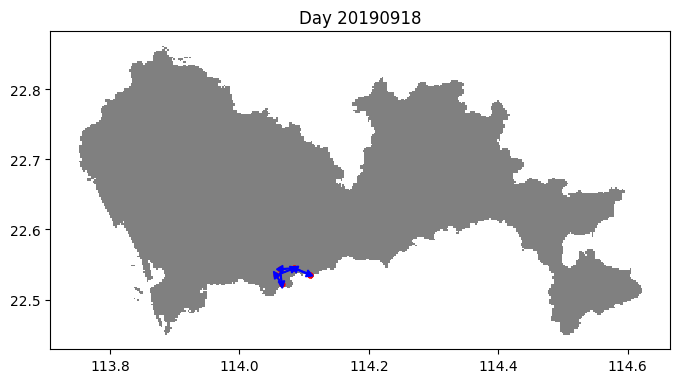

Serial: [232, 300, 0, 52, 223, 320, 223, 300, 232]


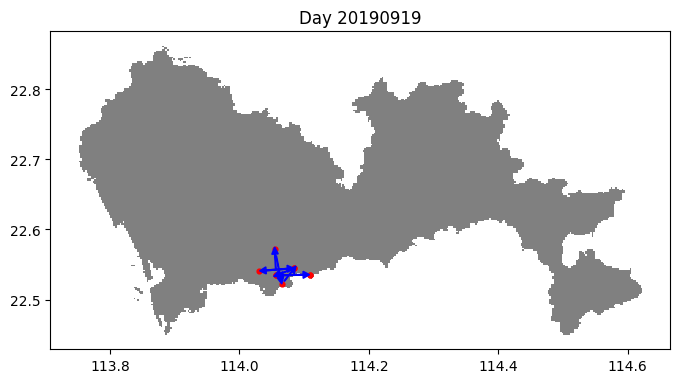

Serial: [232, 223, 300, 338, 50, 19, 300, 82, 339, 232]


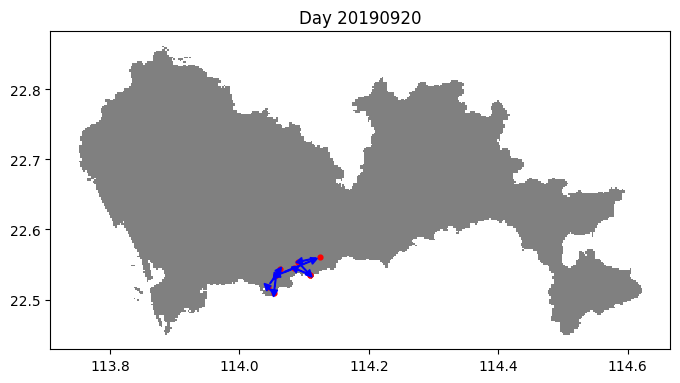

Serial: [232, 173, 223, 156, 232]


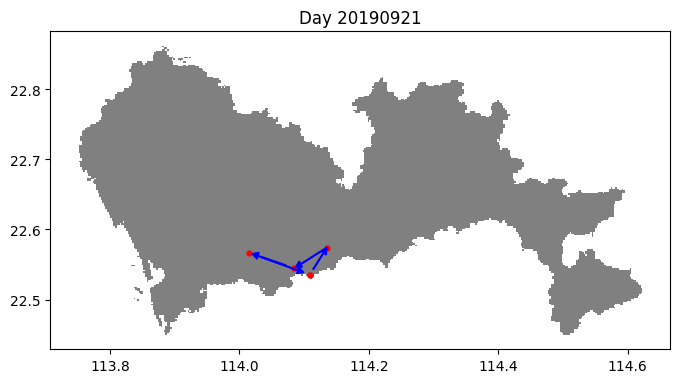

Serial: [232, 19, 24, 339, 300, 223, 232]


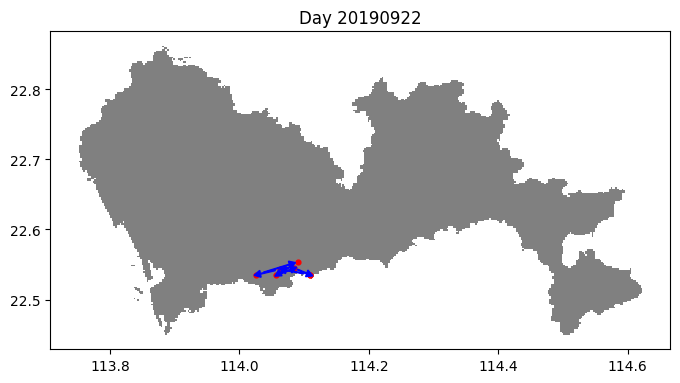

Serial: [232, 108, 223, 273, 223, 232]


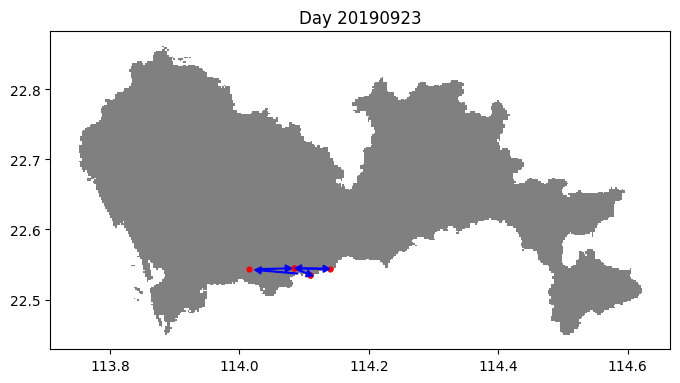

Serial: [232, 321, 29, 232]


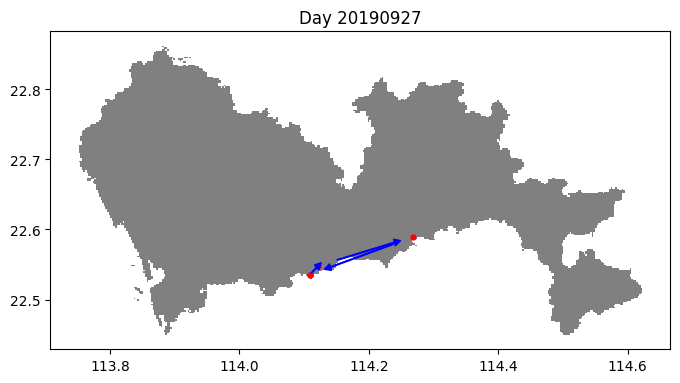

Serial: [232, 198, 50, 81, 203, 320, 232]


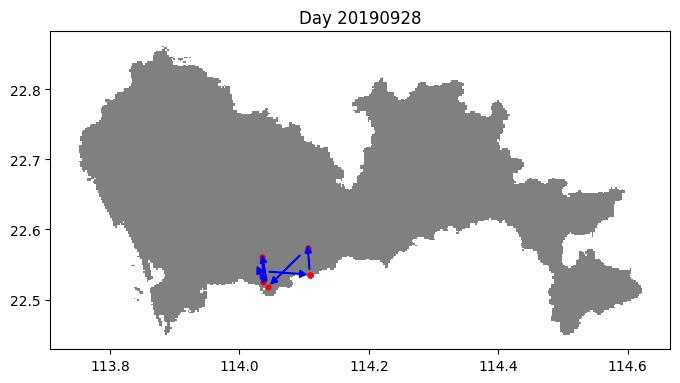

Serial: [232, 24, 203, 19, 223, 232]


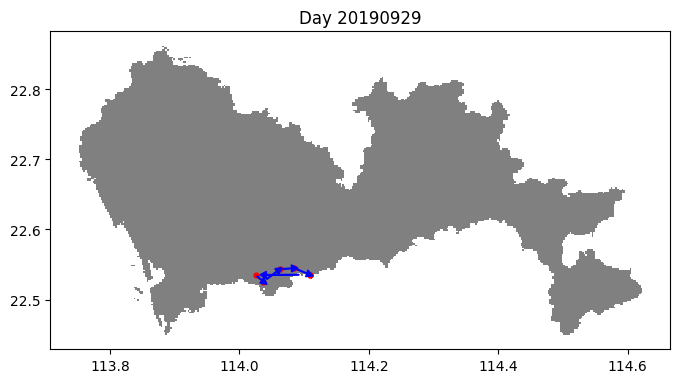

Serial: [232, 338, 223, 203, 19, 338, 232]


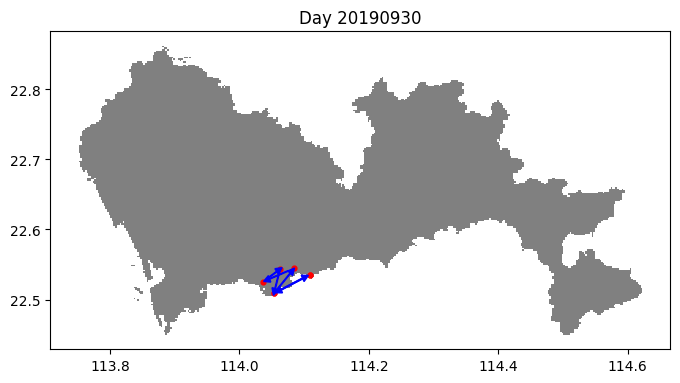

Serial: [232, 346, 356, 277]


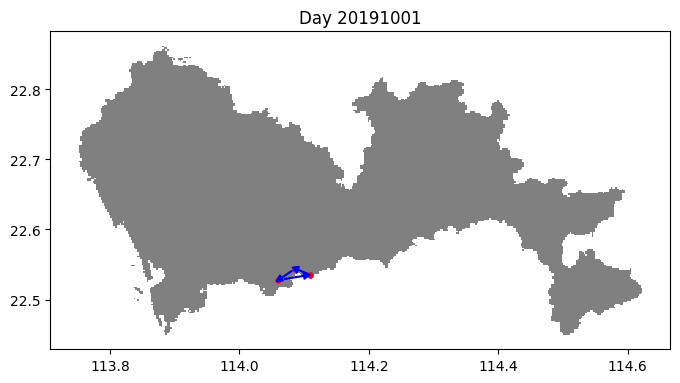

Serial: [277, 312, 154, 114, 346, 154, 114, 187, 277]


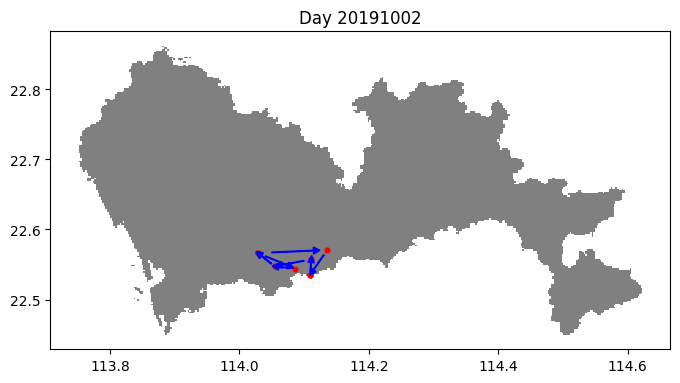

Serial: [277, 219, 346, 330, 312, 20, 277]


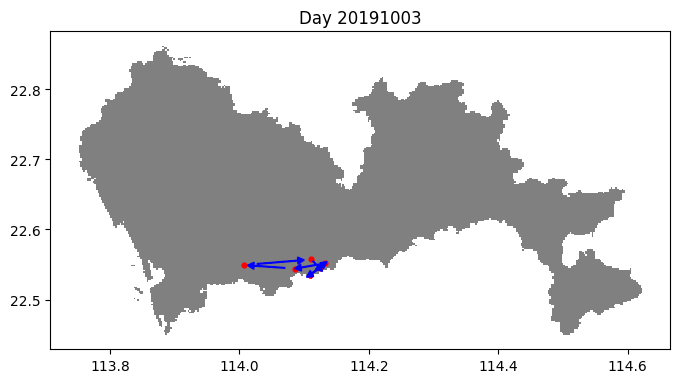

Serial: [277, 47, 346, 126, 277, 96, 154, 277]


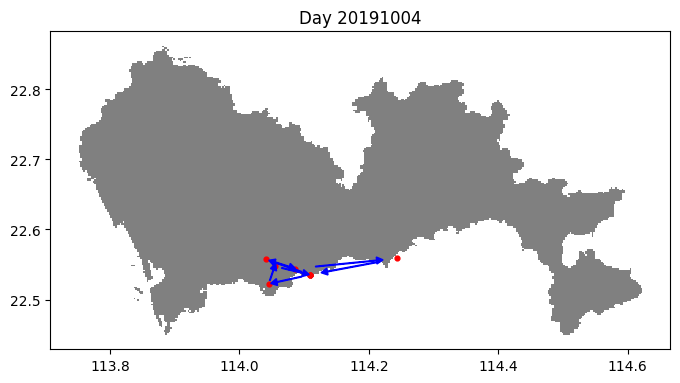

Serial: [277, 187, 346, 277]


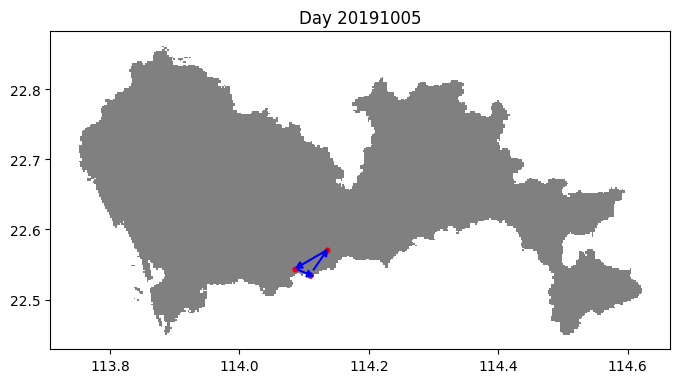

Serial: [277, 346, 277]


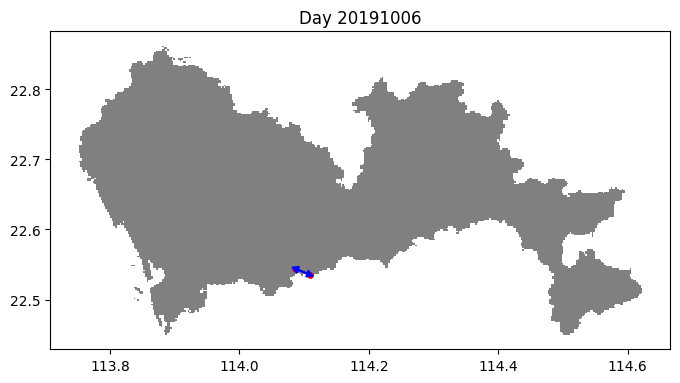

Serial: [277, 356, 284, 356, 346, 277]


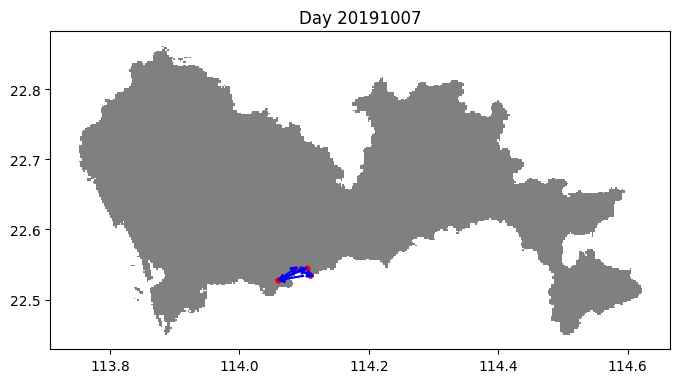

Serial: [277, 154, 284, 20, 169, 98, 356, 346, 219, 277]


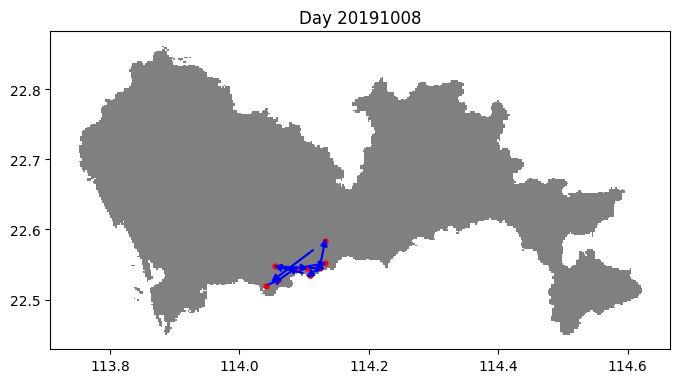

Serial: [277, 284, 178, 277, 346, 277]


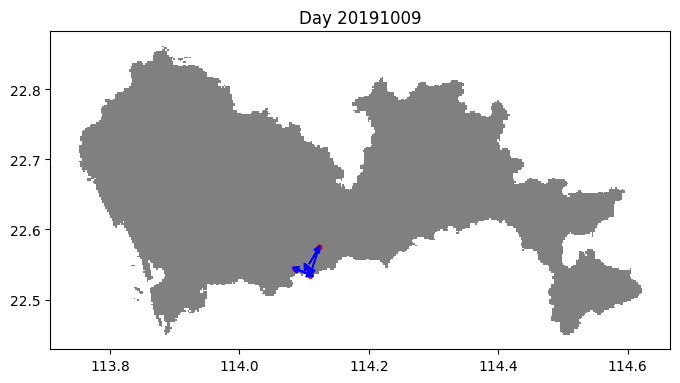

Serial: [277, 346, 120, 263, 356, 346, 277]


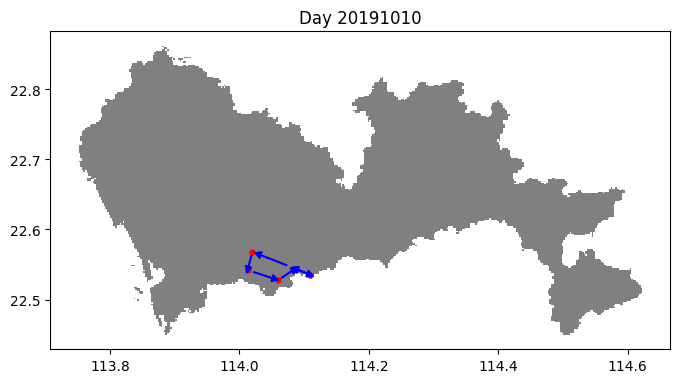

Serial: [277, 20, 346, 154, 346, 312, 277]


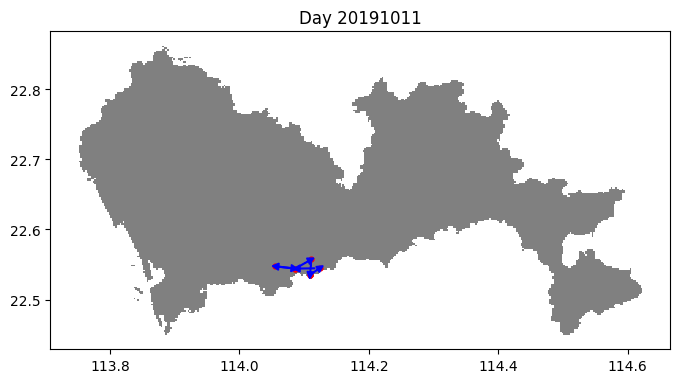

Serial: [277, 20, 169, 346, 155, 125, 368, 138, 277]


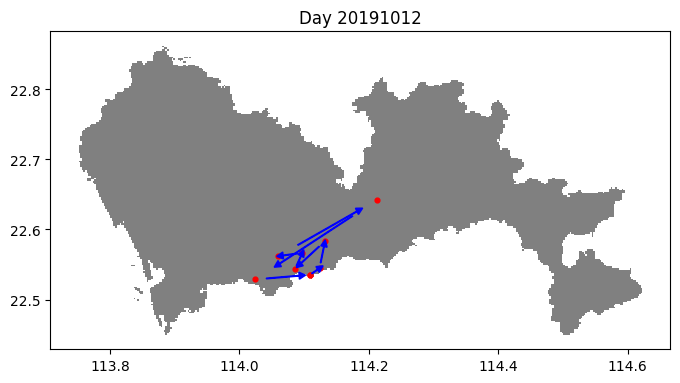

Serial: [277, 263, 215, 346, 47, 73, 312, 346, 277]


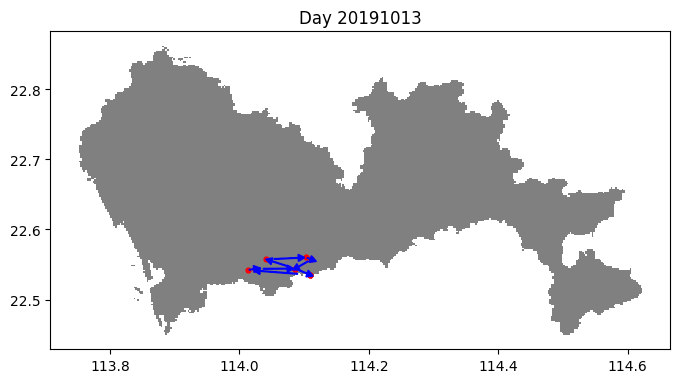

Serial: [277, 346, 154, 20, 219, 277, 346, 277]


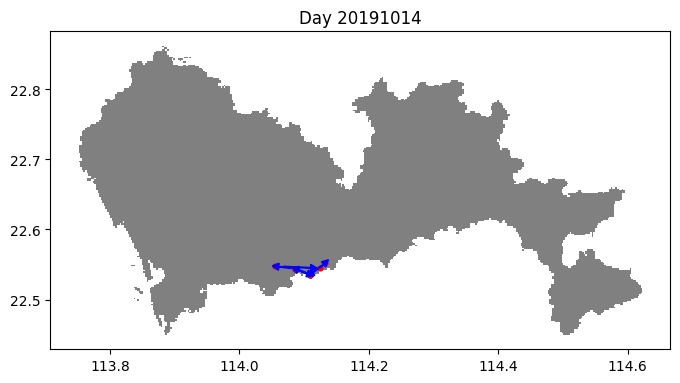

Serial: [277, 155, 277]


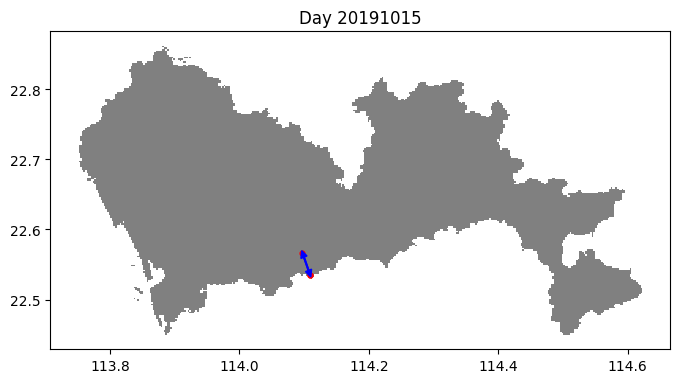

Serial: [277, 154, 346, 47, 277]


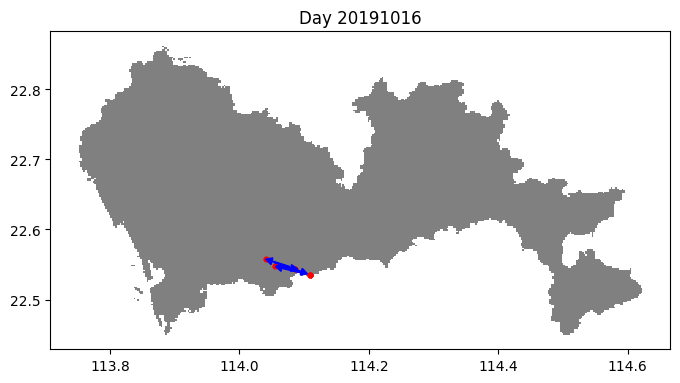

Serial: [277, 256, 125, 346, 277]


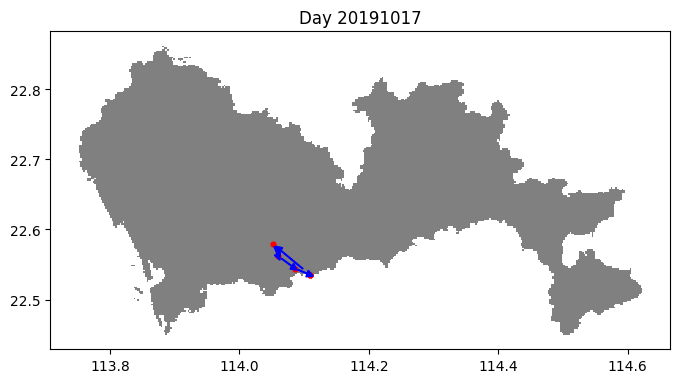

Serial: [277, 201, 346, 154, 281, 73, 312, 96, 277]


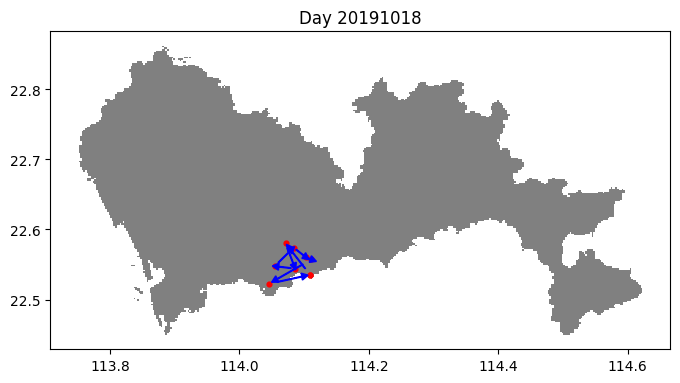

Serial: [277, 356, 346, 215, 277]


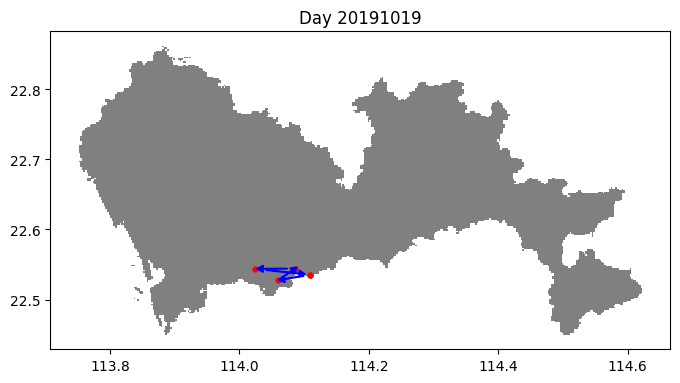

Serial: [277, 219, 298, 346, 284, 213, 277]


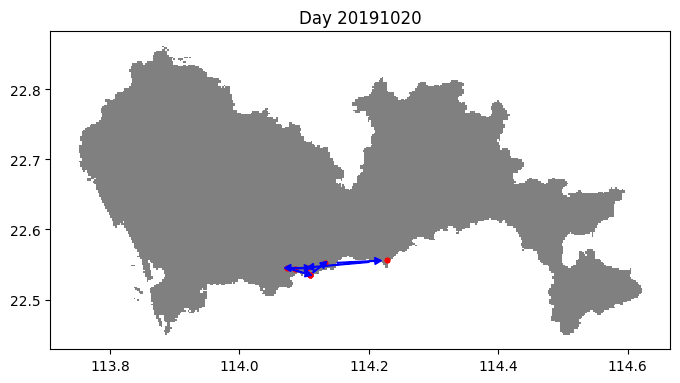

Serial: [277, 346, 172, 312, 263, 277]


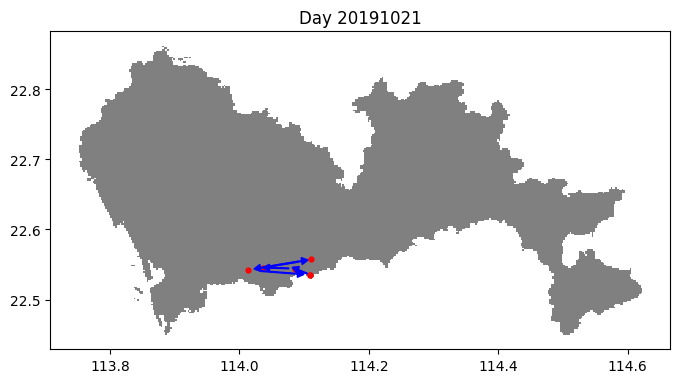

Serial: [277, 154, 346, 305, 284, 213, 125, 138, 277]


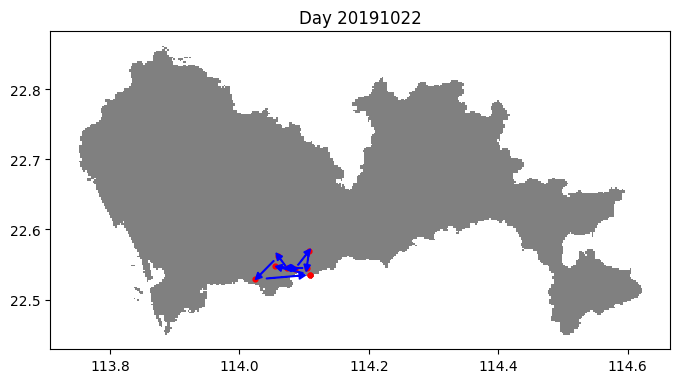

Serial: [277, 201, 346, 330, 138, 277]


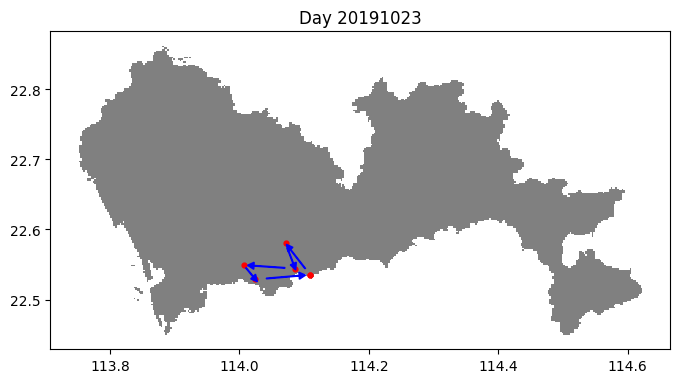

Serial: [277, 346, 154, 263, 346, 213, 284, 172, 277]


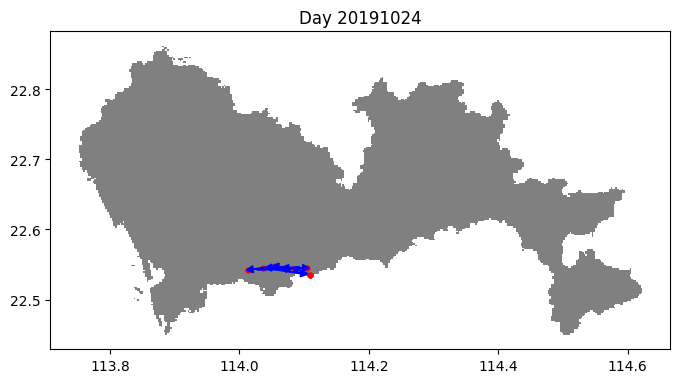

Serial: [277, 154, 114, 346, 263, 277, 96, 356, 277]


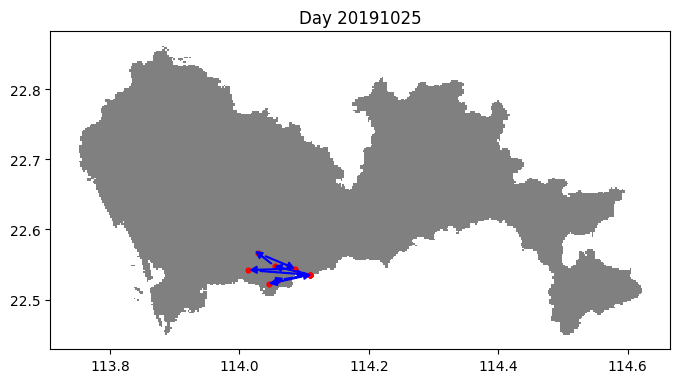

Serial: [277, 346, 154, 263, 96, 346, 277]


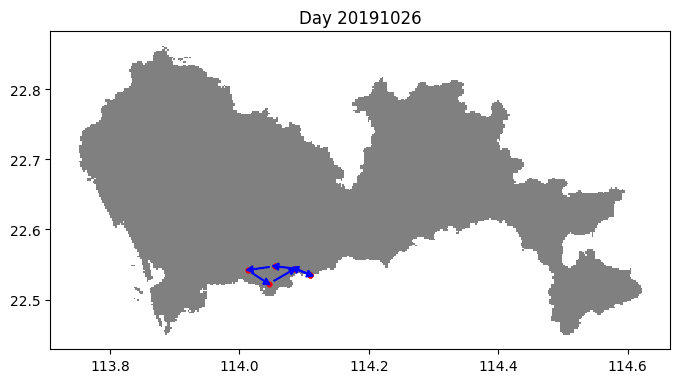

Serial: [277, 312, 231, 277]


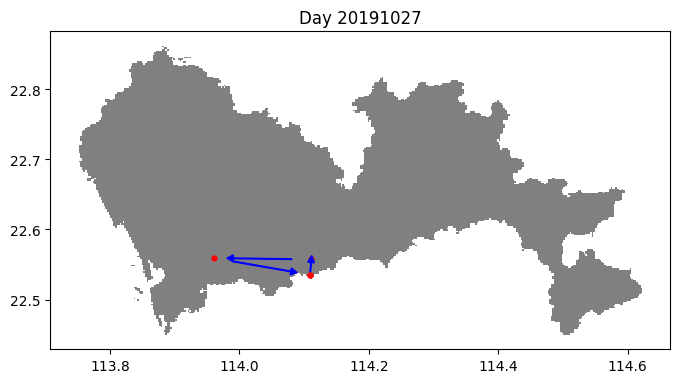

Serial: [277, 284, 213, 215, 277]


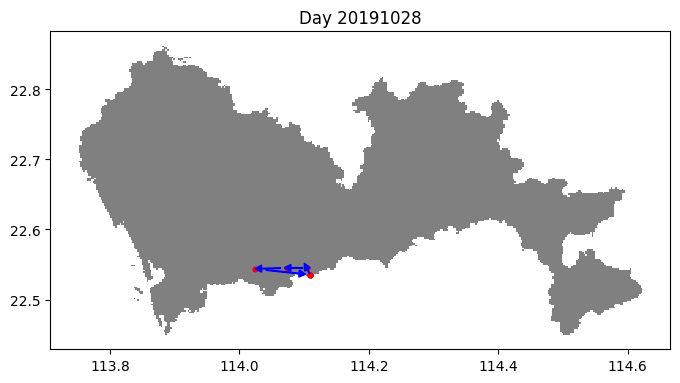

Serial: [277, 154, 15, 15, 219, 277]


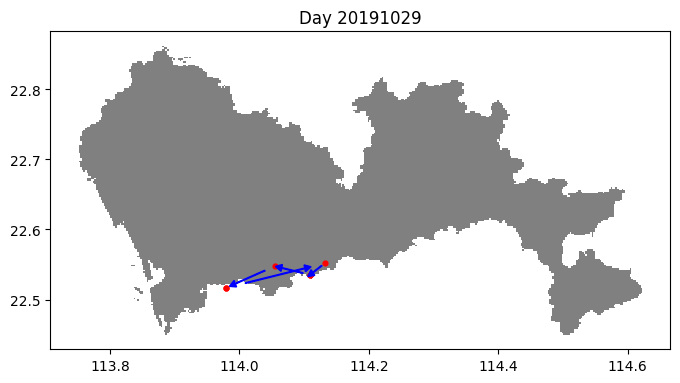

Serial: [277, 154, 346, 213, 284, 277]


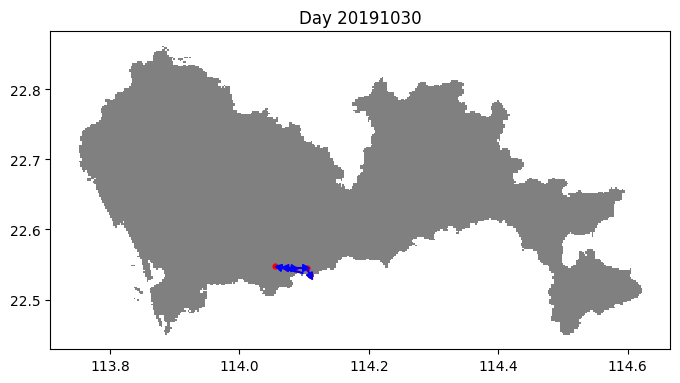

Serial: [277, 98, 154, 346, 96, 346, 277]


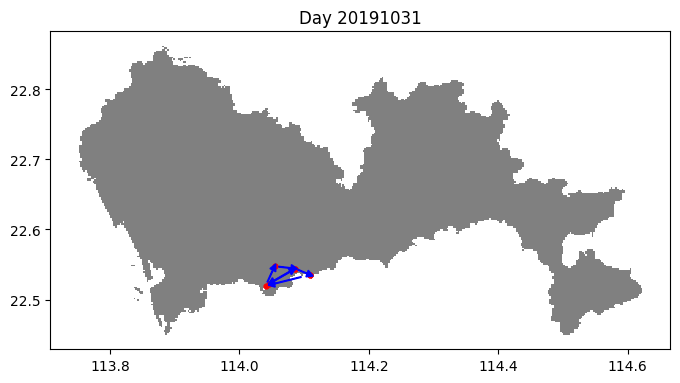

Serial: [277, 304, 221, 313, 221, 28, 89, 55]


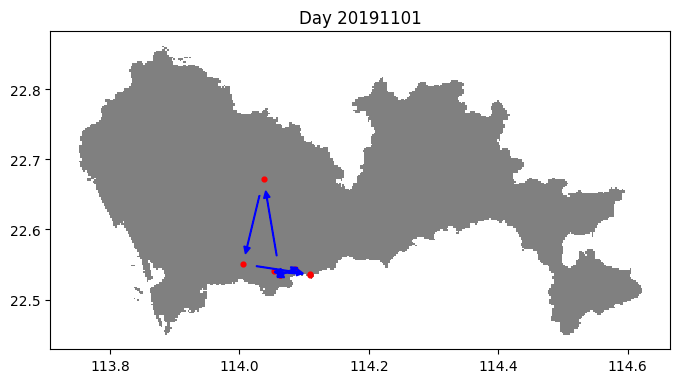

Serial: [55, 153, 313, 89, 313, 42, 55, 112, 55]


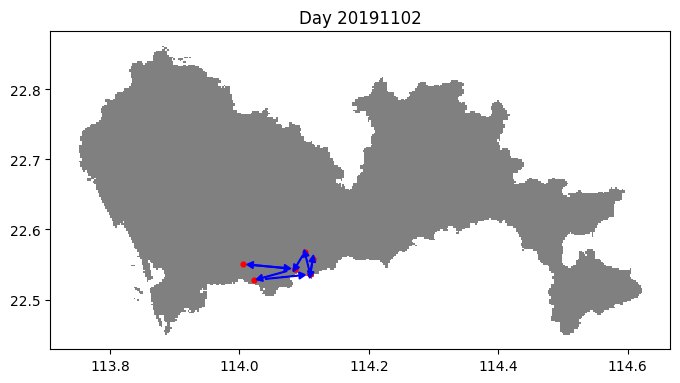

Serial: [55, 258, 89, 226, 313, 100, 143, 55]


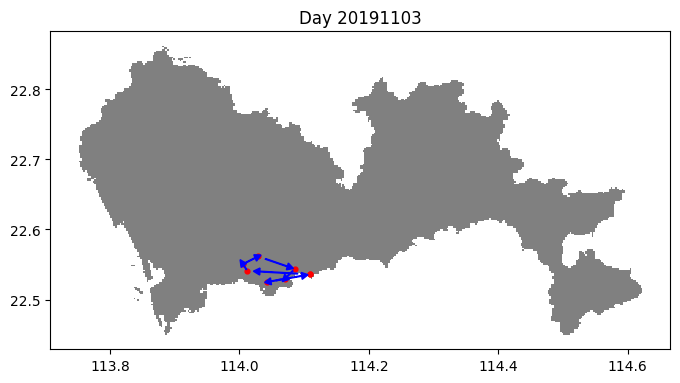

Serial: [55, 258, 313, 304, 221, 313, 224, 55]


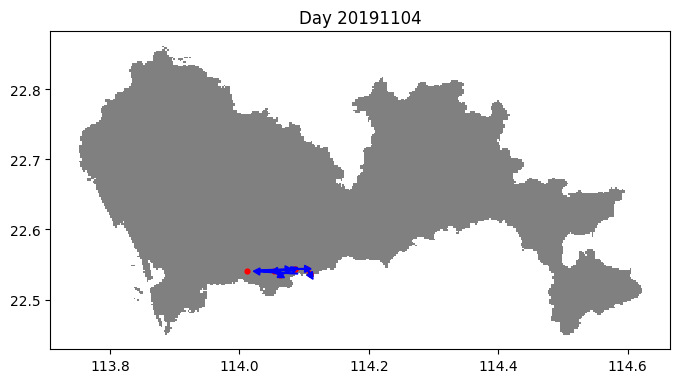

Serial: [55, 153, 313, 55, 294, 224, 55, 153, 55]


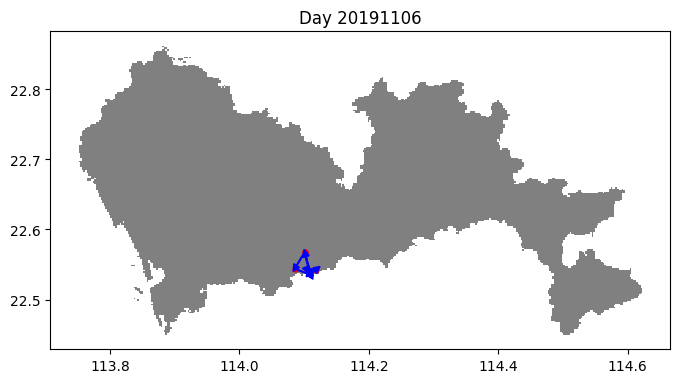

Serial: [55, 313, 304, 226, 149, 313, 55, 224, 55]


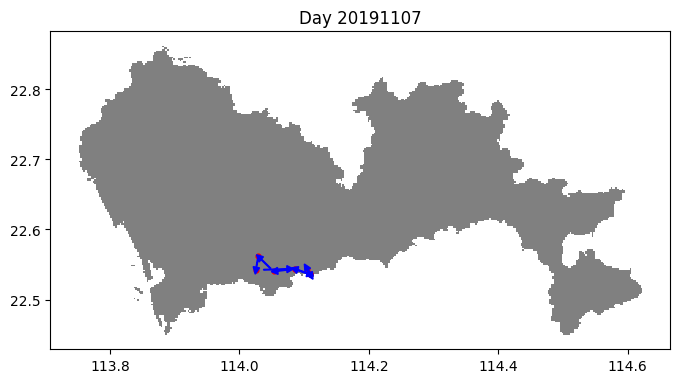

Serial: [55, 258, 224, 304, 149, 313, 143, 373, 55]


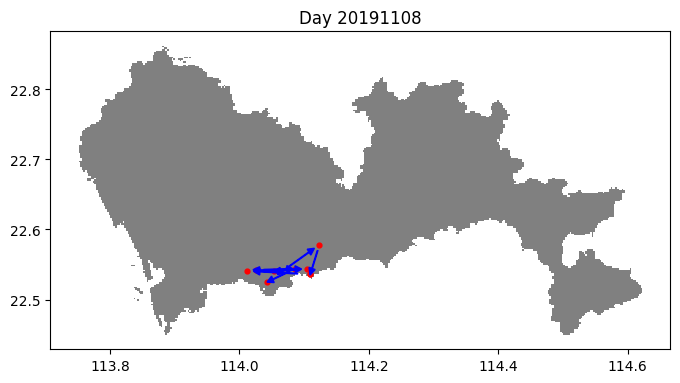

Serial: [55, 373, 55, 313, 351, 55]


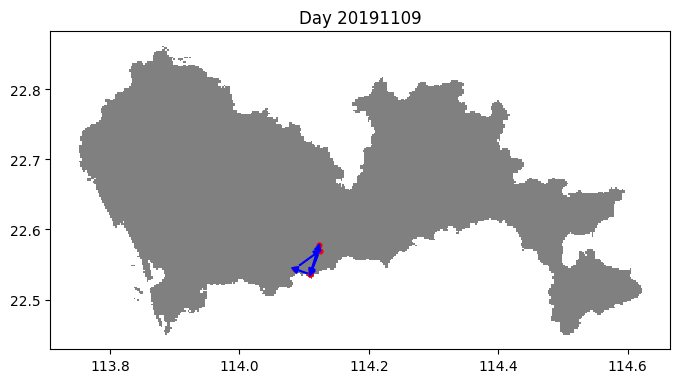

Serial: [55, 42, 258, 221, 294, 55]


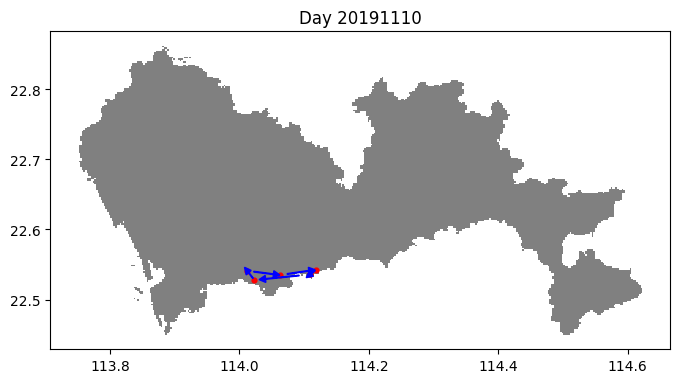

Serial: [55, 294, 313, 361, 185, 221, 55]


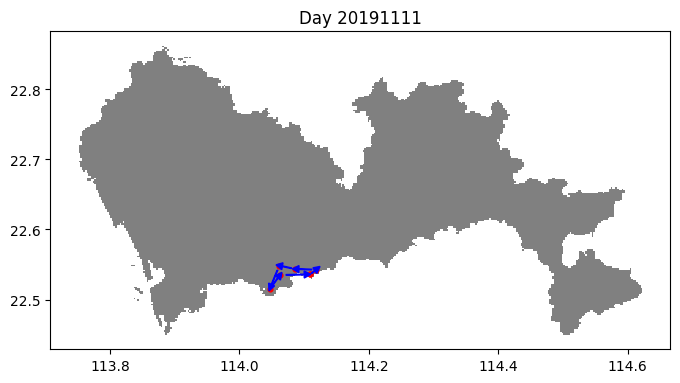

Serial: [55, 373, 313, 221, 42, 361, 313, 55, 5, 55]


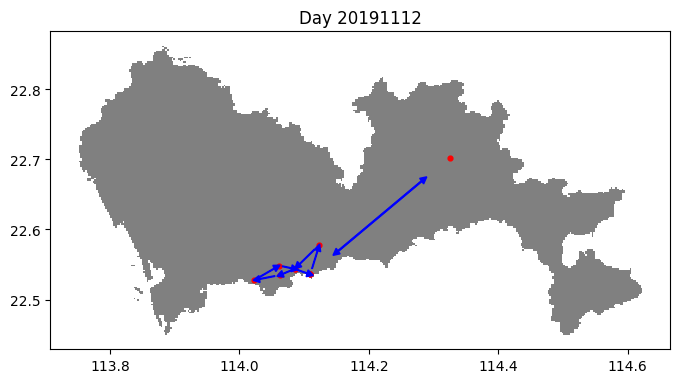

Serial: [55, 216, 55]


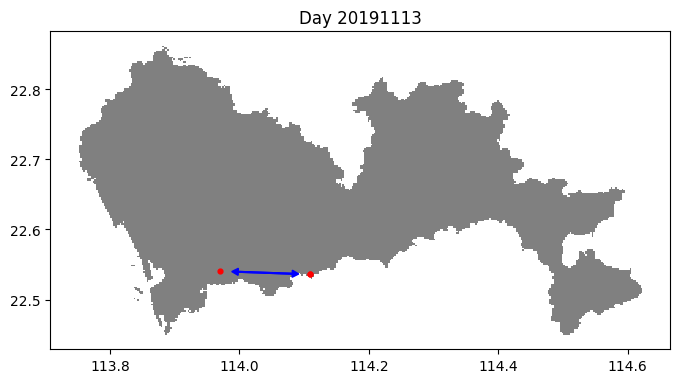

Serial: [55, 221, 304, 313, 226, 221, 55]


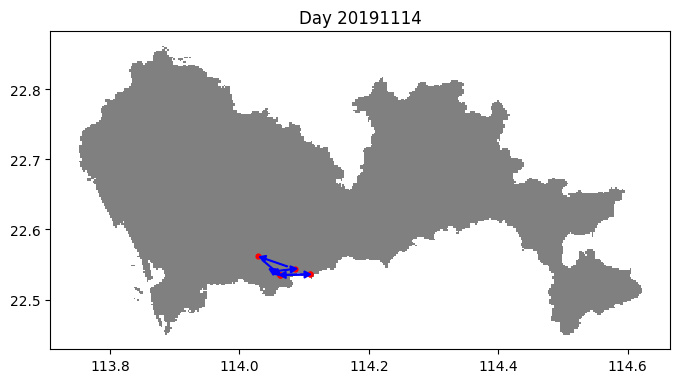

Serial: [55, 258, 313, 55, 224]


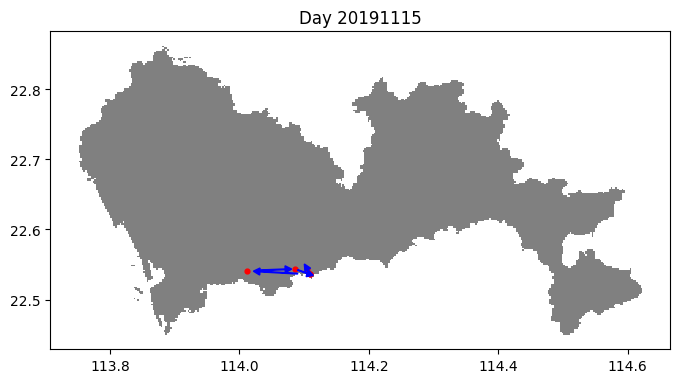

Serial: [224, 329, 55]


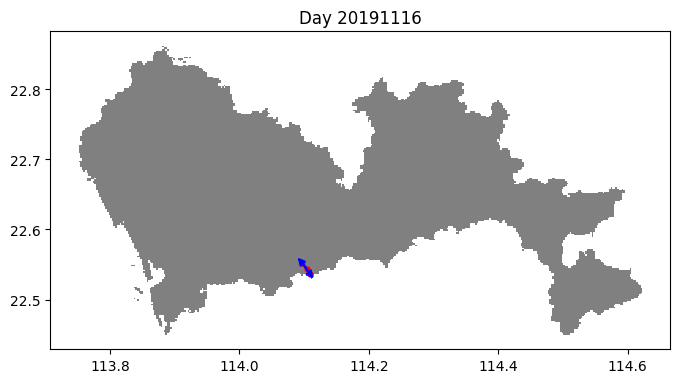

Serial: [55, 313, 304, 112, 341, 224, 149, 143, 55]


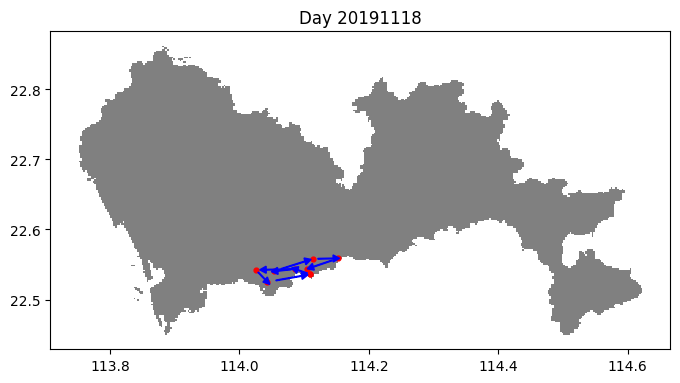

Serial: [55, 100, 221, 153, 361, 313, 55, 221, 55]


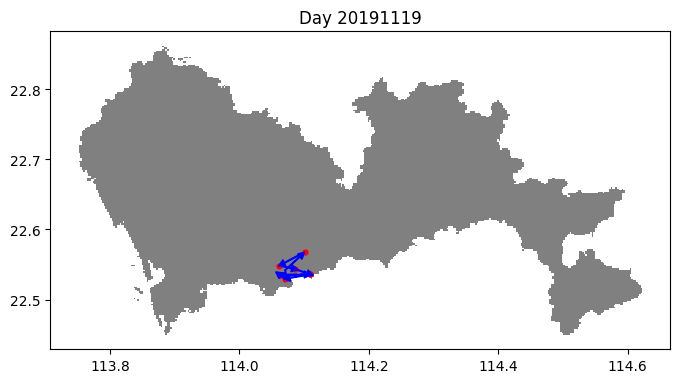

Serial: [55, 149, 89, 304, 313, 55]


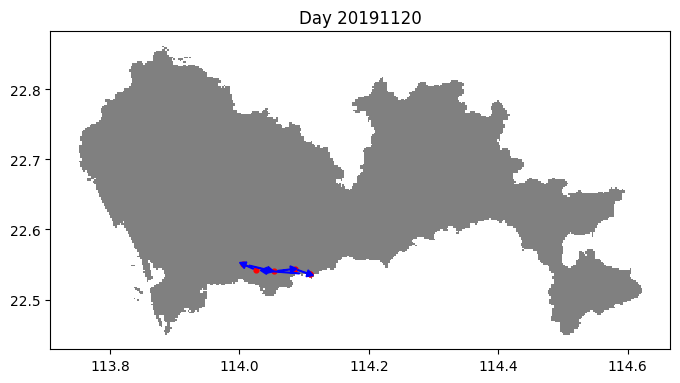

Serial: [55, 41, 313, 85, 313, 221, 55]


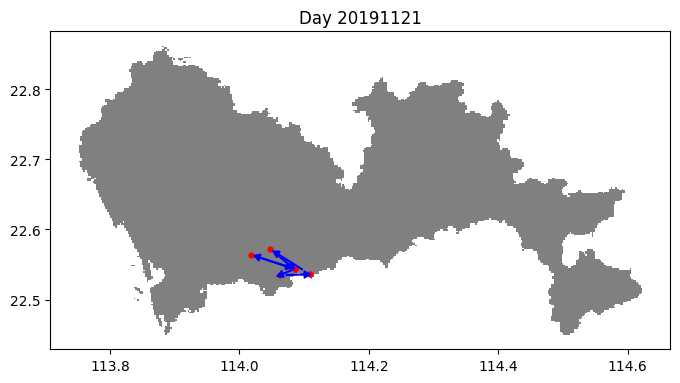

Serial: [55, 294, 55, 313, 41, 304, 224, 153, 55]


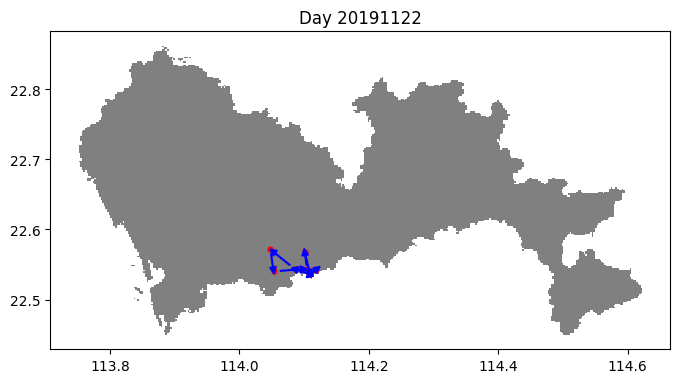

Serial: [55, 313, 89, 313, 221, 55]


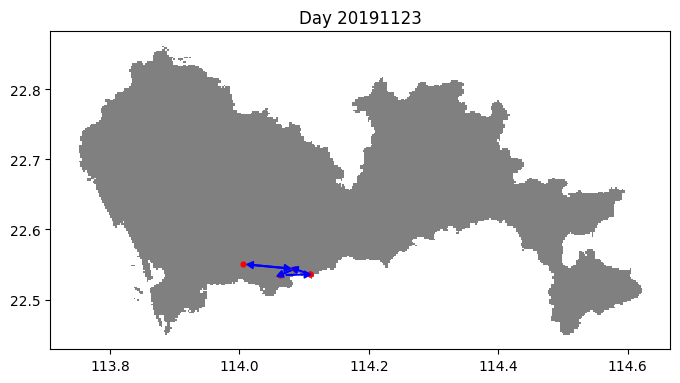

Serial: [55, 313, 89, 185, 55, 224]


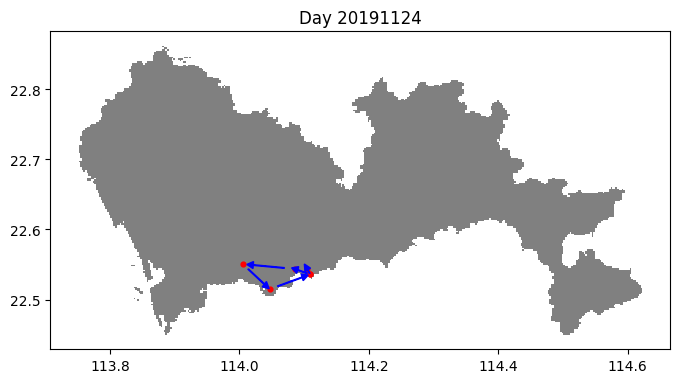

Serial: [224, 18, 258, 299, 41, 304, 18, 258, 55]


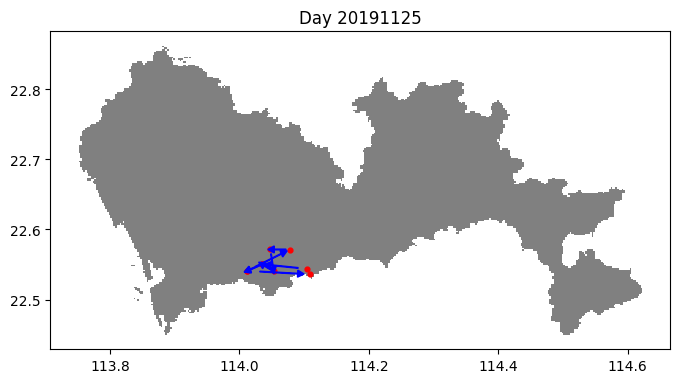

Serial: [55, 100, 221, 313, 174, 55]


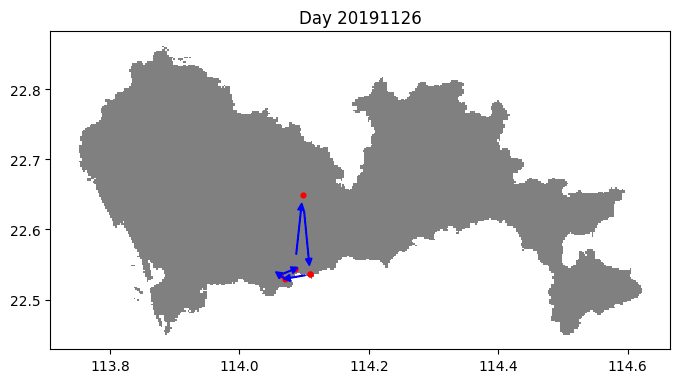

Serial: [55, 313, 185, 89, 149, 304, 115, 55]


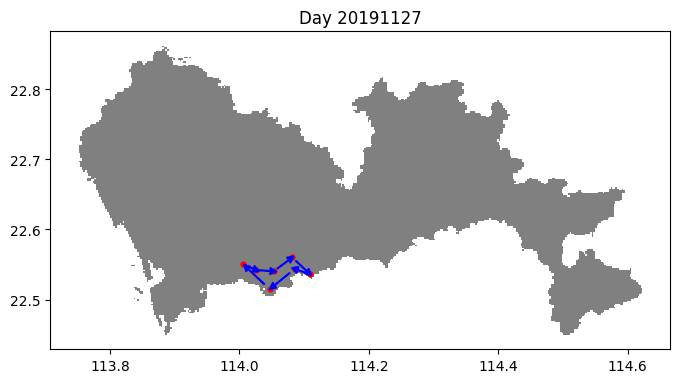

Serial: [55, 221, 55]


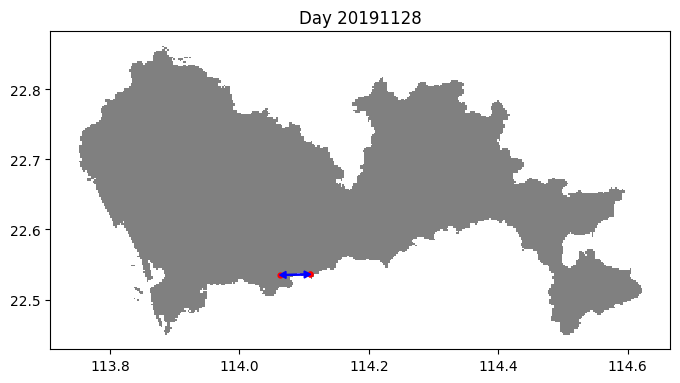

Serial: [55, 304, 313, 226, 55]


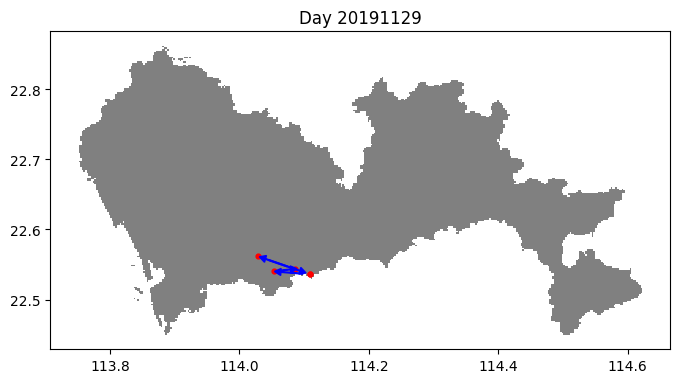

Serial: [55, 143, 185, 221, 18, 112, 55]


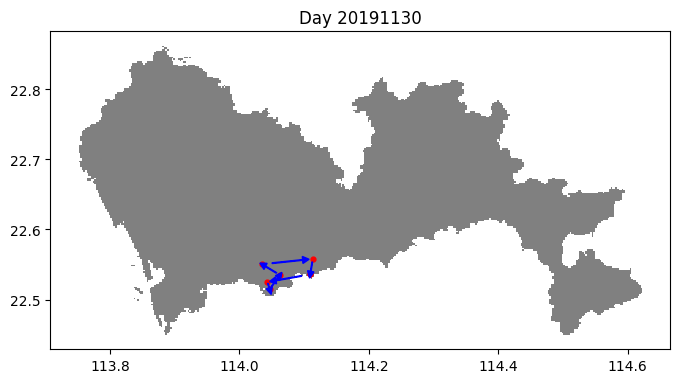

Serial: [55, 310, 79, 34, 84, 97, 146]


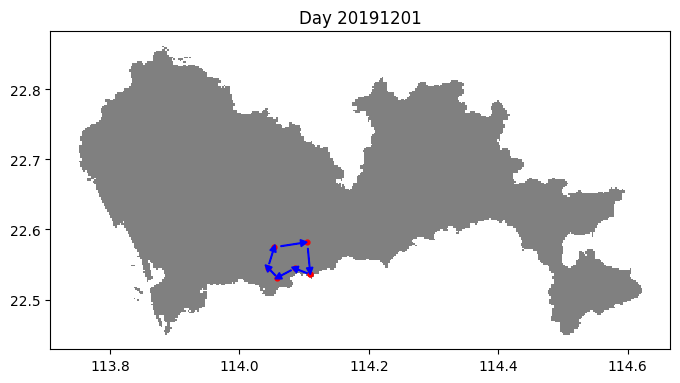

Serial: [146, 152, 106, 310, 290, 110, 146]


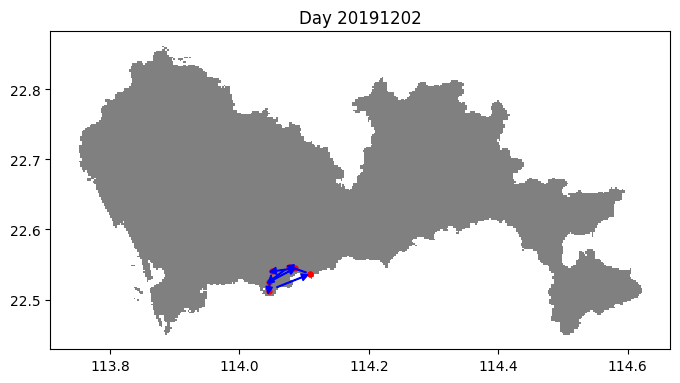

Serial: [146, 25, 56, 310, 97, 310, 146, 371, 146]


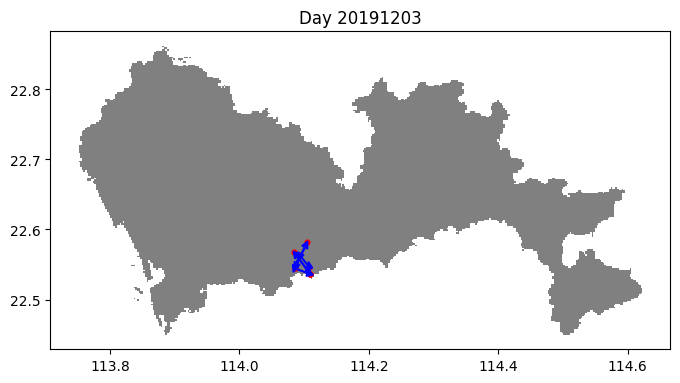

Serial: [146, 97, 204, 310, 34, 146]


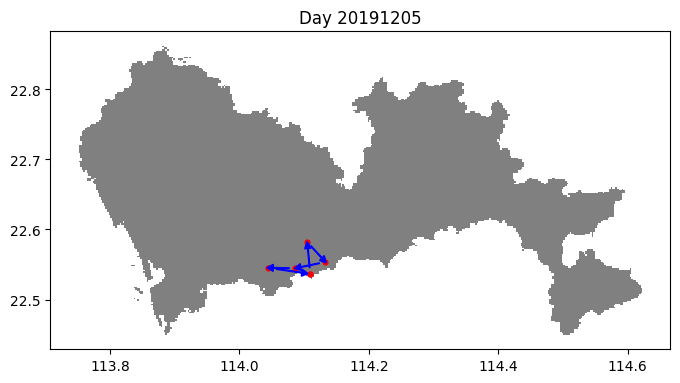

Serial: [146, 268, 204, 353, 310, 290, 110, 208, 146]


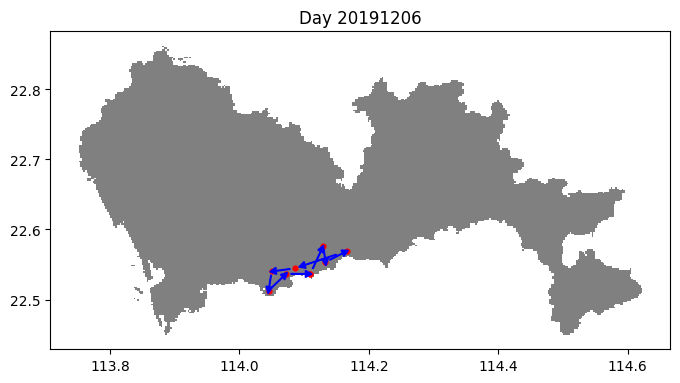

Serial: [146, 60, 268, 310, 146, 25, 146]


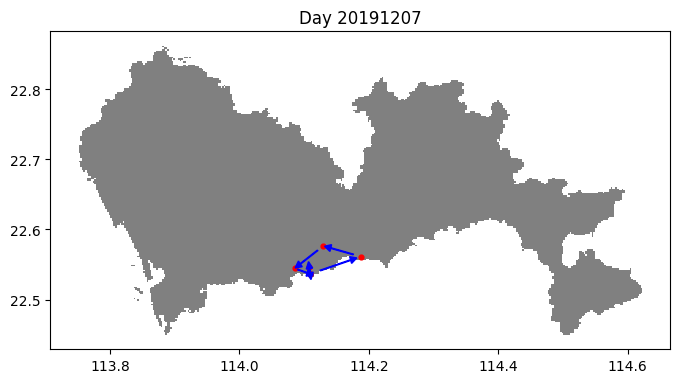

Serial: [146, 65, 84, 25, 310, 200, 146, 193, 146]


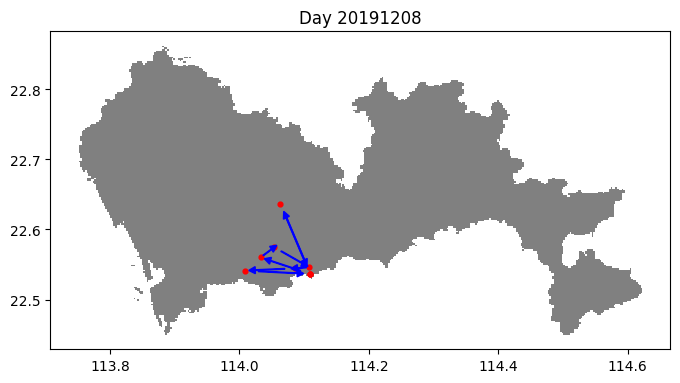

Serial: [146, 97, 146, 152, 310, 146]


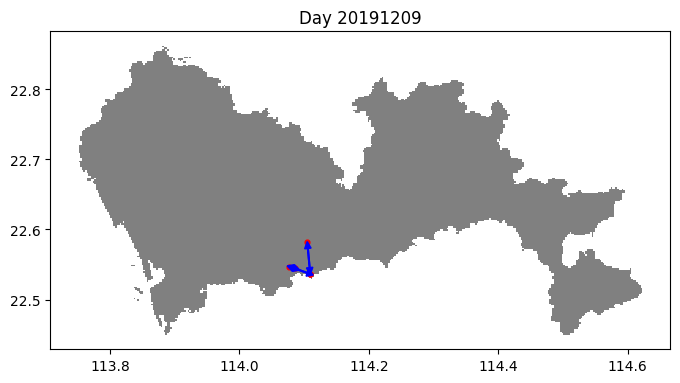

Serial: [146, 310, 106, 25, 146]


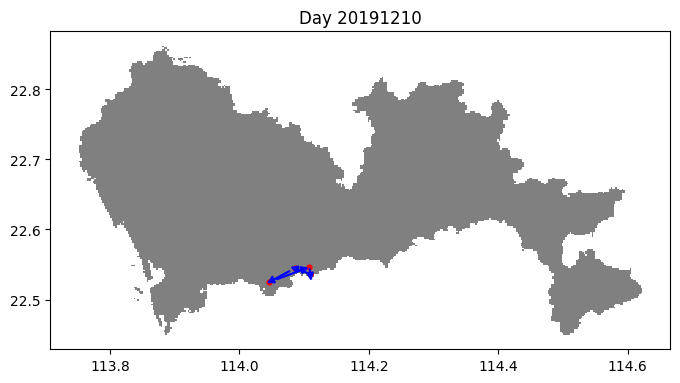

Serial: [146, 34, 290, 146, 328, 79, 310, 204, 146]


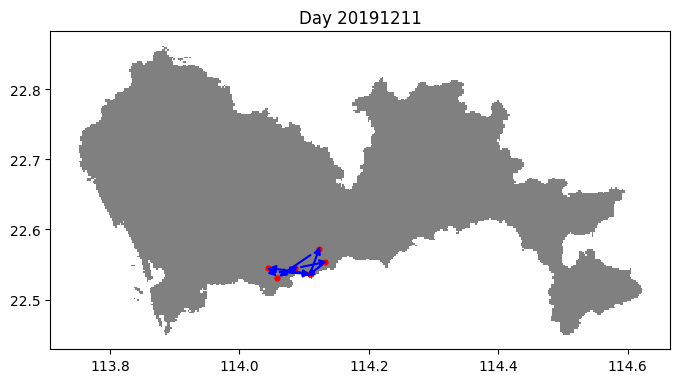

Serial: [146, 290, 37, 146, 25, 328, 146]


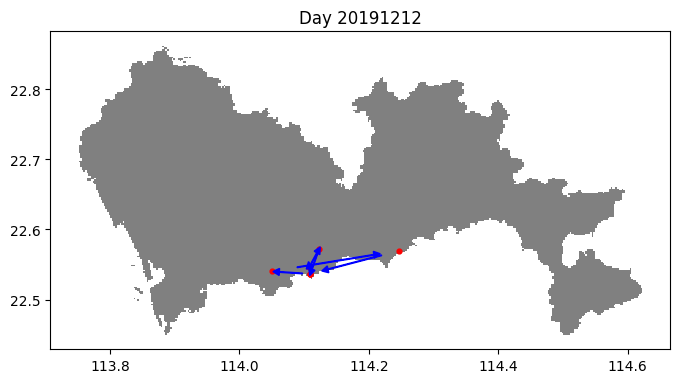

Serial: [146, 37, 290, 25, 310, 290, 146]


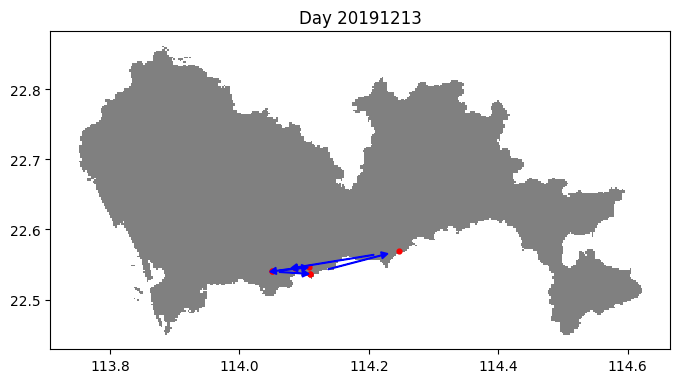

Serial: [146, 182, 310, 204, 310, 290, 204, 146, 25, 146]


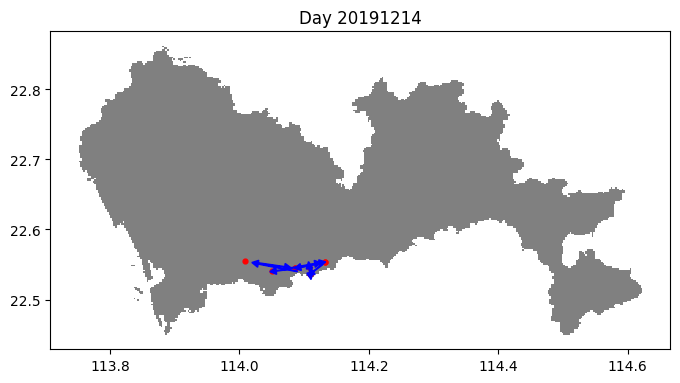

Serial: [146, 310, 204, 146, 353, 84, 146]


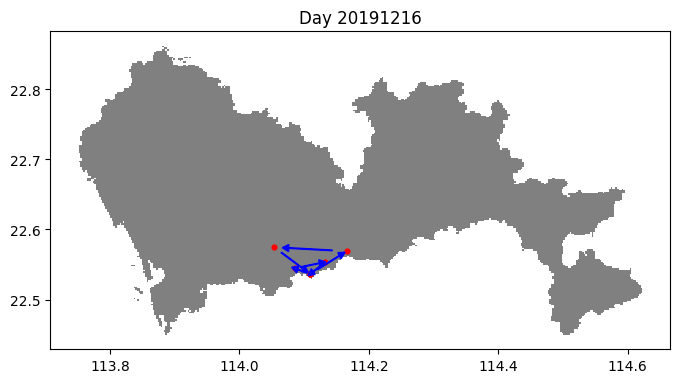

Serial: [146, 290, 113, 35, 310, 292, 328, 204, 166, 25, 233, 25, 146]


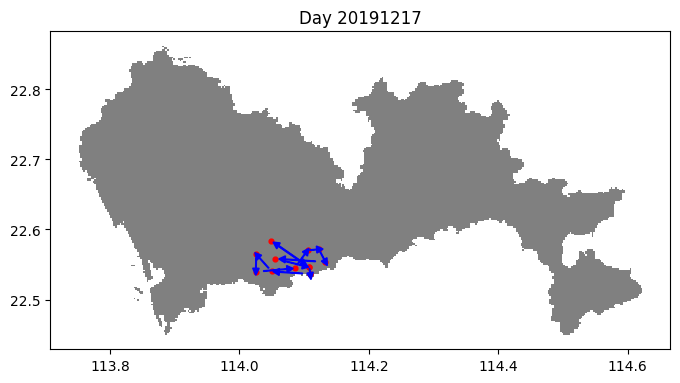

Serial: [146, 328, 310, 290, 34, 35, 328, 146]


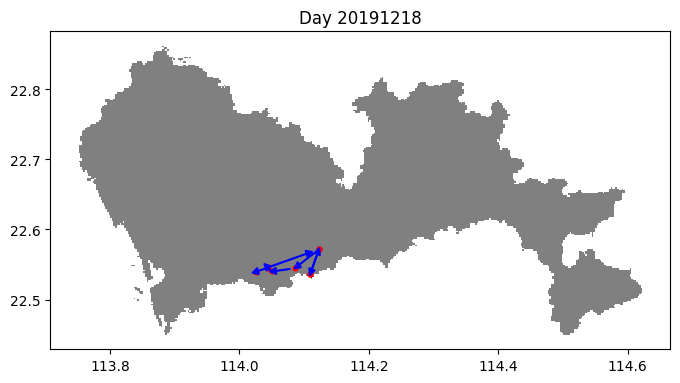

Serial: [146, 261, 106, 146, 182, 323, 146]


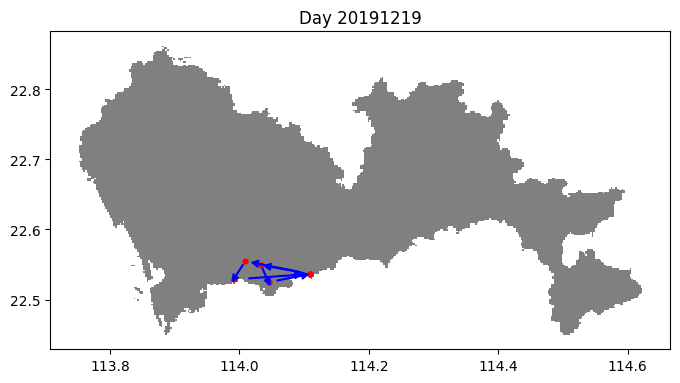

Serial: [146, 56, 310, 261, 166, 363, 37, 102, 146]


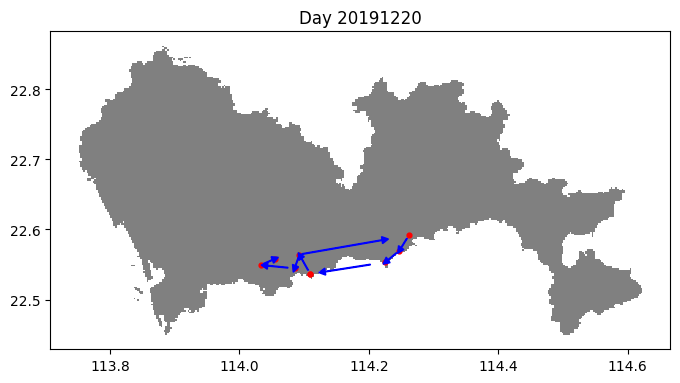

Serial: [146, 310, 261, 34, 310, 146]


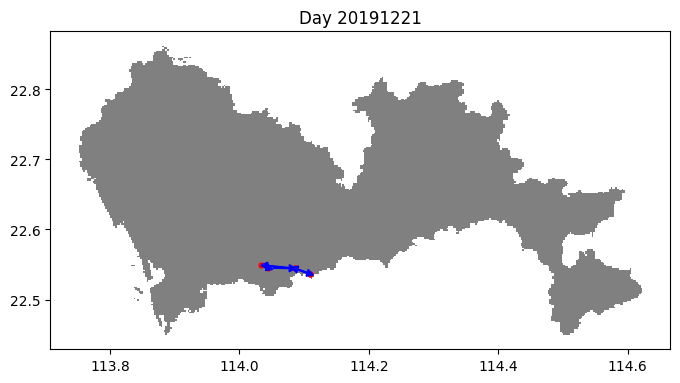

Serial: [146, 56, 290, 310, 200, 146]


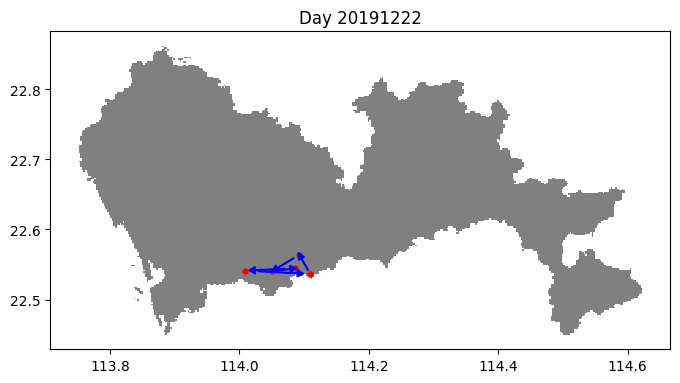

Serial: [146, 25, 152, 84, 310, 290, 310, 146]


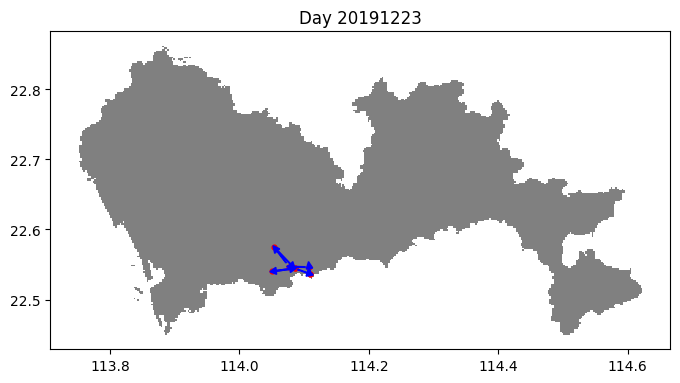

Serial: [146, 310, 290, 146, 363, 204, 146]


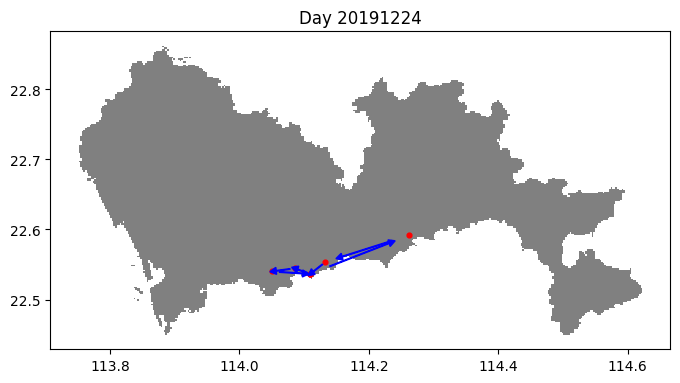

Serial: [146, 152, 343, 152, 310, 146]


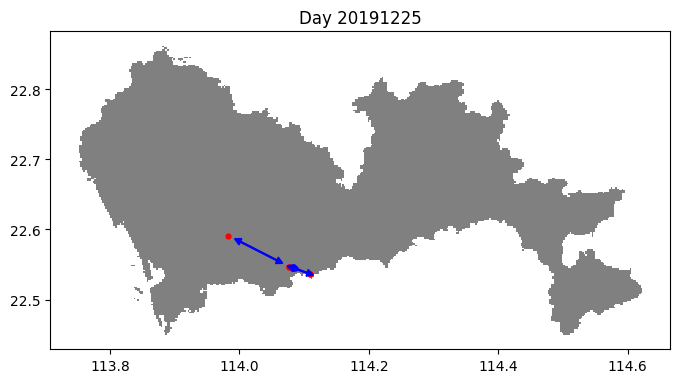

Serial: [146, 342, 146]


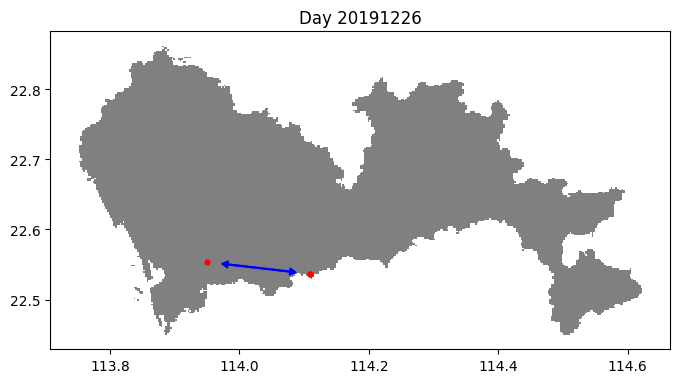

Serial: [146, 290, 310, 152, 146, 25, 146]


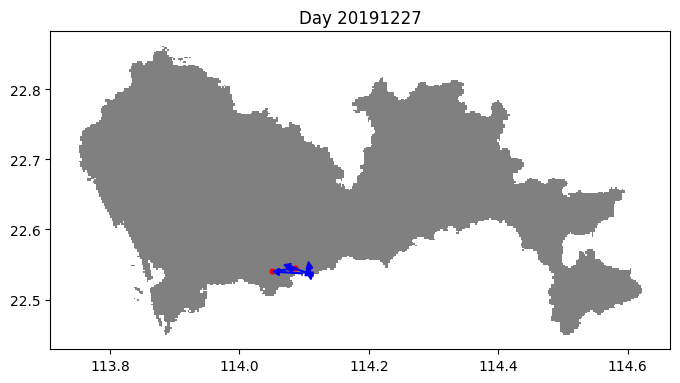

Serial: [146, 200, 310, 290, 200, 310, 146]


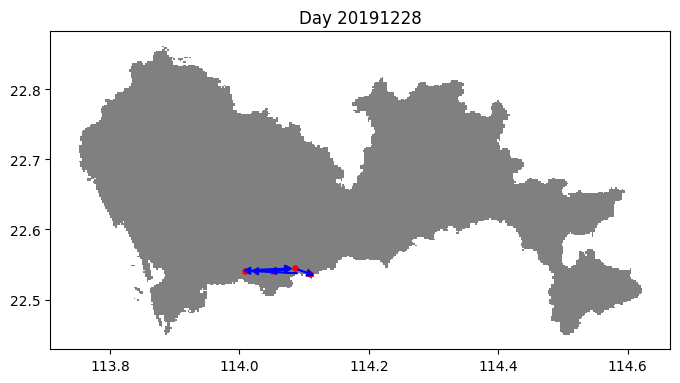

Serial: [146, 328, 310, 35, 200, 323, 106, 146]


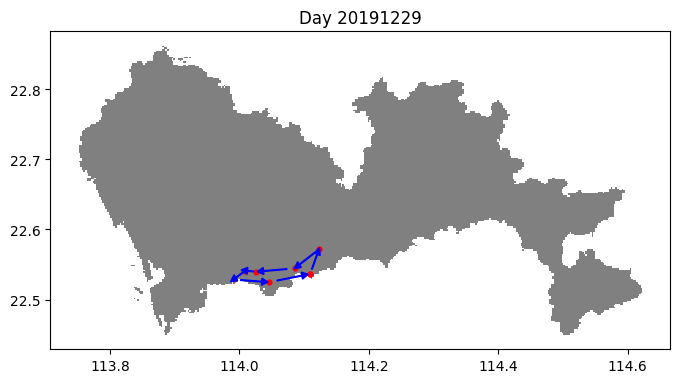

Serial: [146, 310, 200, 290, 310, 106, 146]


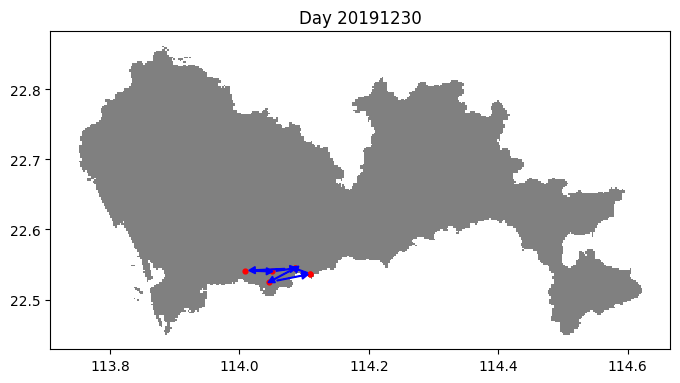

Serial: [146, 66, 56, 310, 35, 56, 290, 208, 146]


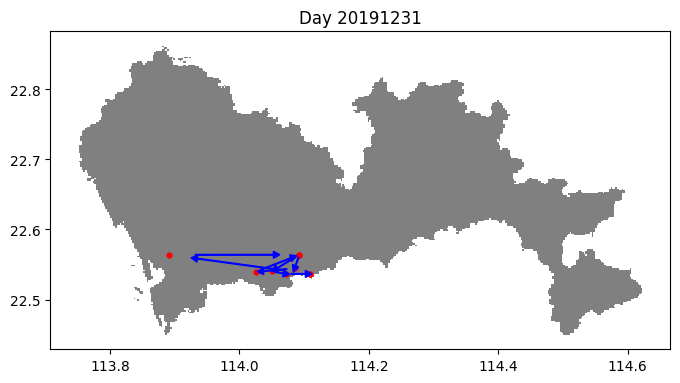

In [6]:
shenzhen_grid = gpd.read_file('../data/shenzhen_grid/shenzhen_grid.shp')
num_days = len(all_chains)

# plot
for d in range(num_days):
    chain = all_chains[d]
    # create the figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    # set its title
    ax.set_title('Day {}'.format(chain.date))
    # plot the shenzhen shape in gray fill color and no line color
    shenzhen_grid.plot(ax=ax, color='gray', edgecolor='none')
    # plot the trajectory of the day d in red
    coords = np.array(chain.travel_chain)
    # coords is a n-by-2 list of coordinates, draw point on the axe
    ax.scatter(coords[:, 0], coords[:, 1], color='red', s=12)
    # draw the arrow between each pair of consecutive points
    print('Serial: ' + str(chain.id_chain))
    for i in range(len(coords)-1):
        lon_o, lat_o, lon_d, lat_d = coords[i, 0], coords[i, 1], coords[i+1, 0], coords[i+1, 1]
        if lon_o == lon_d and lat_o == lat_d:
            continue
        x0, y0, x1, y1 = arrow_process(lon_o, lat_o, lon_d, lat_d, 0.2)
        ax.arrow(x0, y0, x1-x0, y1-y0, head_width=0.01, head_length=0.01, fc='blue', ec='blue')
    plt.show()
